<a href="https://colab.research.google.com/github/OmniaOsama03/Data_Quality_Analysis_and_Preprocessing/blob/main/CSC406_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline
sns.set(color_codes=True)

# Loading the dataset
df= pd.read_csv('/content/train.csv')

# Exploration

##Q1 - General Info on the dataset.

In [ ]:
# How many attributes and how many instances does the dataset train have?

num_attributes = len(df.columns)
num_instances = len(df)

print("Number of attributes:", num_attributes)
print("Number of instances:", num_instances)


Number of attributes: 83
Number of instances: 27674


In [ ]:
target_attribute = df.columns[82]
print("Target attribute:", target_attribute)

Target attribute: treatment_pd


In [ ]:
#show the target attribute treatment_pd in the data set

print(df["treatment_pd"])


0         35
1         33
2         24
3        455
4        162
        ... 
27669     25
27670     22
27671     28
27672    169
27673     91
Name: treatment_pd, Length: 27674, dtype: int64


##Q2 - Exploring the datatypes.

In [ ]:
# 1. Specify the datatype of the attributes (Qualitative vs Quantitative)
qualitative_attributes = df.select_dtypes(include=['object']).columns
quantitative_attributes = df.select_dtypes(include=['int64', 'float64']).columns

print("Qualitative attributes:", qualitative_attributes)
print("Quantitative attributes:", quantitative_attributes)

# 2. How many qualitative and how many quantitative attributes are there in the dataset?
num_qualitative_attributes = len(qualitative_attributes)
num_quantitative_attributes = len(quantitative_attributes)

print("\nNumber of qualitative attributes:", num_qualitative_attributes)
print("Number of quantitative attributes:", num_quantitative_attributes)

Qualitative attributes: Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_treatment',
       'metastatic_first_treatment_type', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'region', 'division'],
      dtype='object')
Quantitative attributes: Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi',
       'breast_cancer_diagnosis_year', 'population', 'density', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female',
       'married', 'divorced', 'never_married', 'widowed', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_

##Q3 - Identifying continuous & discrete quantitative attributes.

In [ ]:
#Extracting the continuous (float) attributes.
continuous_attributes = df.select_dtypes(include = ['float64']).columns;

#Extracting the discrete (integer) attributes.
discrete_attributes = df.select_dtypes(include = ['int64']).columns;

#Printing the continuous attributes
print("The continuous quantitative attributes: \n")
for attribute in continuous_attributes:
  print(attribute)

print("_______________________________________________")

#Printing the discrete attributes
print("The discrete quantitative attributes: \n")
for attribute in discrete_attributes:
  print(attribute)

The continuous quantitative attributes: 

bmi
density
age_median
age_under_10
age_10_to_19
age_20s
age_30s
age_40s
age_50s
age_60s
age_70s
age_over_80
male
female
married
divorced
never_married
widowed
family_size
family_dual_income
income_household_median
income_household_under_5
income_household_5_to_10
income_household_10_to_15
income_household_15_to_20
income_household_20_to_25
income_household_25_to_35
income_household_35_to_50
income_household_50_to_75
income_household_75_to_100
income_household_100_to_150
income_household_150_over
income_household_six_figure
income_individual_median
home_ownership
housing_units
home_value
rent_median
rent_burden
education_less_highschool
education_highschool
education_some_college
education_bachelors
education_graduate
education_college_or_above
education_stem_degree
labor_force_participation
unemployment_rate
self_employed
farmer
race_white
race_black
race_asian
race_native
race_pacific
race_other
race_multiple
hispanic
disabled
poverty
limited

##Q4 - Skewness of different attributes

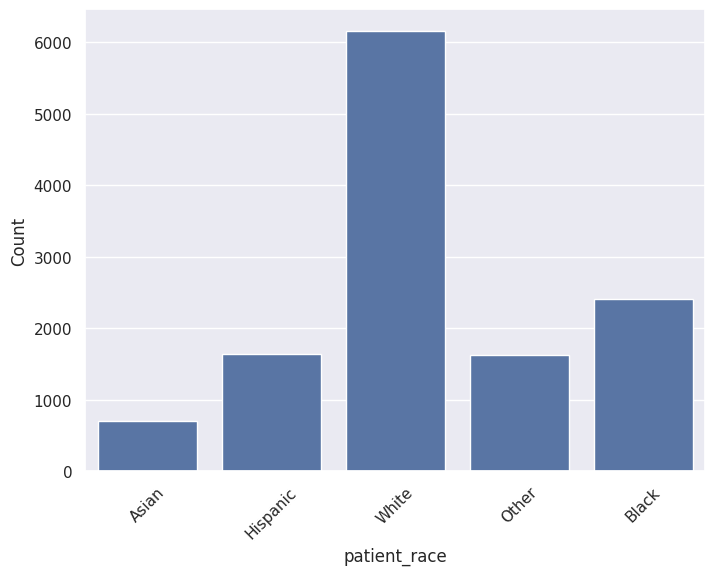

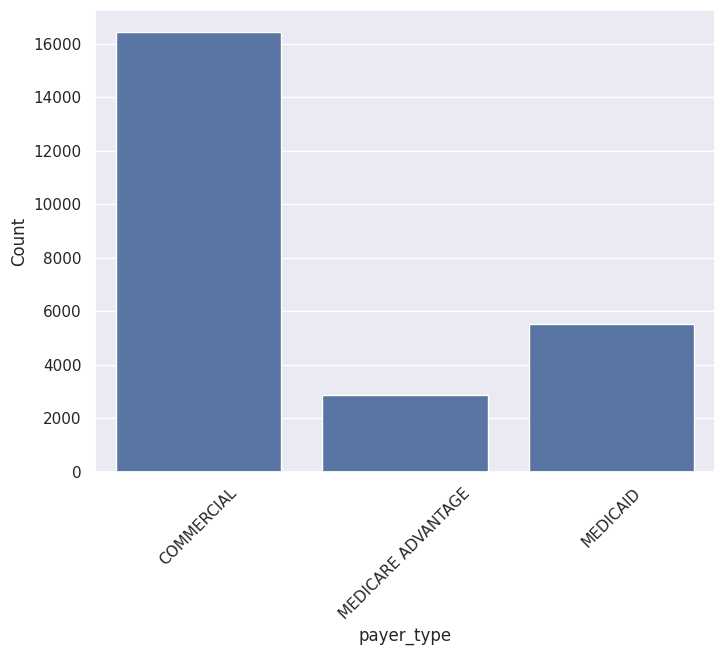

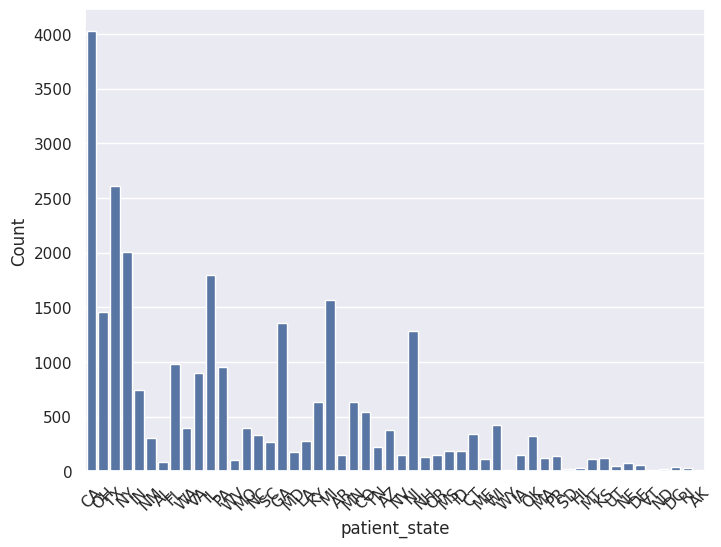

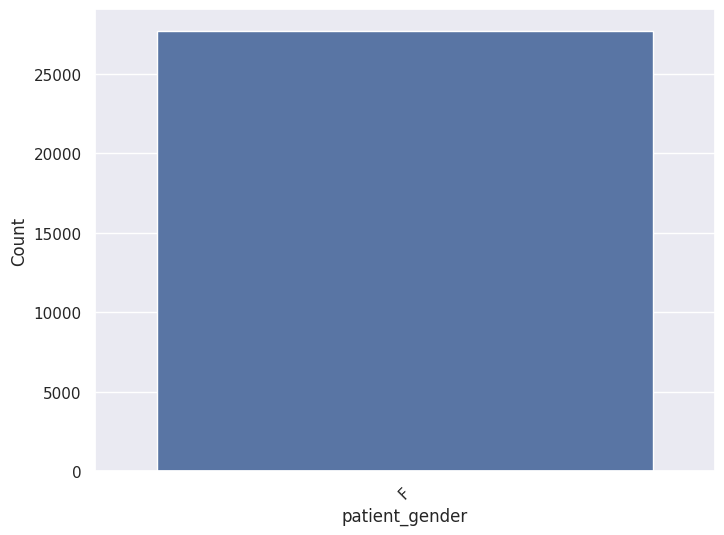

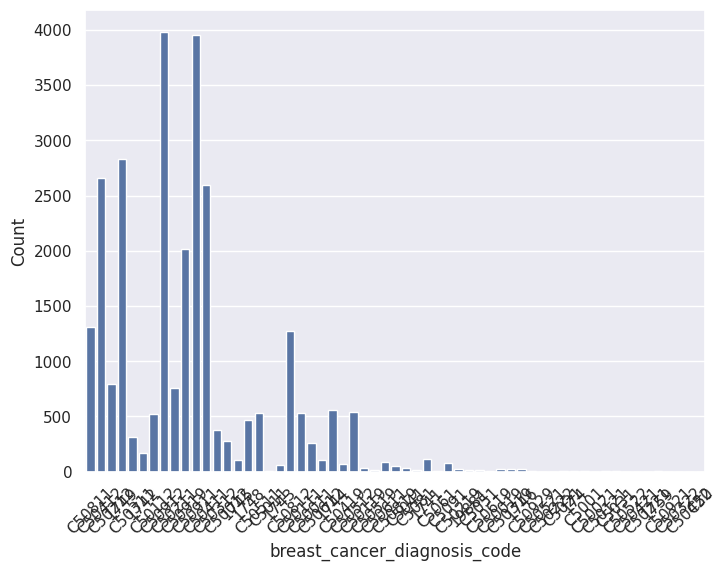

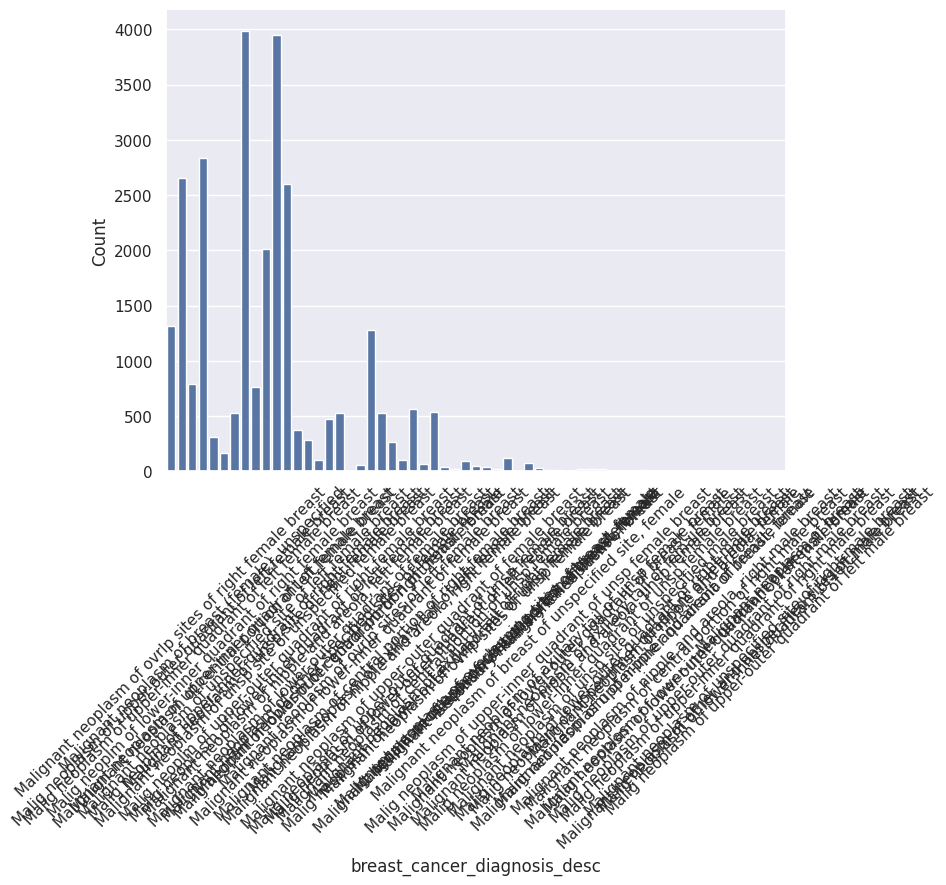

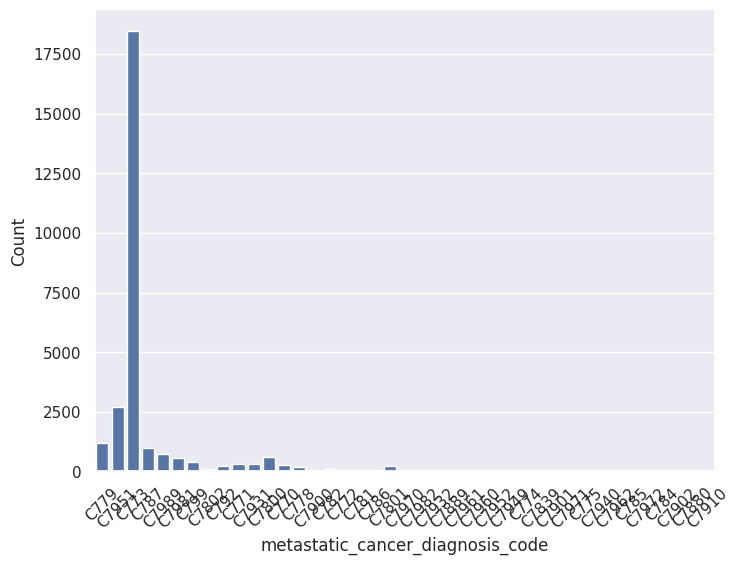

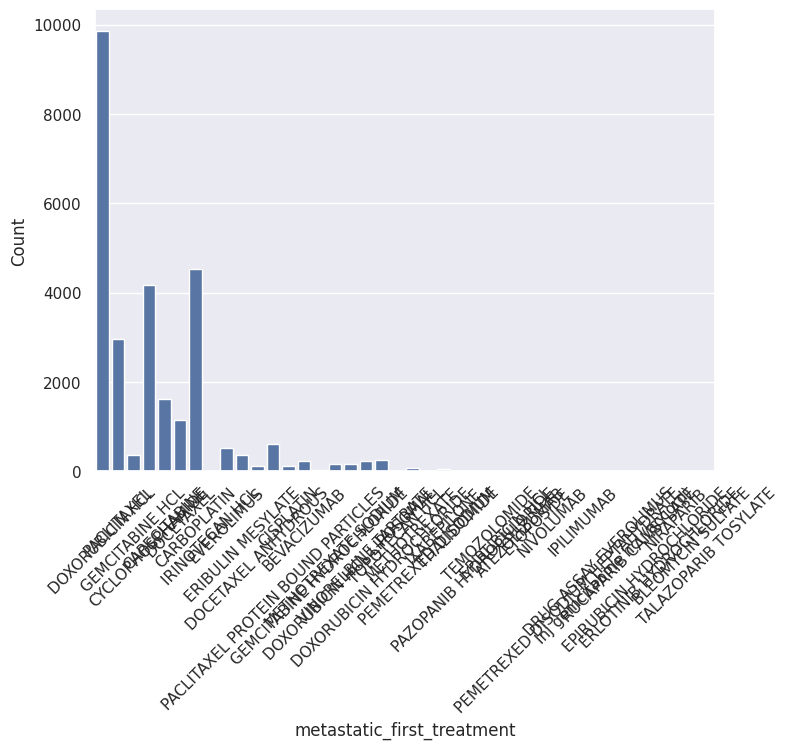

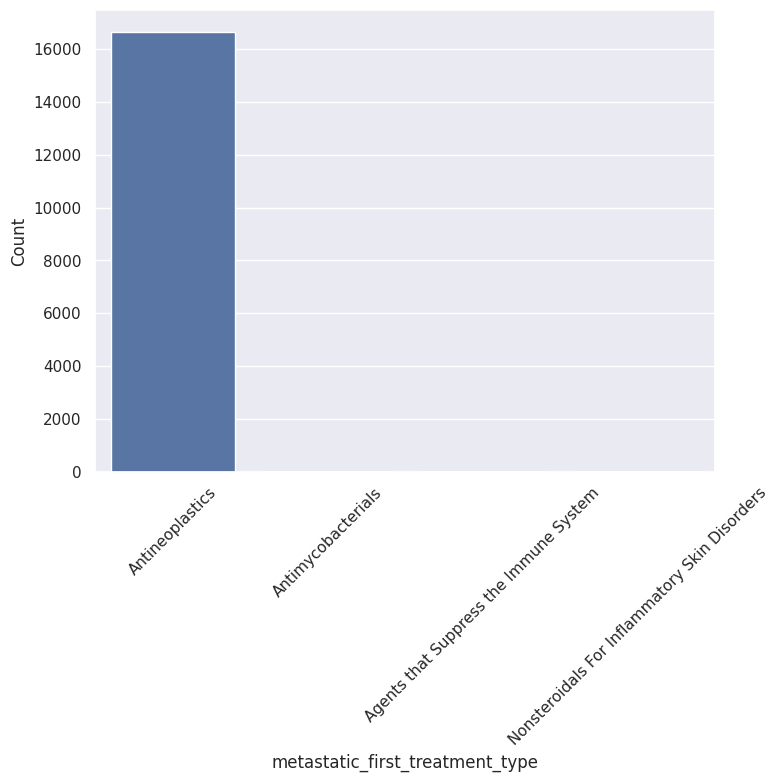

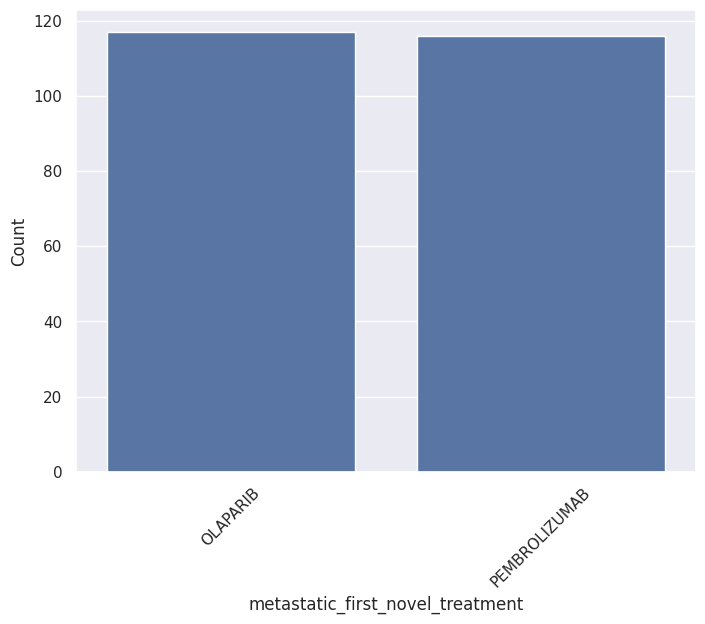

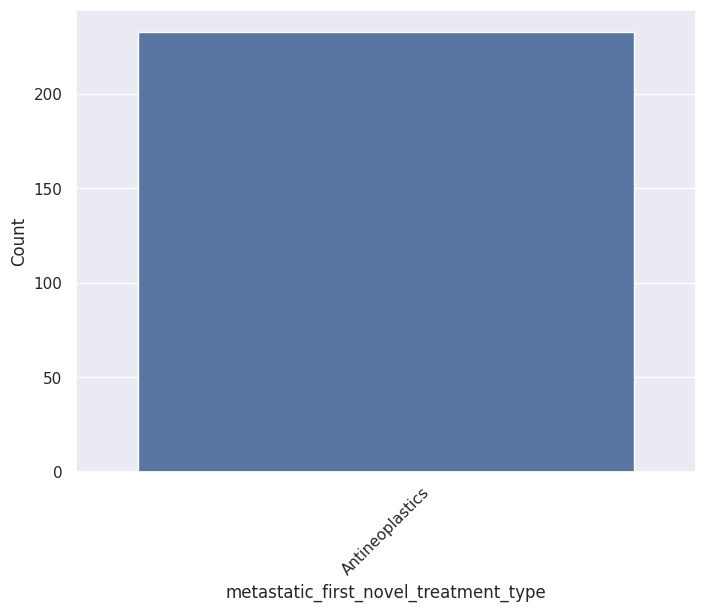

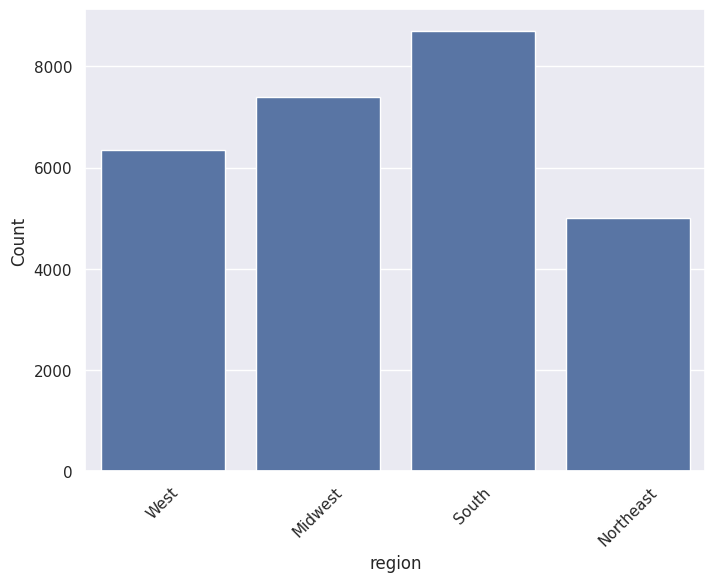

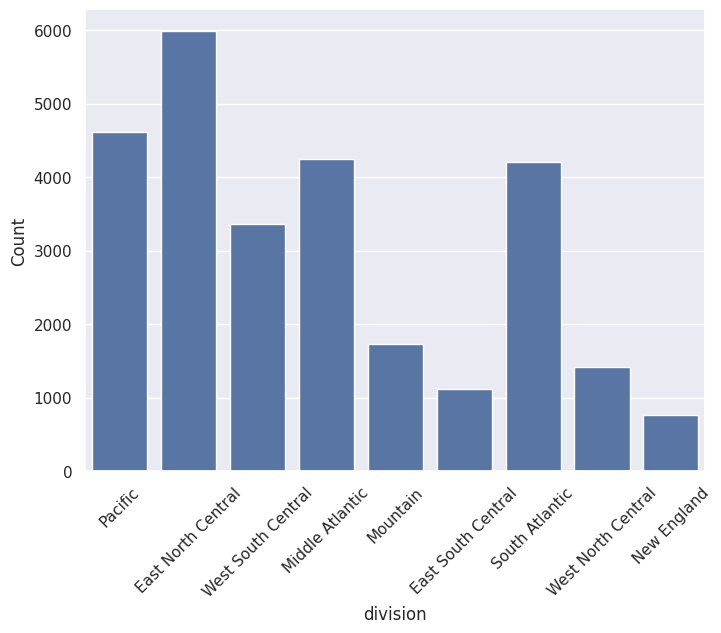

In [ ]:
#Univariate analysis for categorical columns (through bar plots)

#Extracting the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data = df, x = column)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

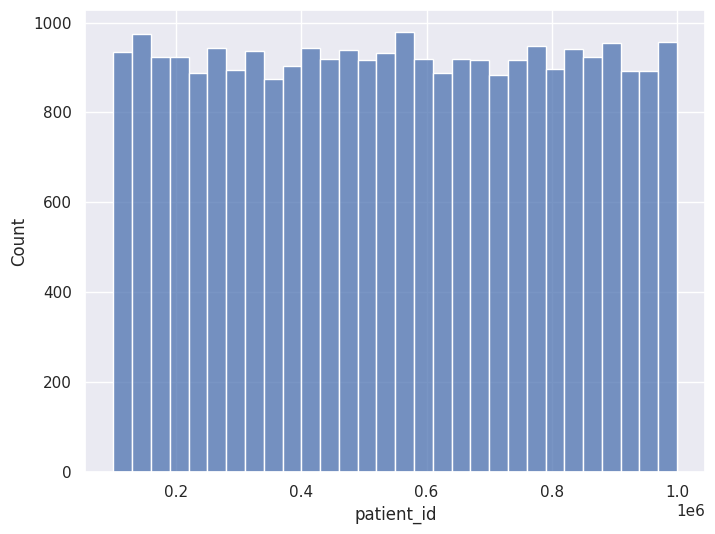

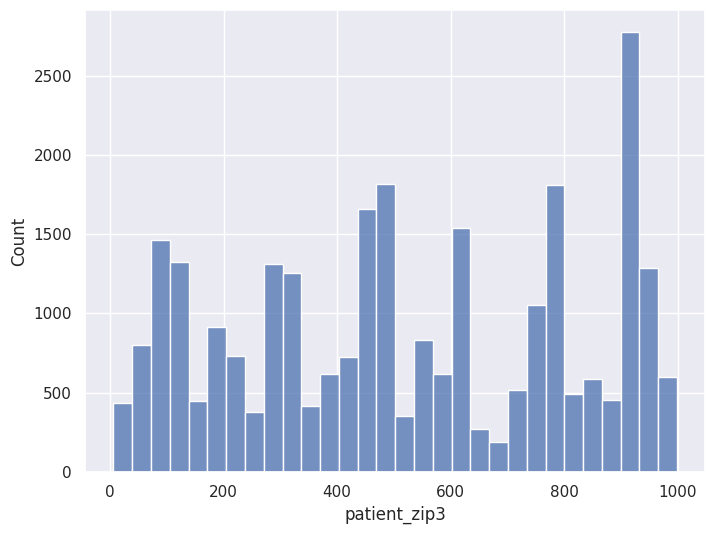

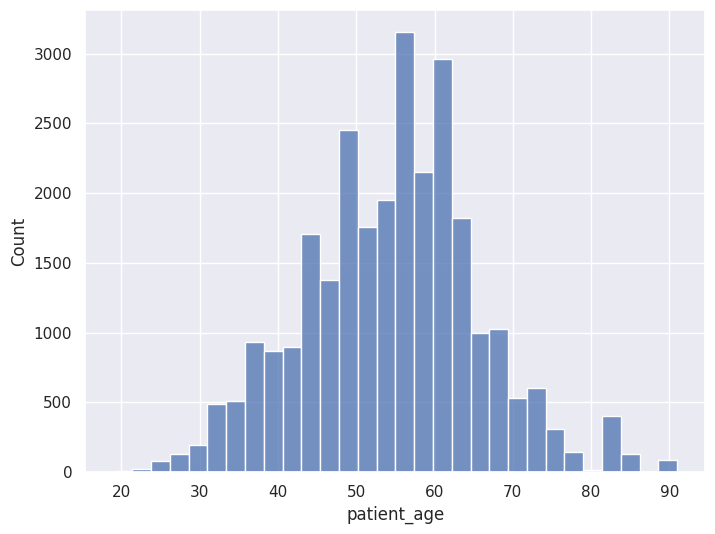

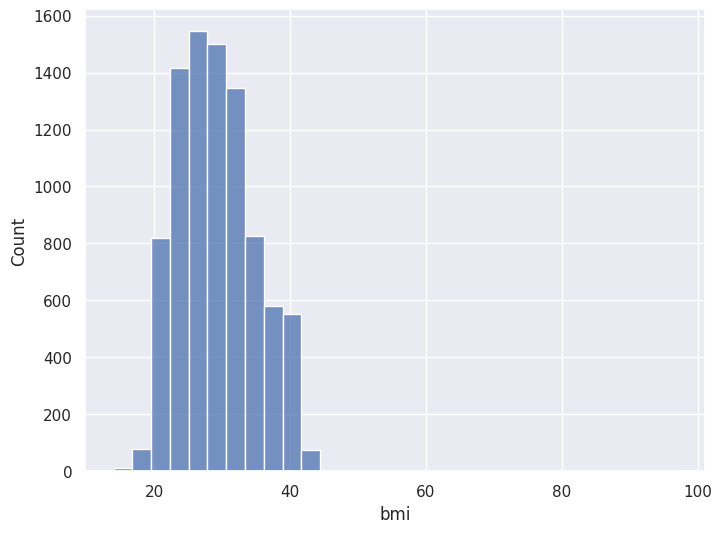

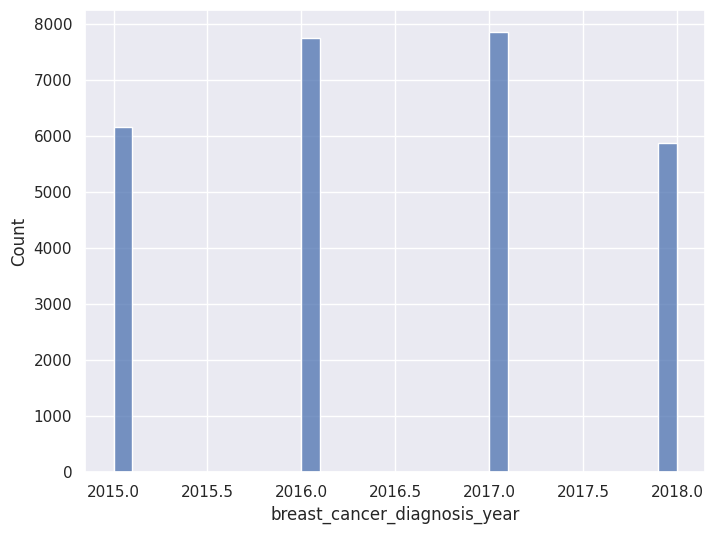

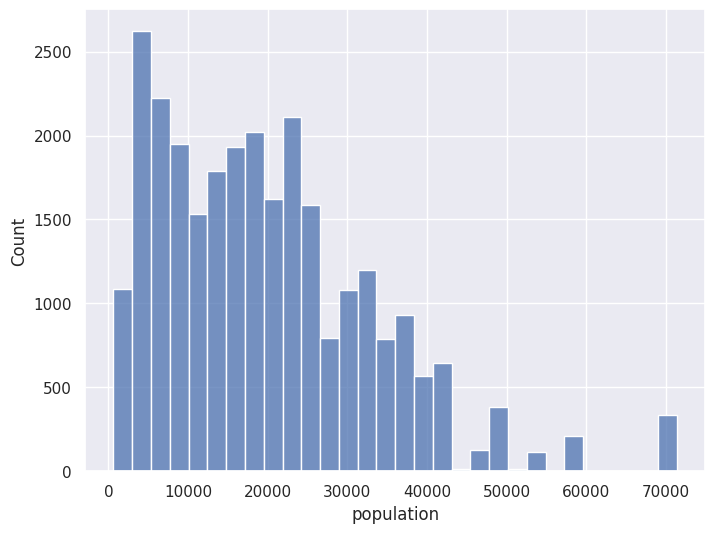

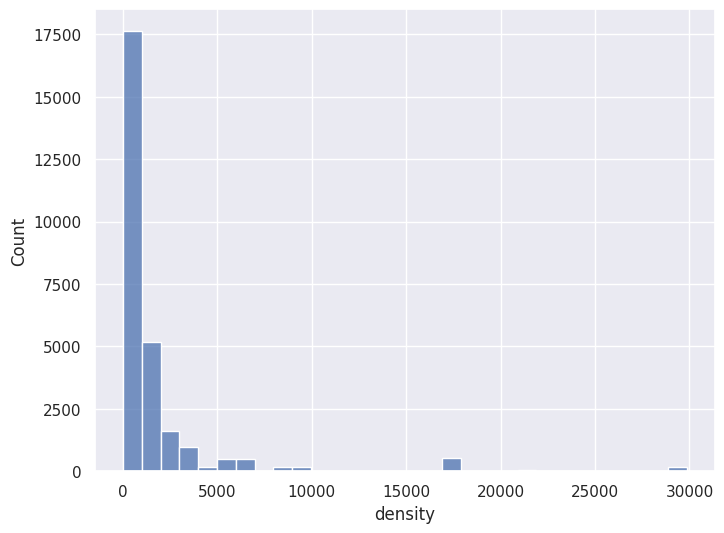

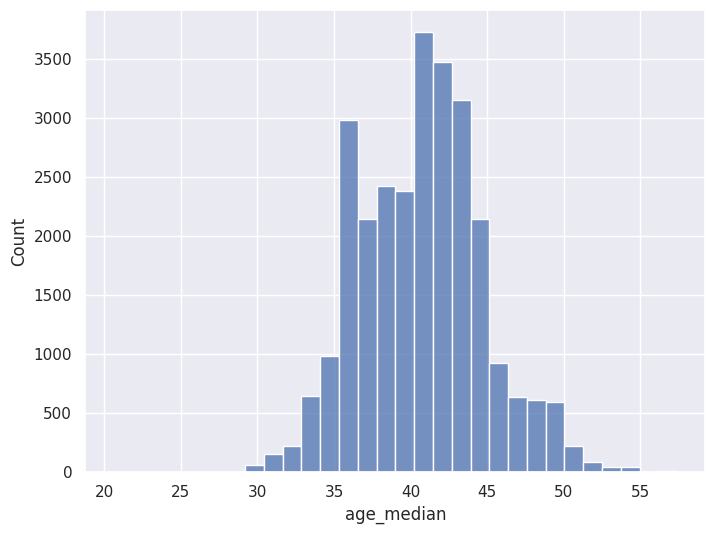

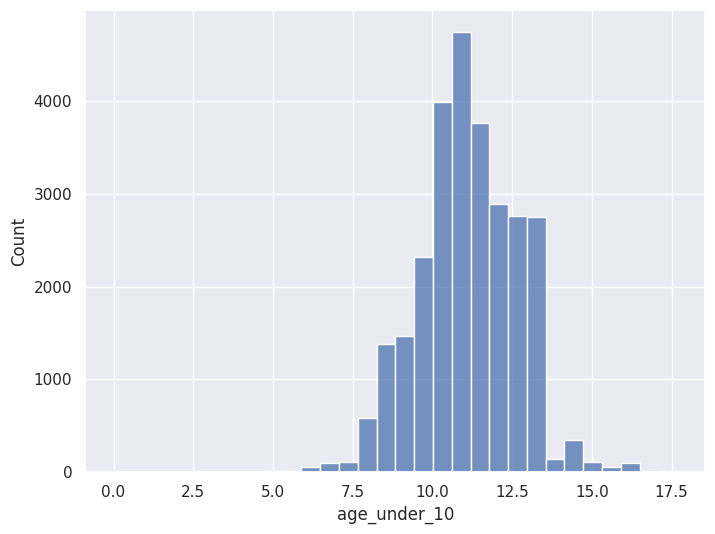

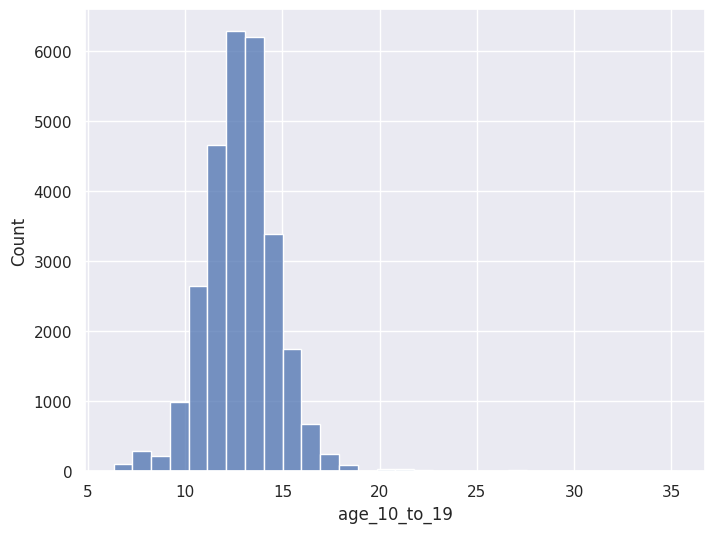

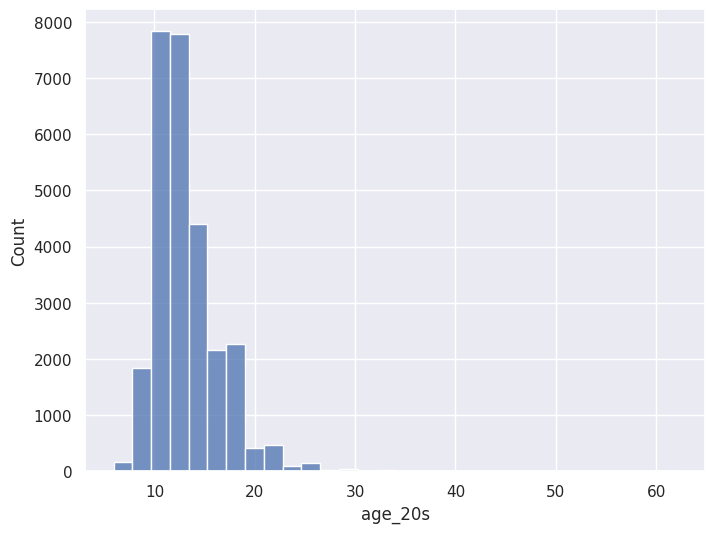

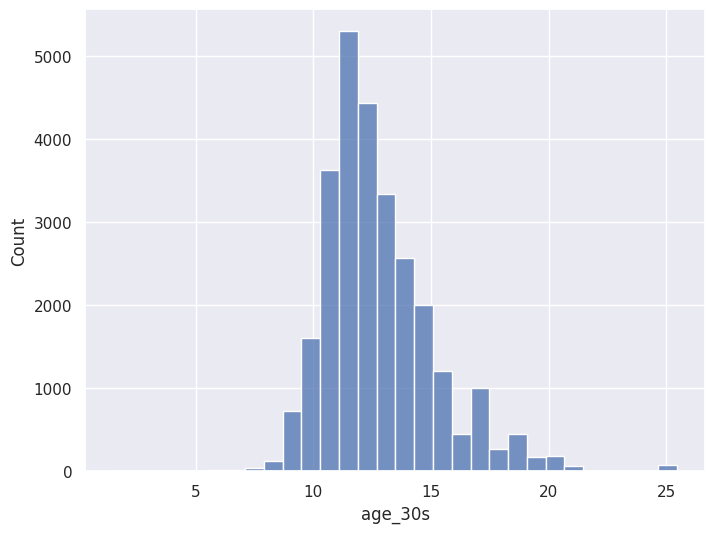

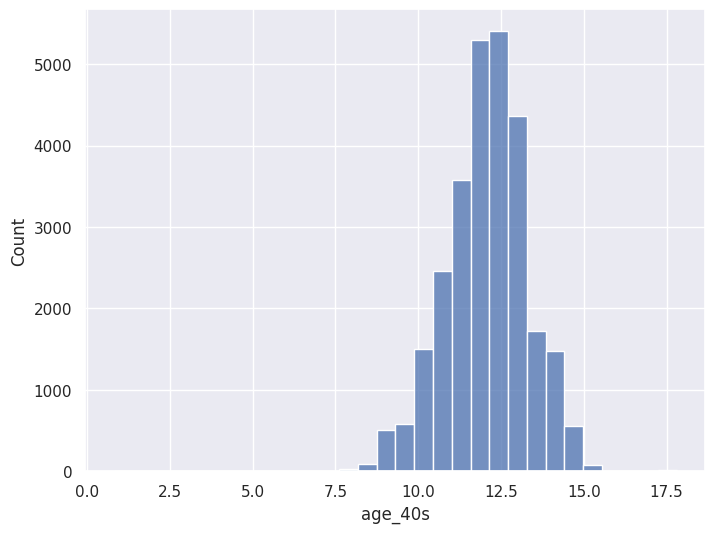

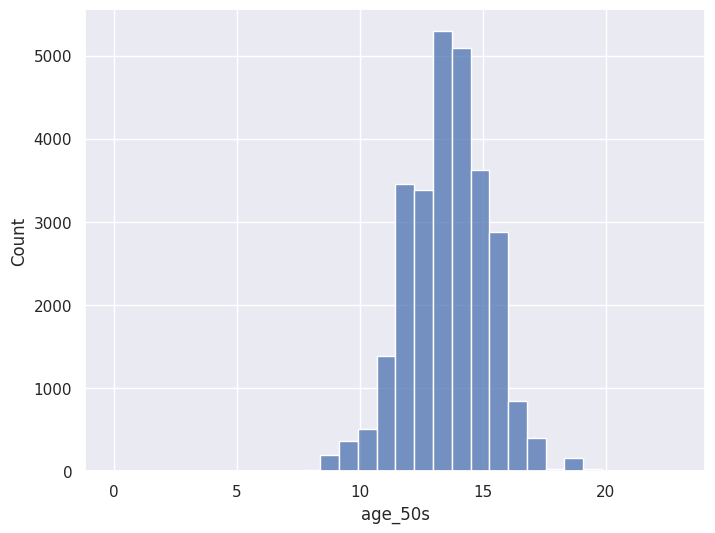

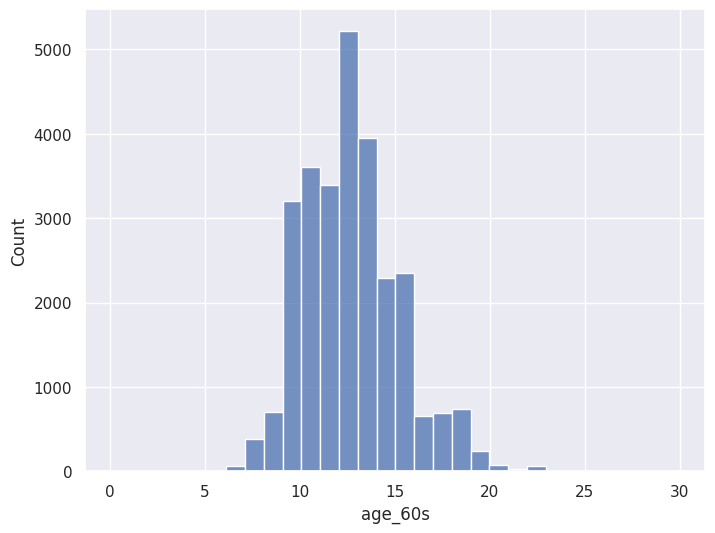

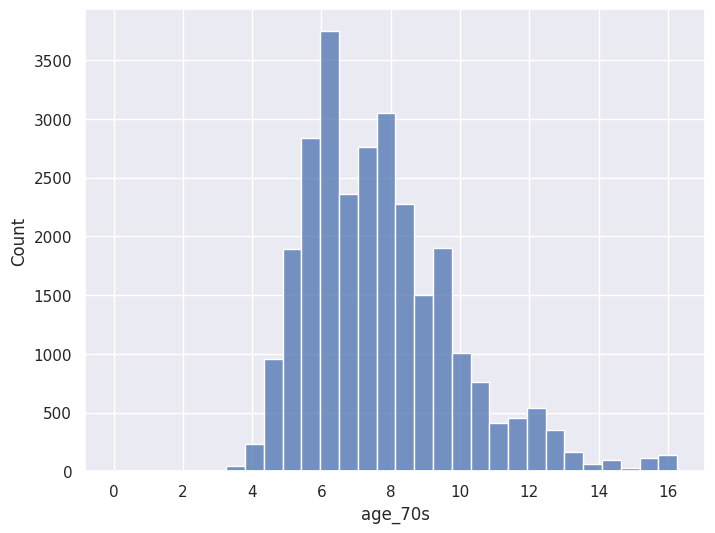

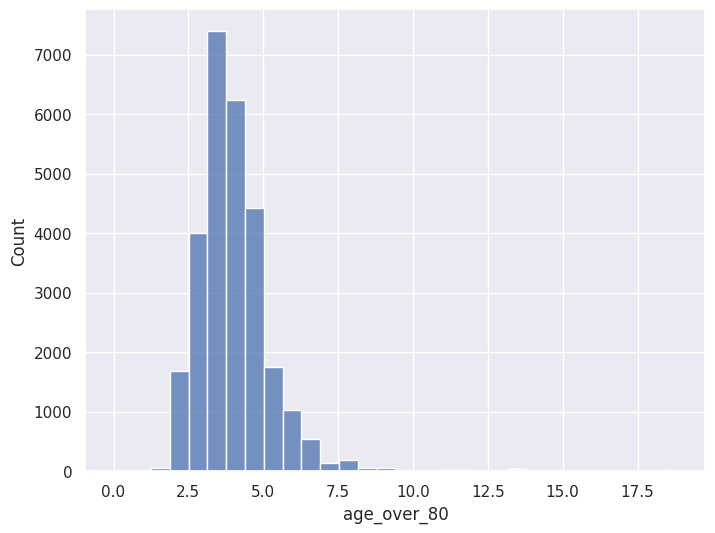

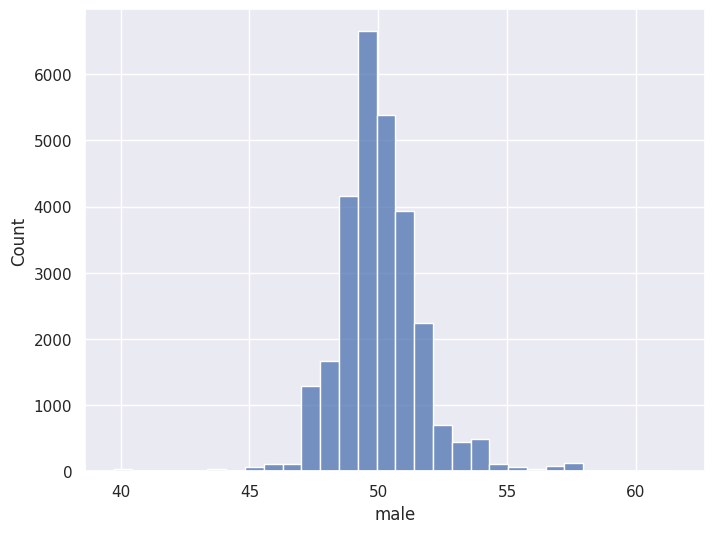

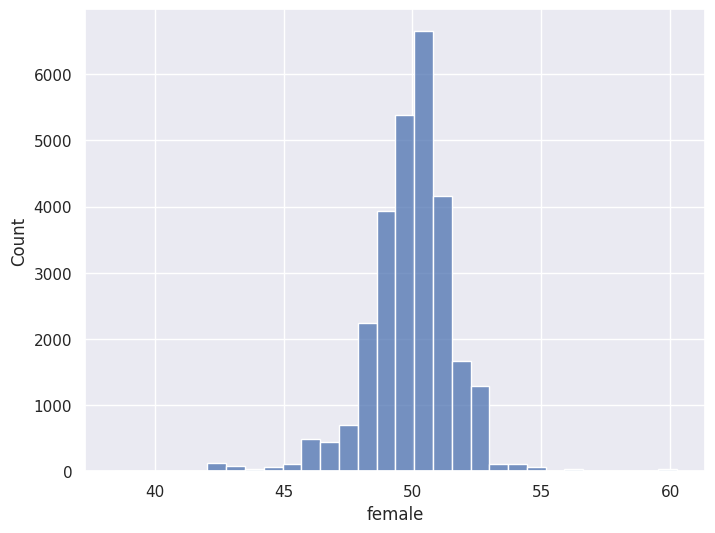

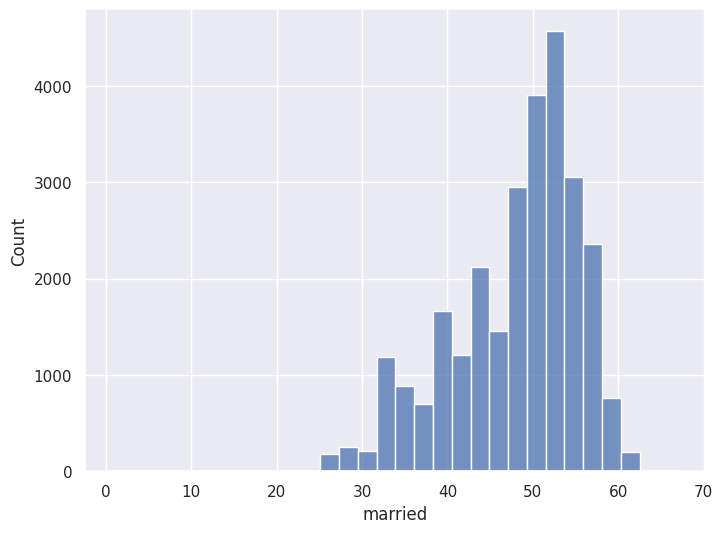

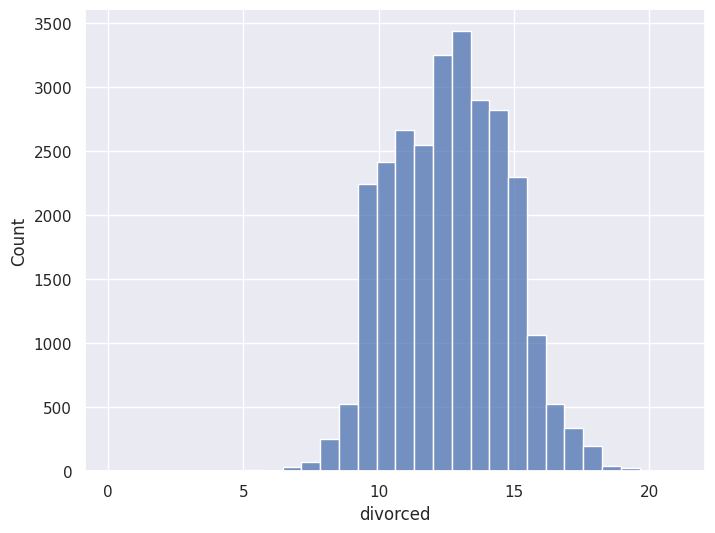

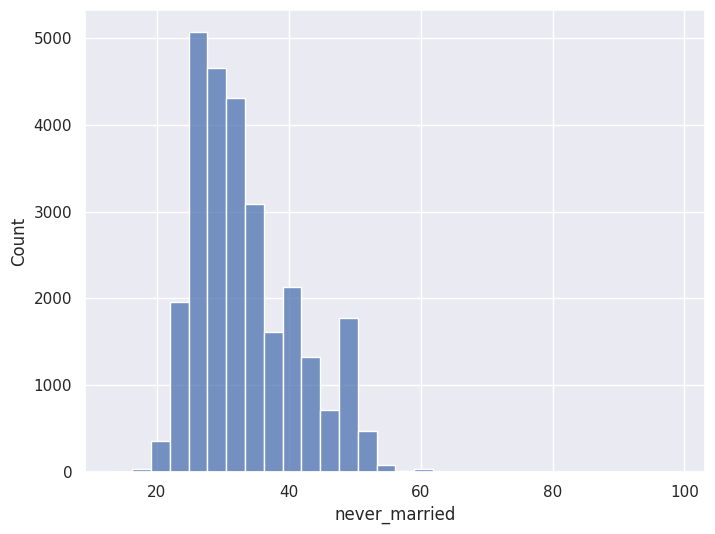

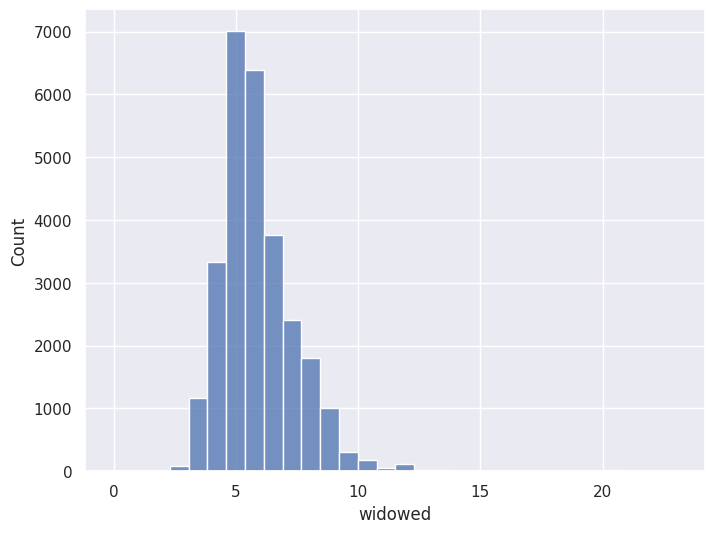

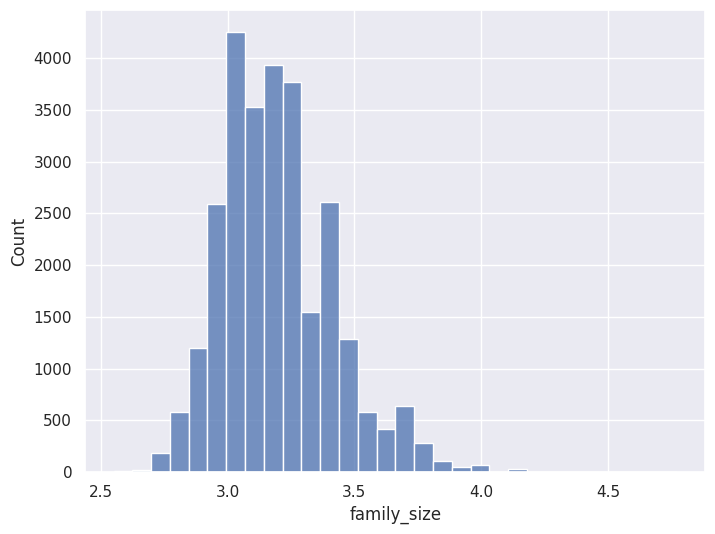

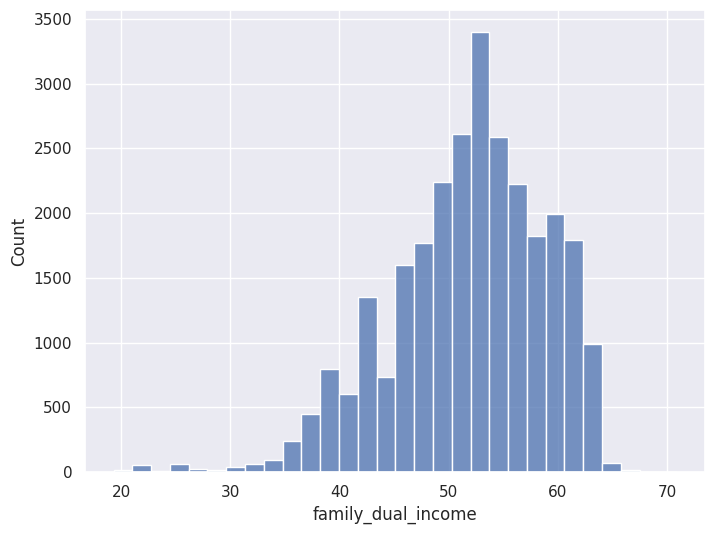

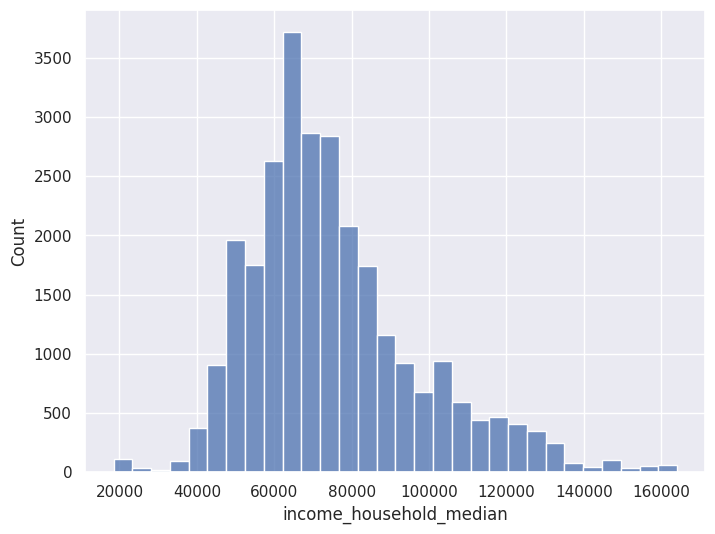

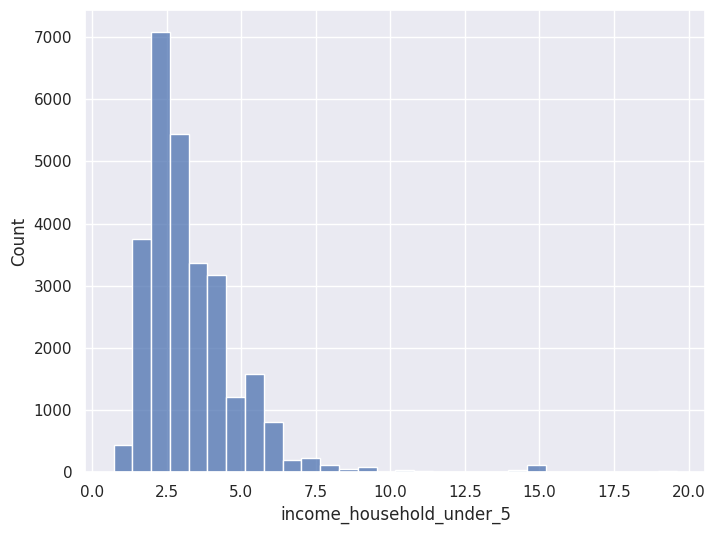

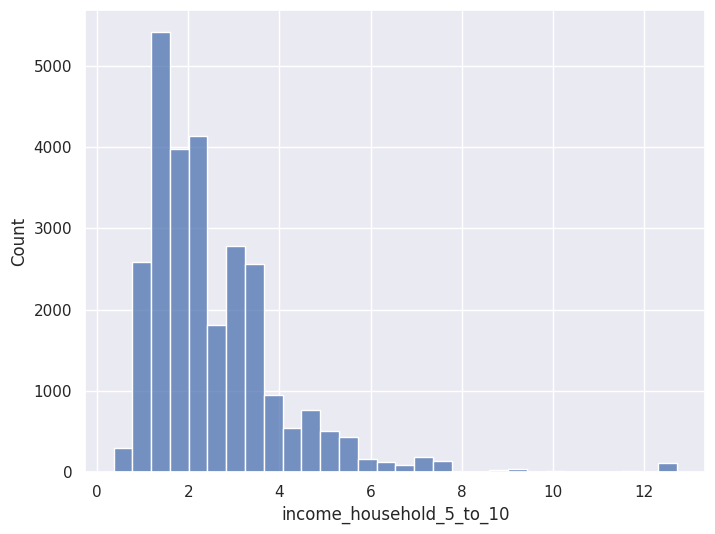

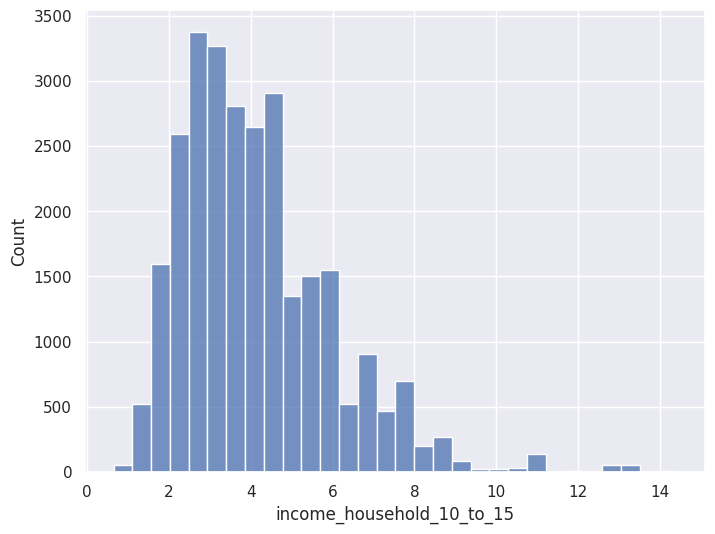

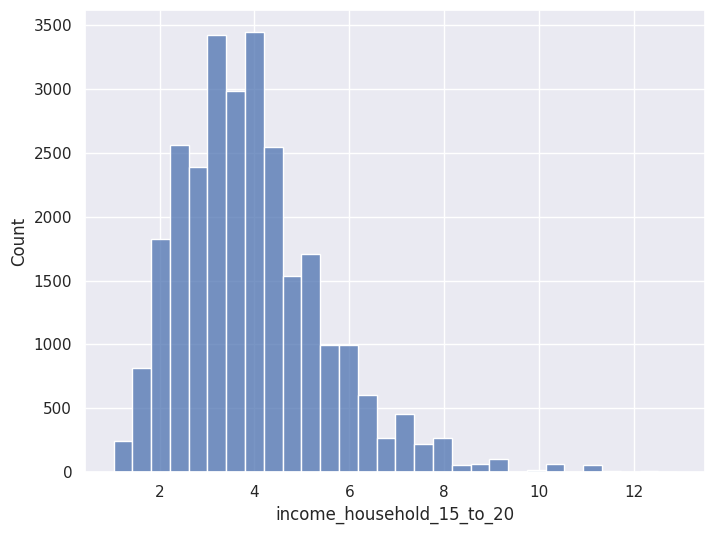

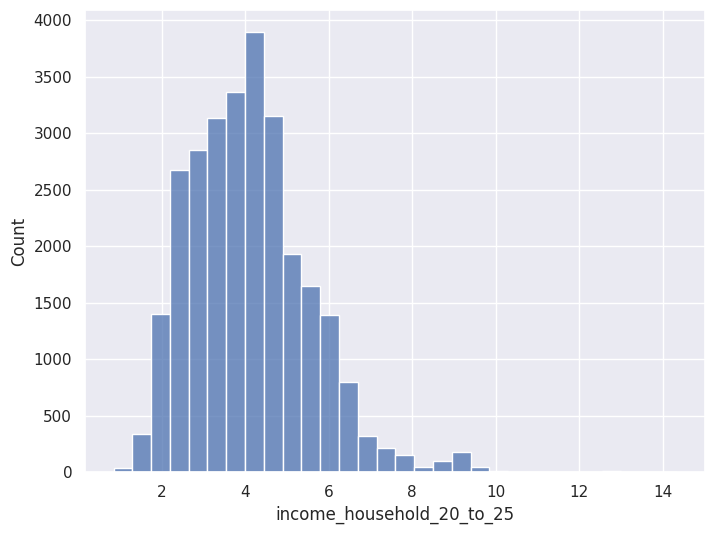

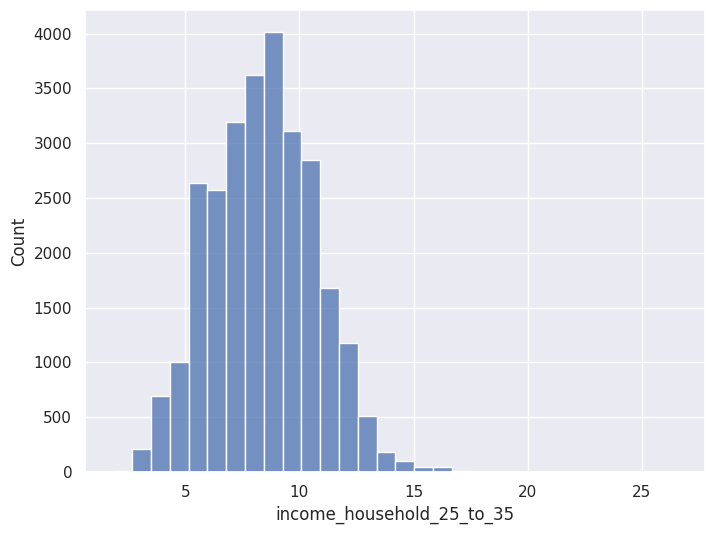

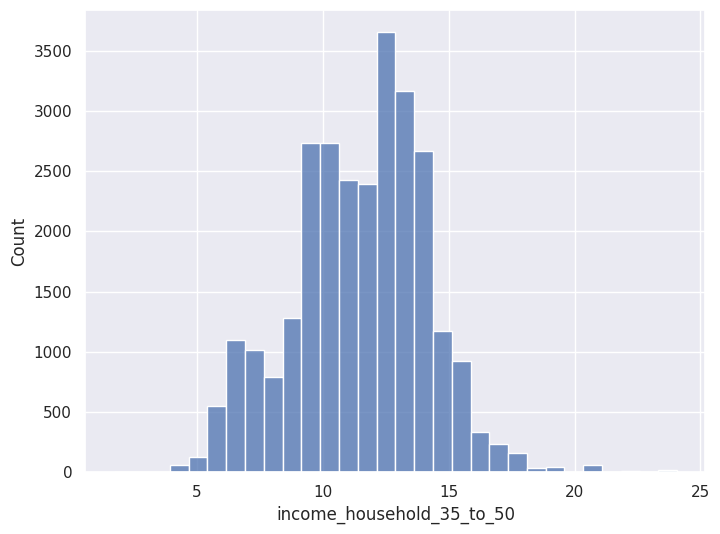

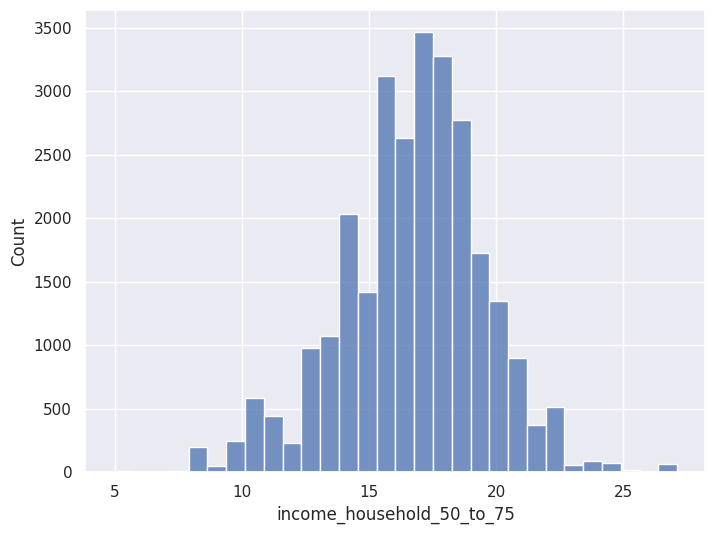

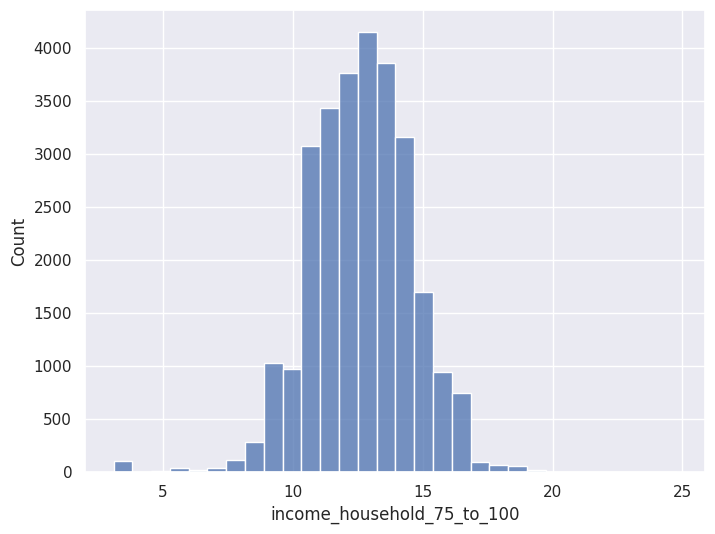

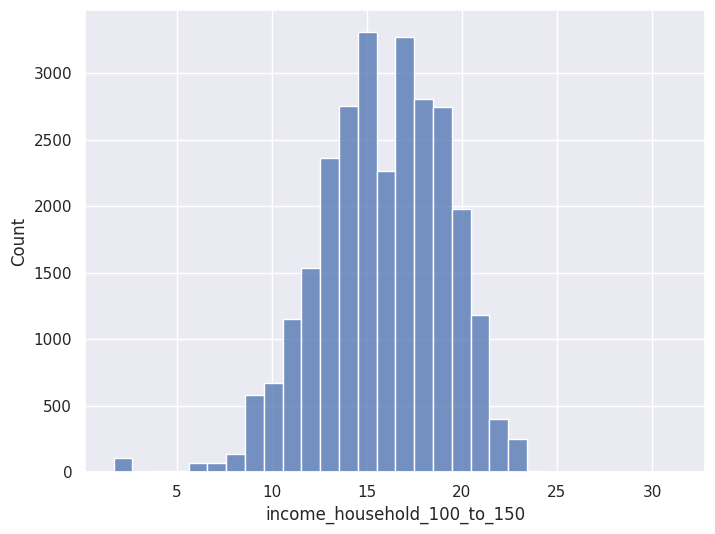

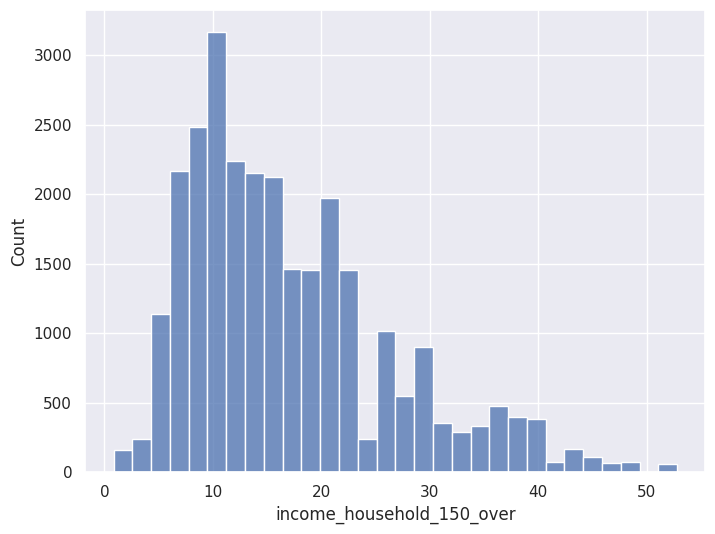

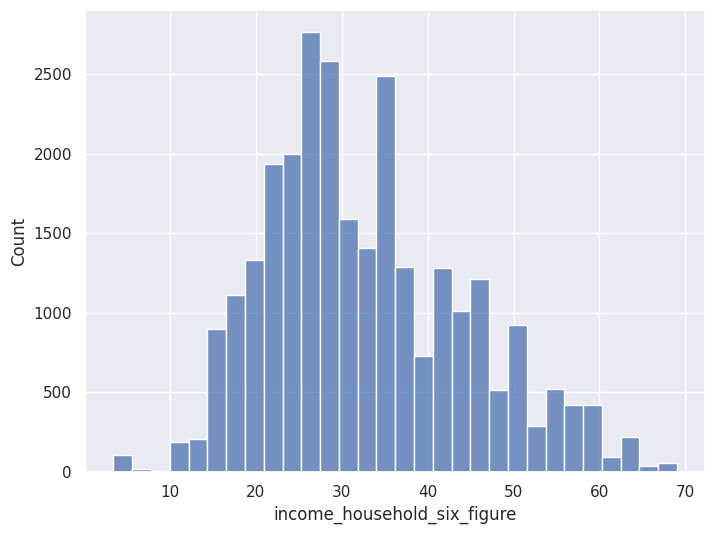

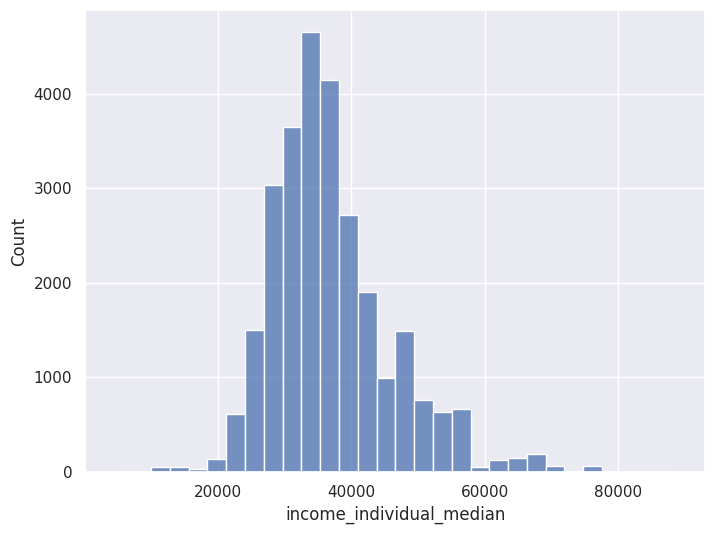

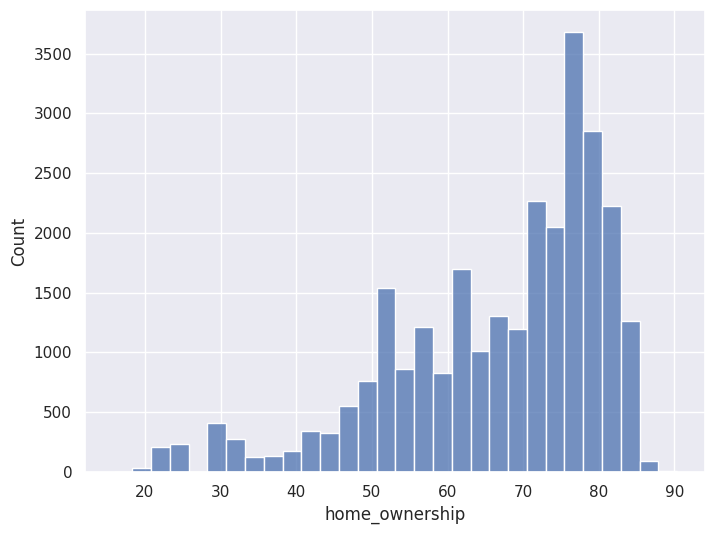

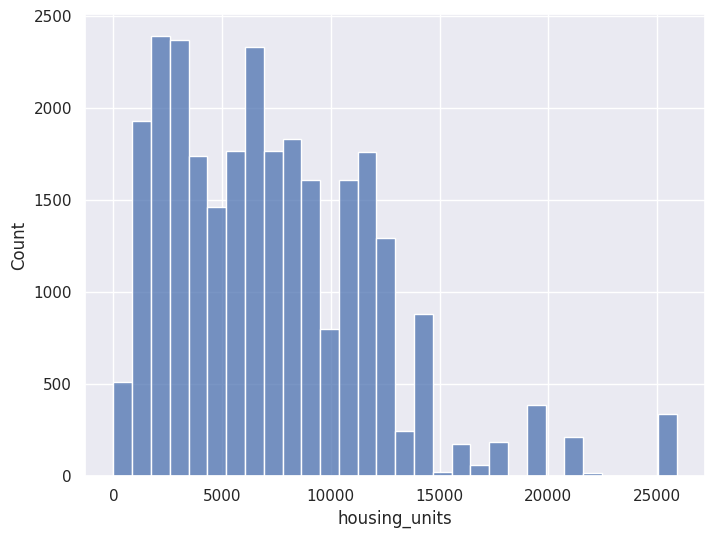

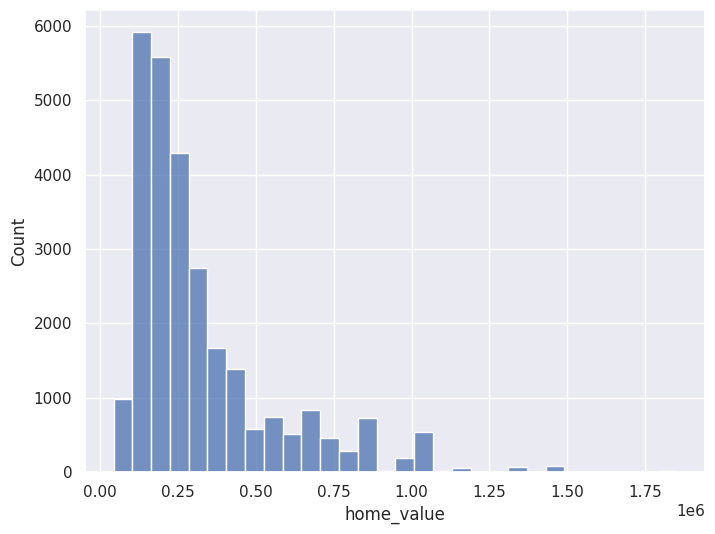

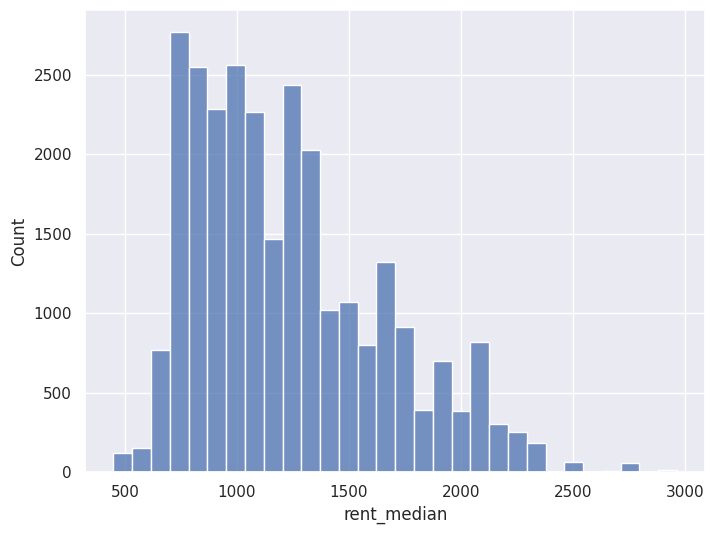

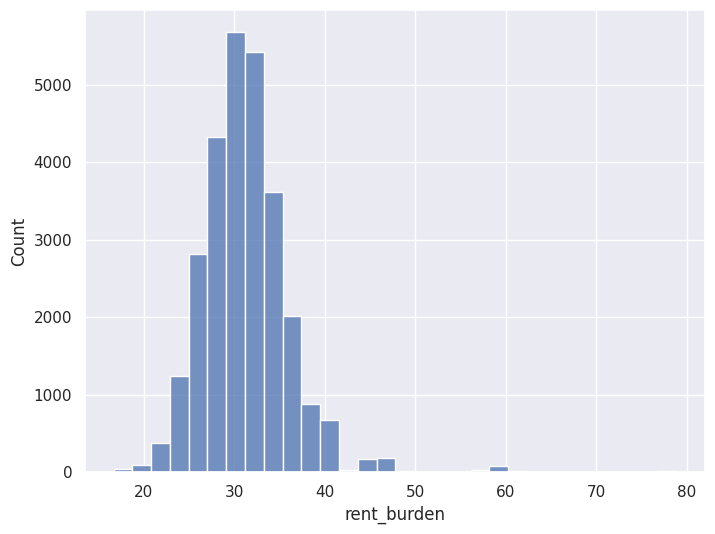

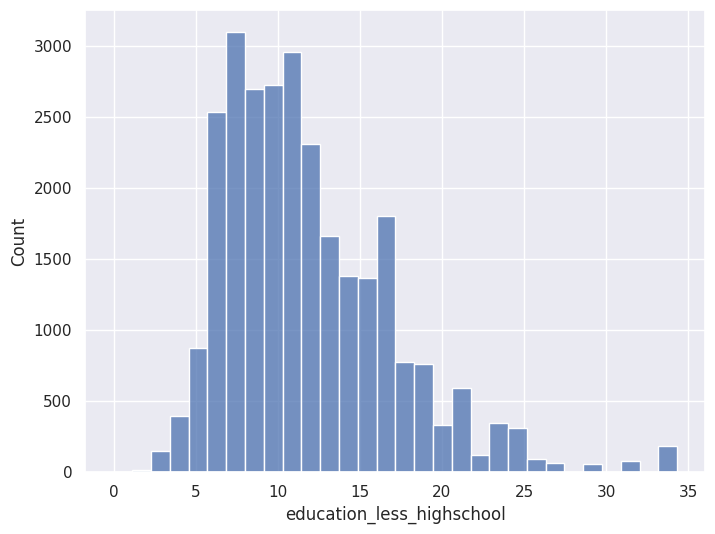

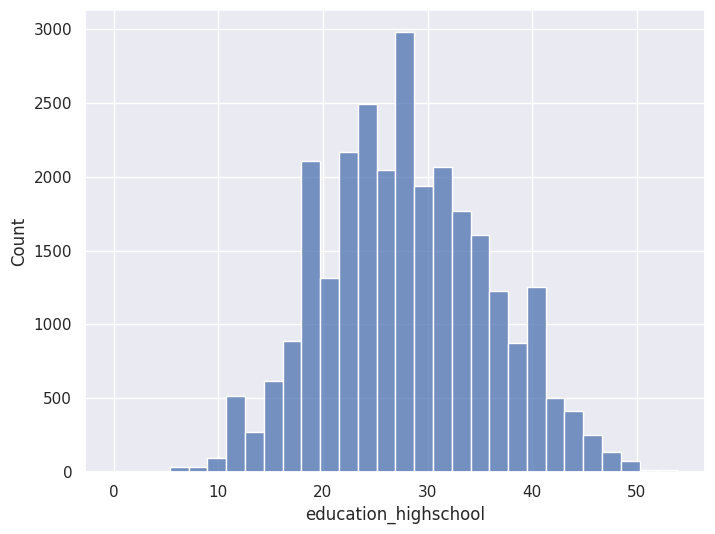

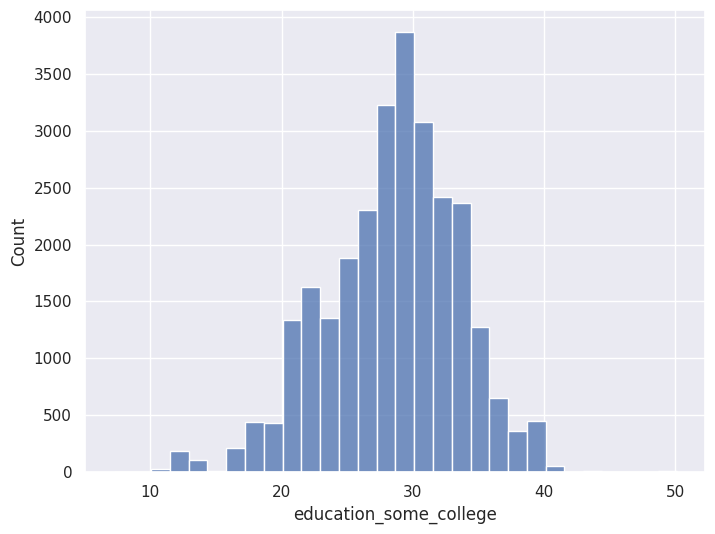

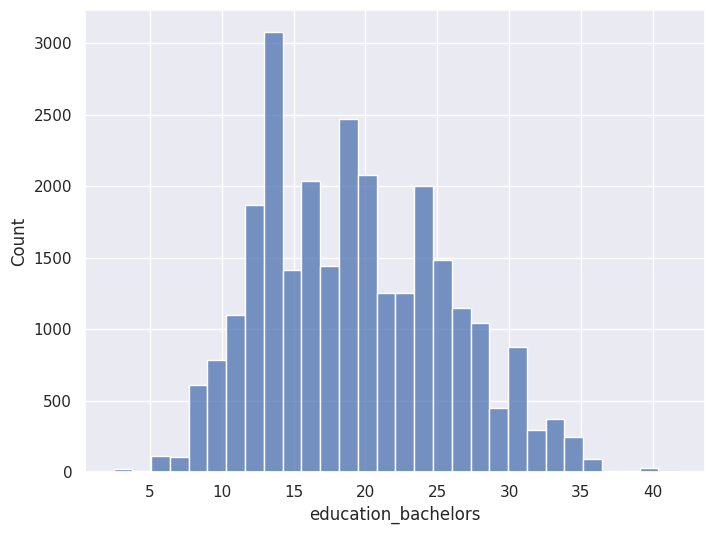

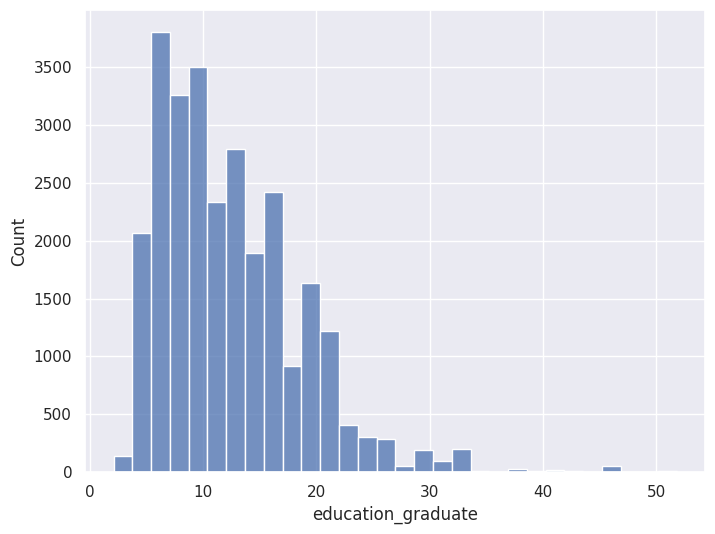

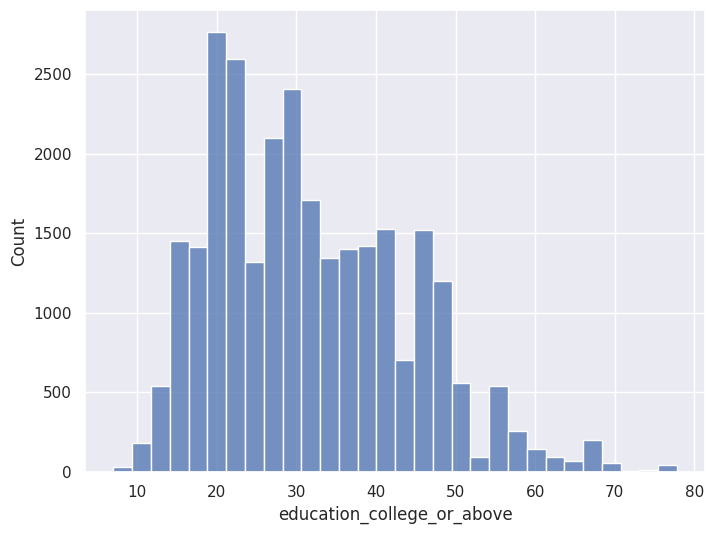

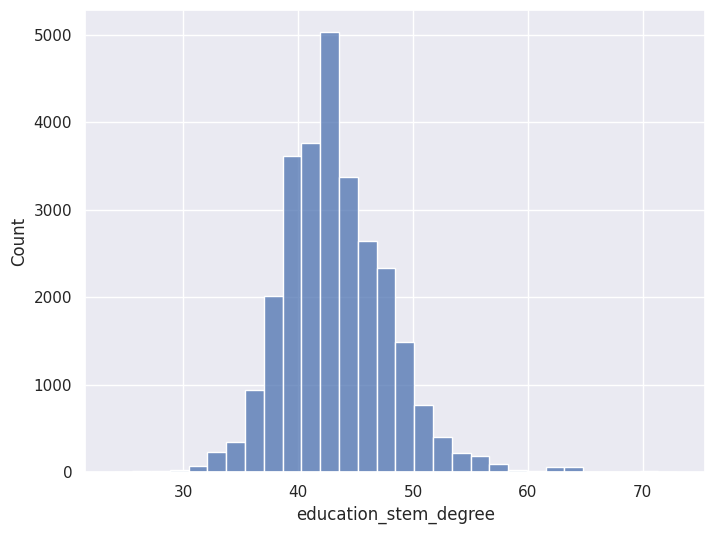

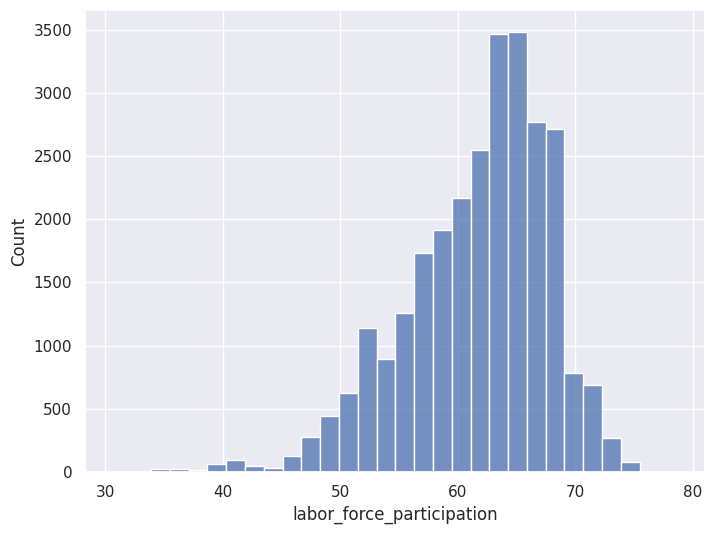

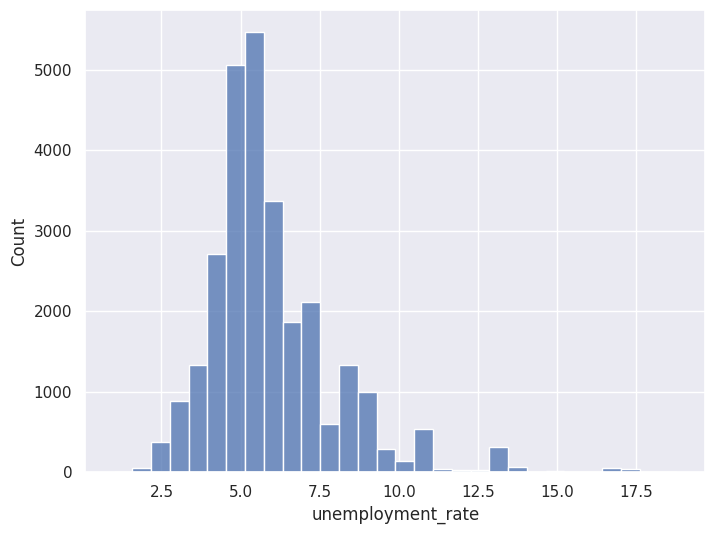

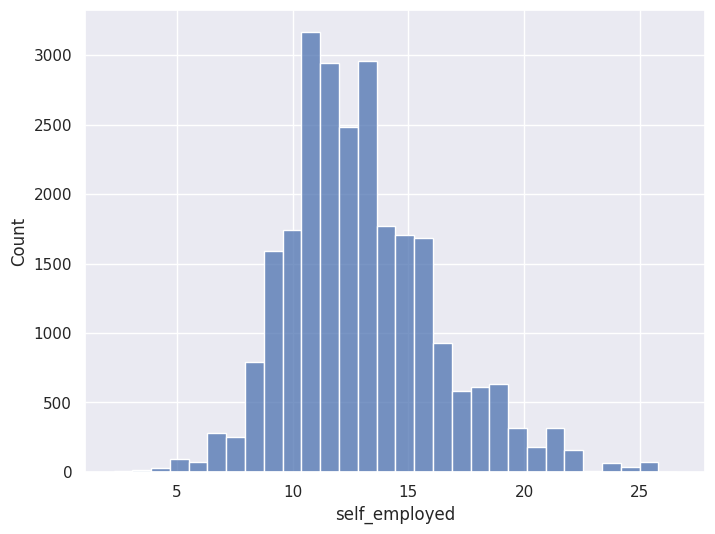

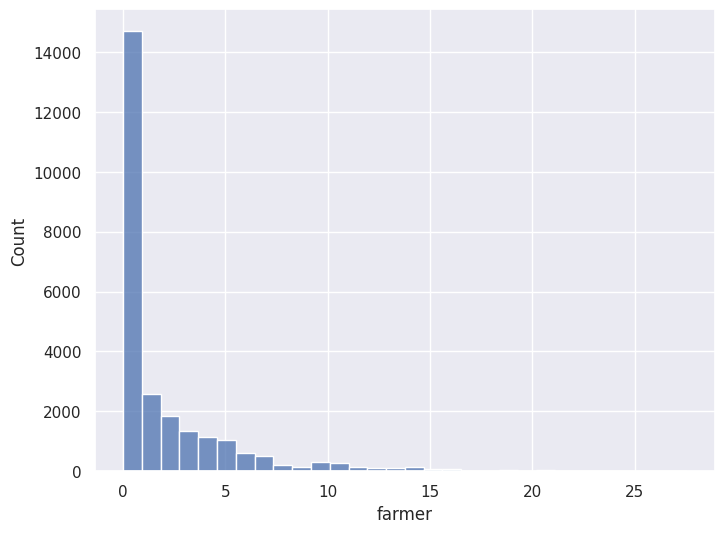

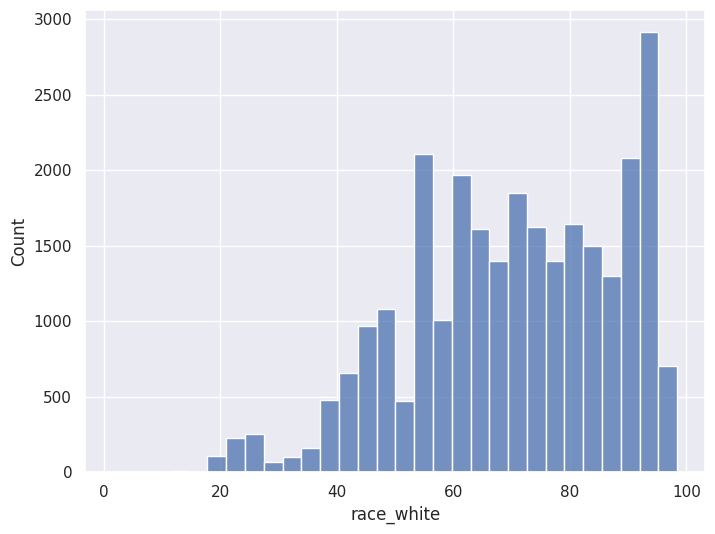

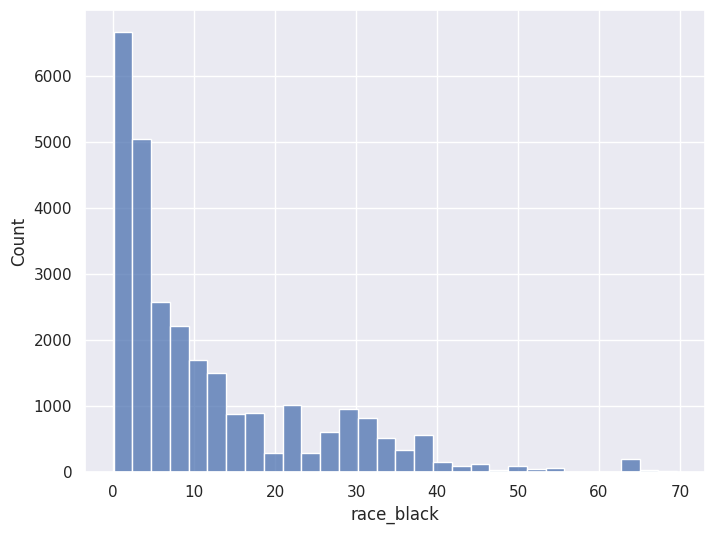

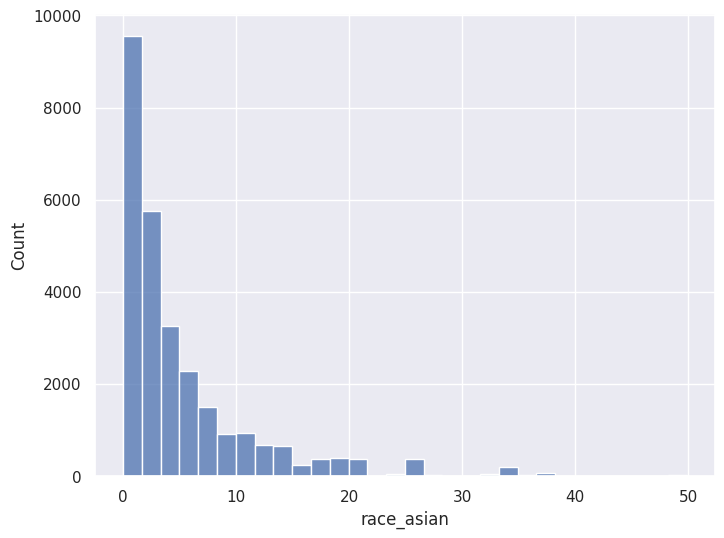

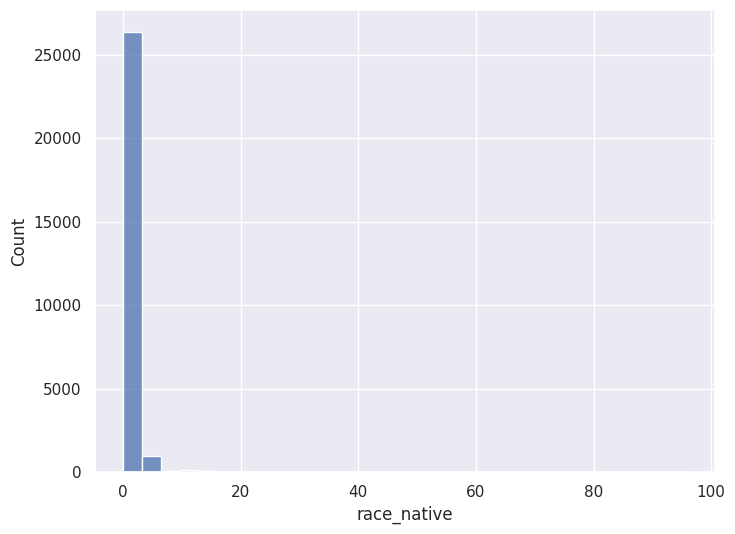

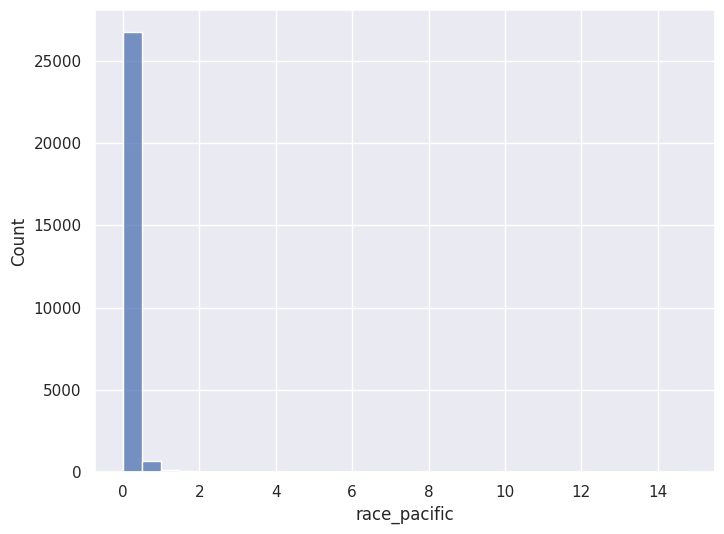

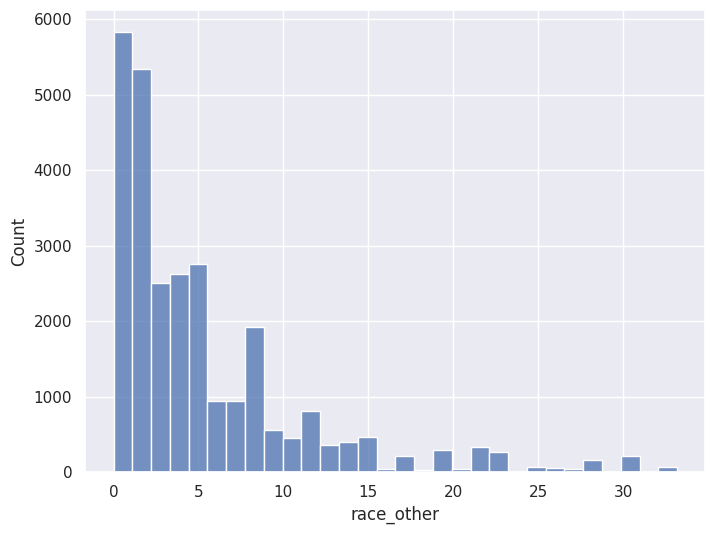

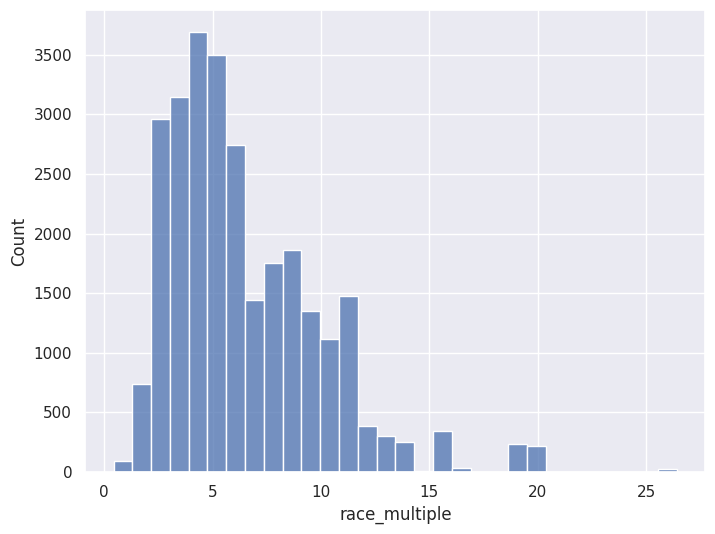

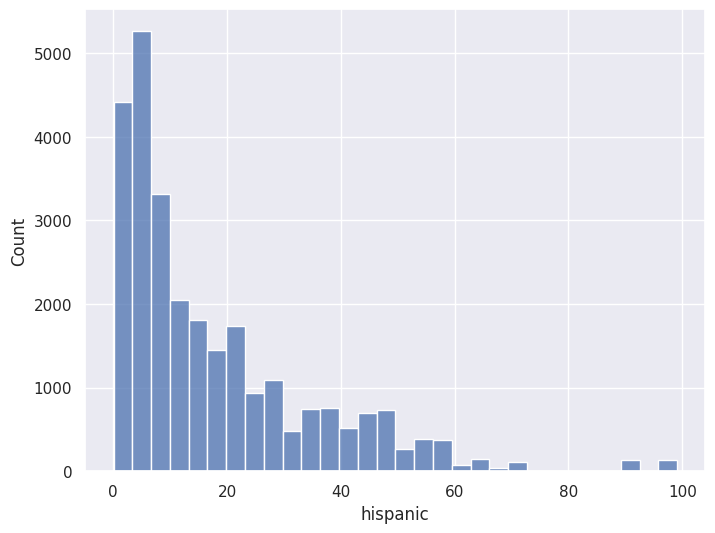

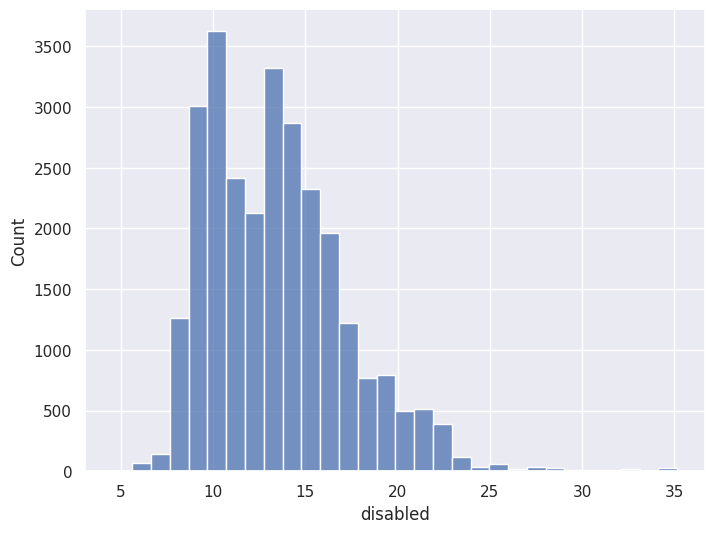

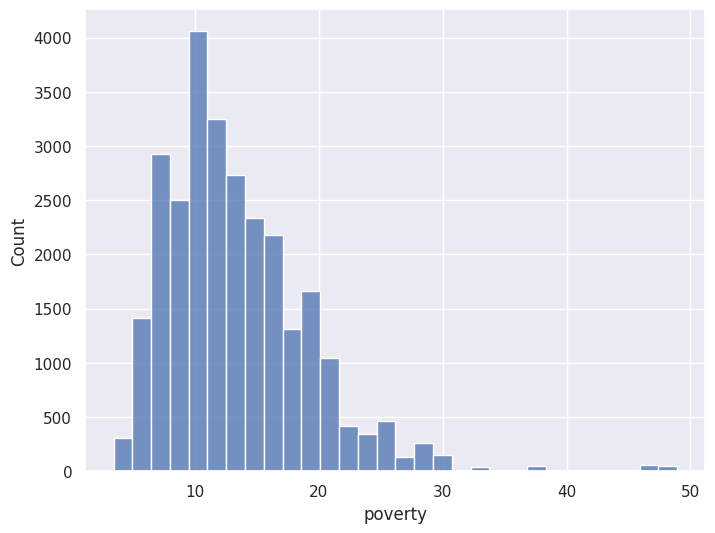

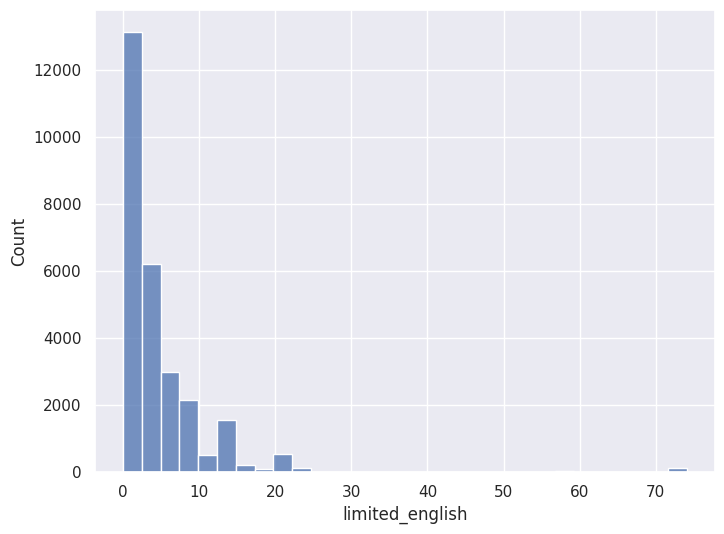

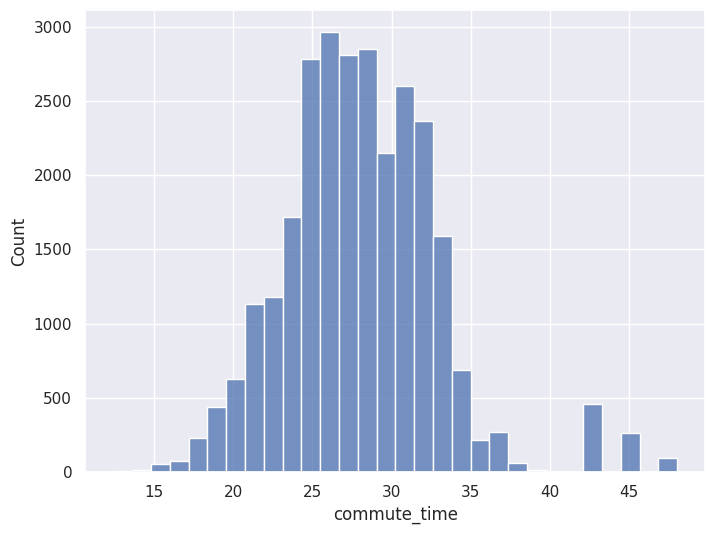

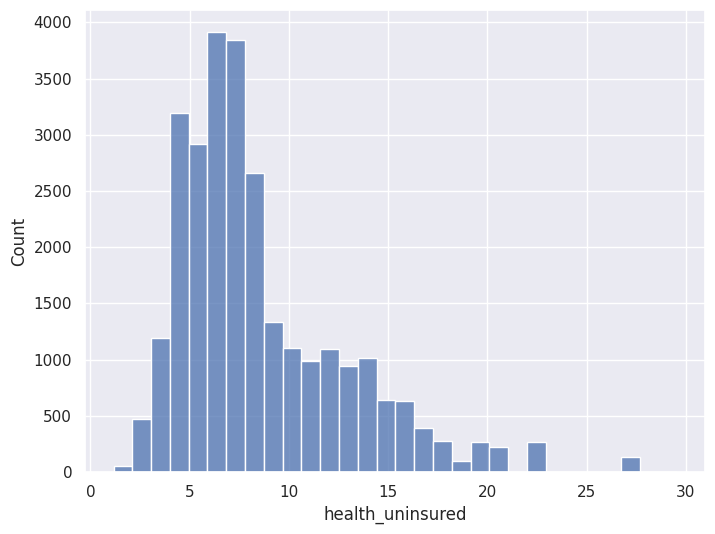

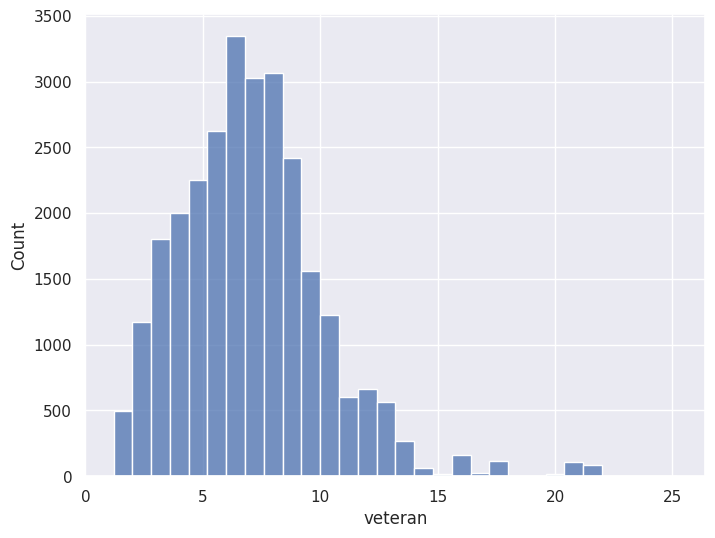

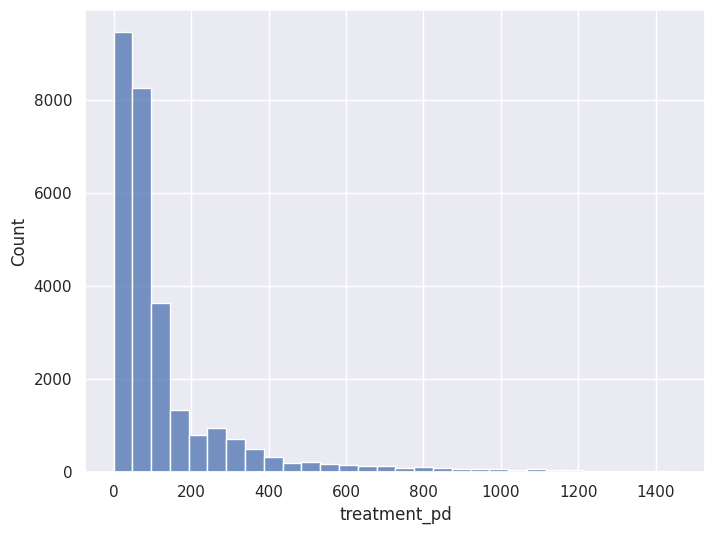

In [ ]:
#Univariate analysis for numerical columns (through histograms)

#Extracting the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

##Q5 - Identifying the mean, range, and standard deviation.

In [ ]:
# Although the 'patient_id' and 'patient_zip3' columns have quatitative values, they are qualitative in nature
quantitative_attributes = df.select_dtypes(include=['int64', 'float64']).columns

statistics = {}

for column in quantitative_attributes:
    mean = df[column].mean()
    std_dev = df[column].std()
    data_range = df[column].max() - df[column].min()

    statistics[column] = {'Mean': mean, 'Standard Deviation': std_dev, 'Range': data_range}

for column, stats in statistics.items():
    print(f"\nColumn: {column}")
    print("Statistics:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")



Column: patient_id
Statistics:
Mean: 549586.8286116932
Standard Deviation: 260306.2911807587
Range: 899945

Column: patient_zip3
Statistics:
Mean: 522.0247524752475
Standard Deviation: 292.40517826979794
Range: 993

Column: patient_age
Statistics:
Mean: 54.45642118956421
Standard Deviation: 11.202088651444878
Range: 72

Column: bmi
Statistics:
Mean: 29.27780432049377
Standard Deviation: 5.636923210684181
Range: 83.0

Column: breast_cancer_diagnosis_year
Statistics:
Mean: 2016.4864493748646
Standard Deviation: 1.0586019617990923
Range: 3

Column: population
Statistics:
Mean: 19919.85079858351
Standard Deviation: 13465.788961850069
Range: 70738

Column: density
Statistics:
Mean: 1655.0232913925918
Standard Deviation: 3639.2594822289766
Range: 29850.863970870003

Column: age_median
Statistics:
Mean: 40.674047081325426
Standard Deviation: 4.026393228315662
Range: 36.81764706

Column: age_under_10
Statistics:
Mean: 11.117255012750018
Standard Deviation: 1.535439721082708
Range: 17.675

Col

##Q6 - Identifying attributes that are highly correlated with the target attribute.

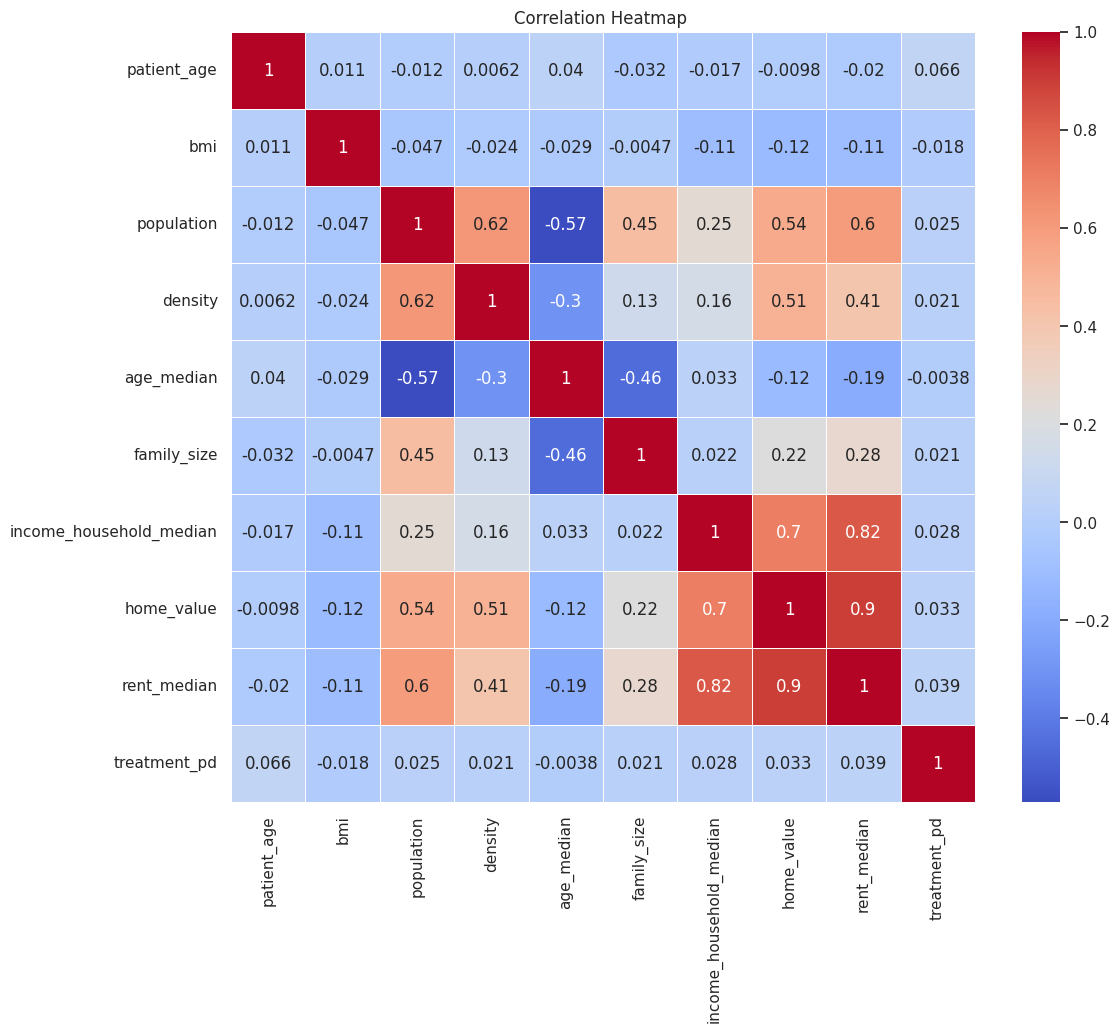

In [ ]:
numeric_columns1 = ['patient_age', 'bmi', 'population', 'density', 'age_median', 'family_size', 'income_household_median',
                    'home_value', 'rent_median', 'treatment_pd']
correlation_matrix1 = df[numeric_columns1].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.show()

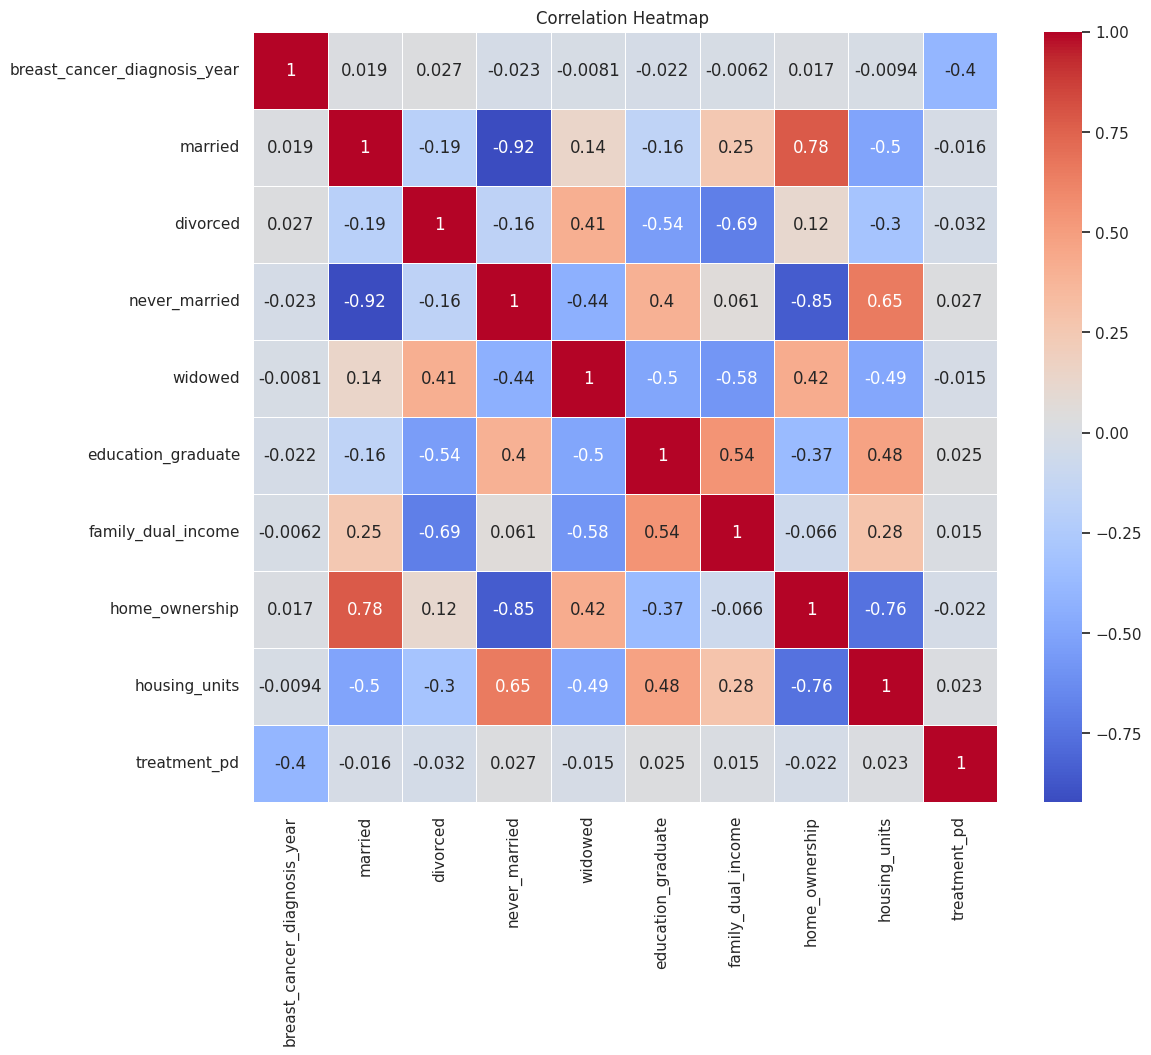

In [ ]:
numeric_columns2 = ['breast_cancer_diagnosis_year', 'married', 'divorced', 'never_married', 'widowed', 'education_graduate',
                    'family_dual_income', 'home_ownership', 'housing_units', 'treatment_pd']
correlation_matrix2 = df[numeric_columns2].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.show()

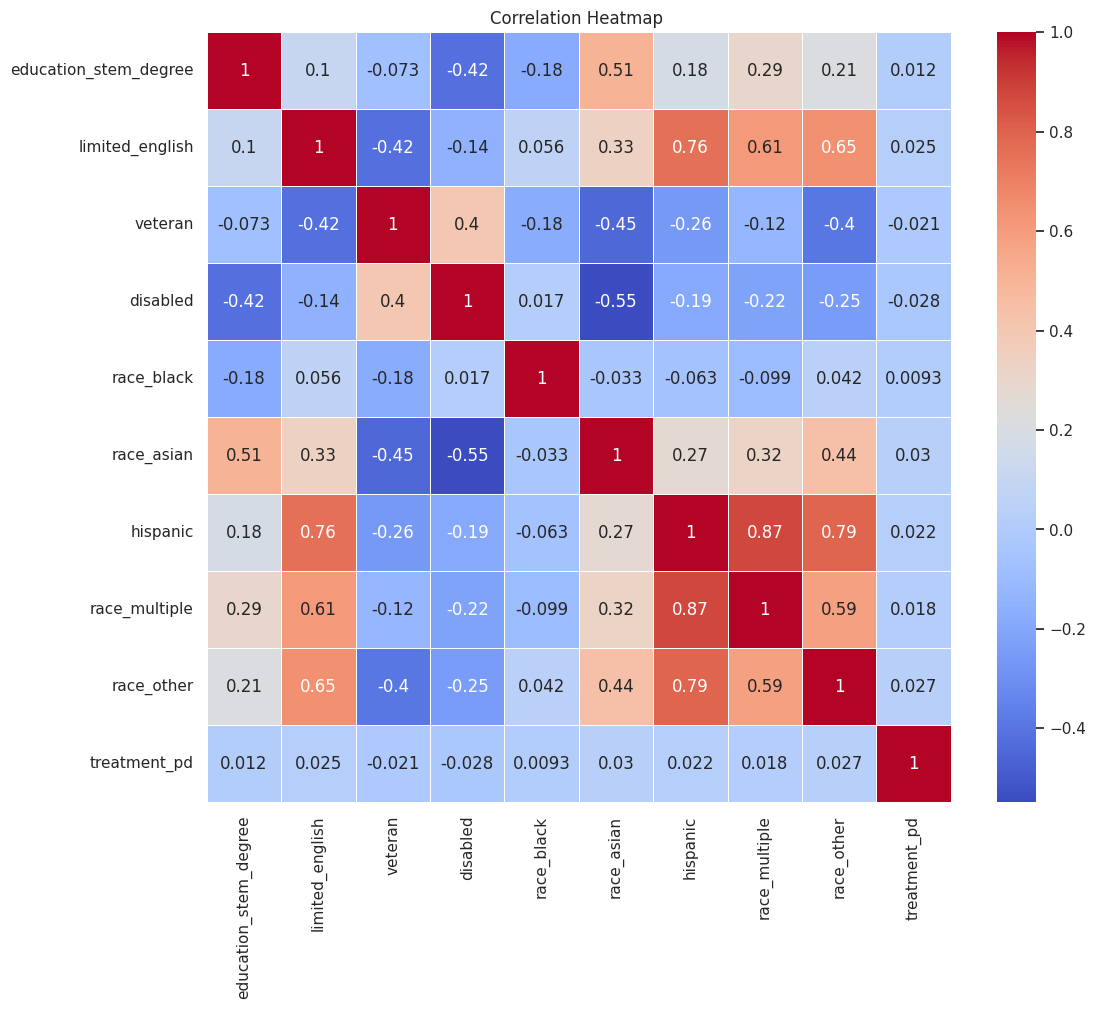

In [ ]:
numeric_columns3 = ['education_stem_degree', 'limited_english', 'veteran', 'disabled', 'race_black', 'race_asian',
                    'hispanic', 'race_multiple', 'race_other', 'treatment_pd']
correlation_matrix3 = df[numeric_columns3].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.show()

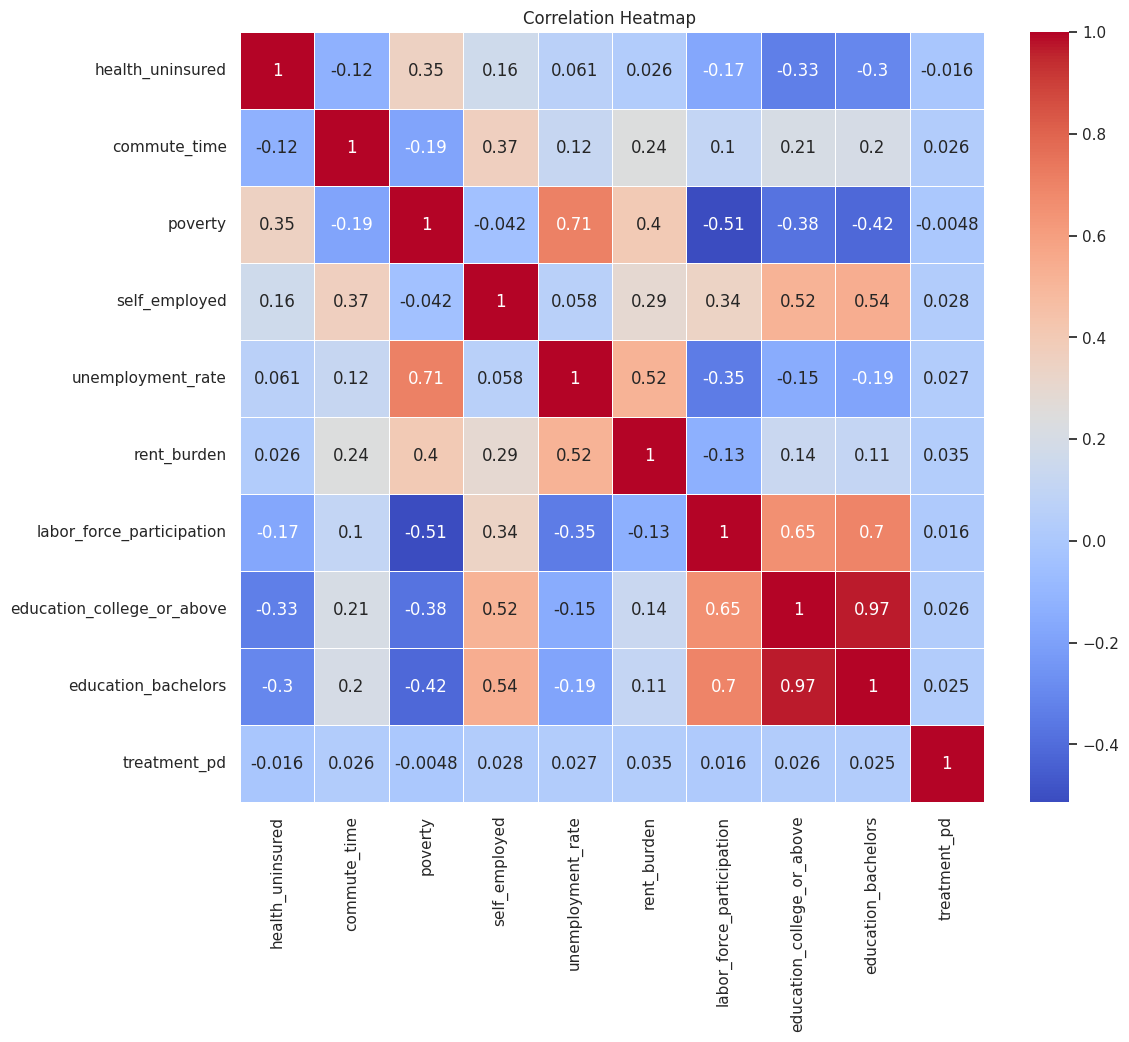

In [ ]:
numeric_columns4 = ['health_uninsured', 'commute_time', 'poverty', 'self_employed', 'unemployment_rate', 'rent_burden',
                    'labor_force_participation', 'education_college_or_above', 'education_bachelors', 'treatment_pd']
correlation_matrix4 = df[numeric_columns4].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.show()

## Analysis

##Q7 - Identifying the percentage of missing values in each attribute

In [ ]:
# Calculate and print the percentage of missing values for each attribute
print("Percentage of missing values in each attribute:")
count = 0
for column in df.columns:
    missing_percentage = (df[column].isnull().sum() / len(df)) * 100
    print(f"{column}: {missing_percentage:.2f}%" ,end='                                                         ')
    count += 1
    if count % 2 == 0:
        print() # Move to the next line after printing four attributes

Percentage of missing values in each attribute:
patient_id: 0.00%                                                         patient_race: 54.75%                                                         
payer_type: 10.25%                                                         patient_state: 0.29%                                                         
patient_zip3: 0.00%                                                         patient_age: 0.00%                                                         
patient_gender: 0.00%                                                         bmi: 68.39%                                                         
breast_cancer_diagnosis_code: 0.00%                                                         breast_cancer_diagnosis_desc: 0.00%                                                         
breast_cancer_diagnosis_year: 0.00%                                                         metastatic_cancer_diagnosis_code: 0.00%                                

##Q8 - Identifying the count of redundant instances.

In [ ]:
# Counting the number of duplicated instances in the DataFrame
duplicates = df.duplicated().sum()

print("Count of duplicated instances: ", duplicates)

Count of duplicated instances:  0


##Q9- Identifying the columns that have outliers

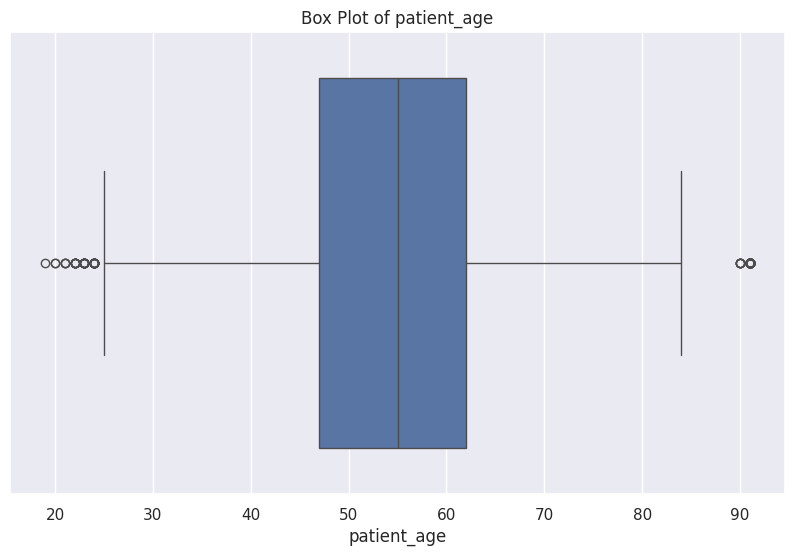

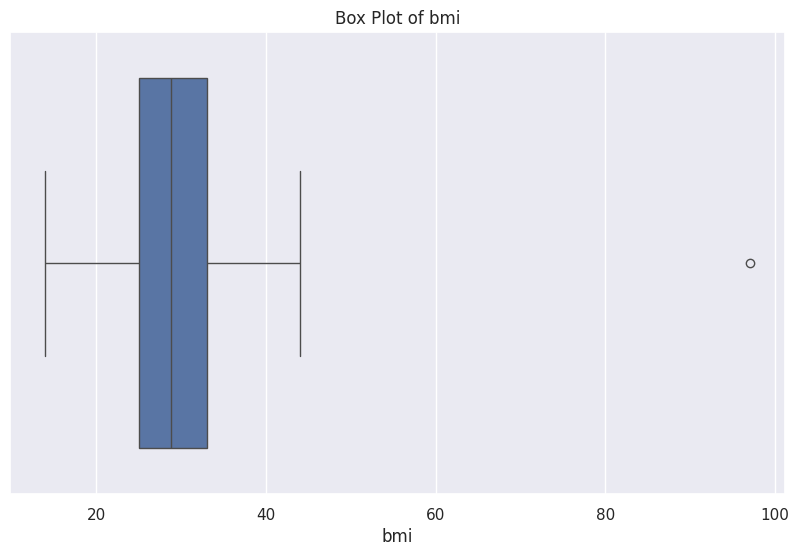

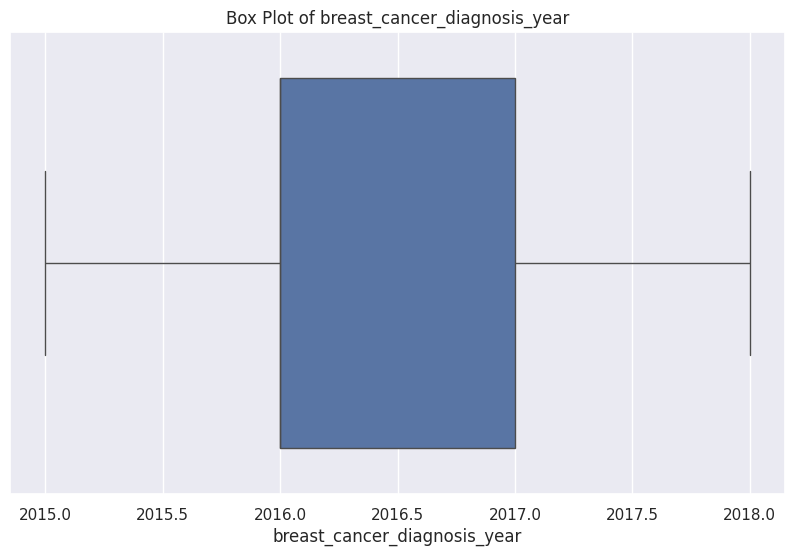

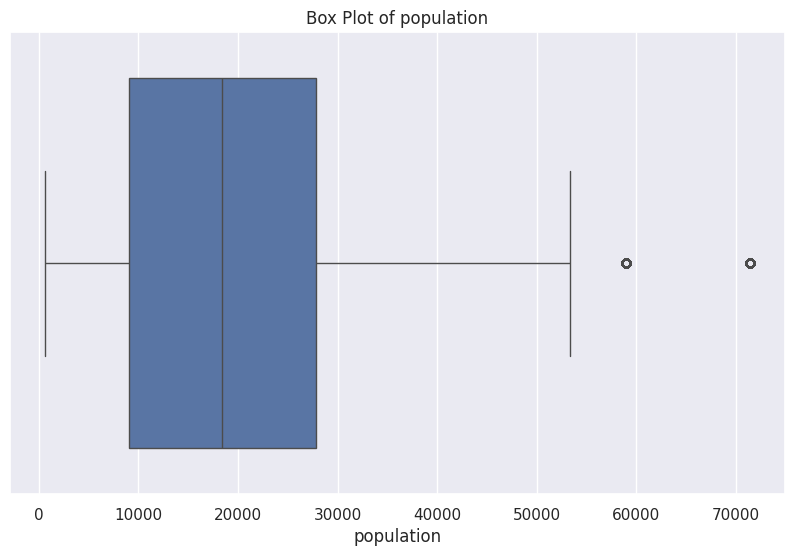

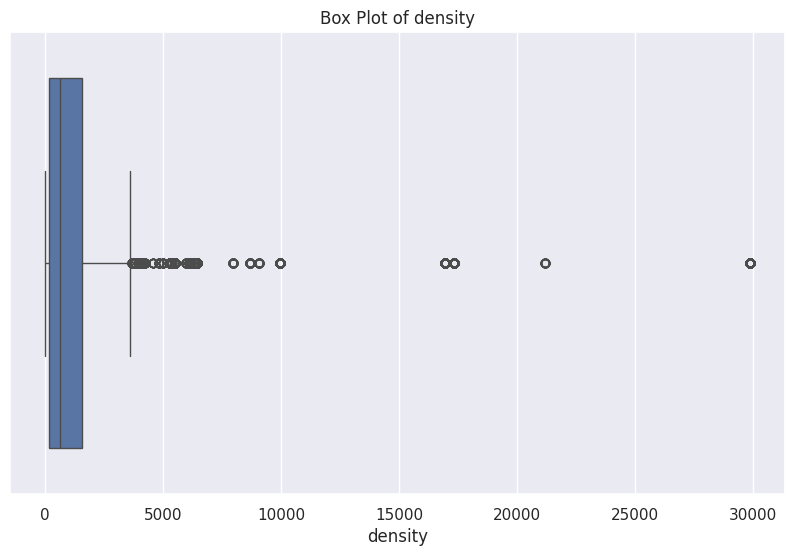

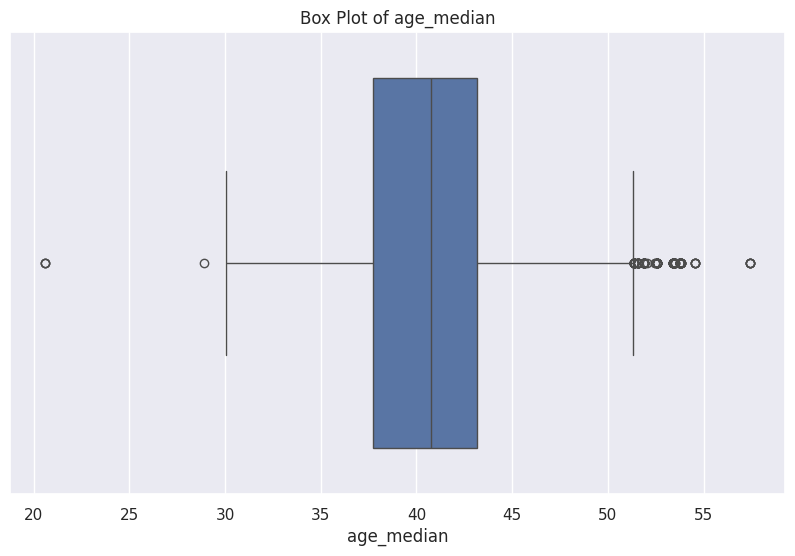

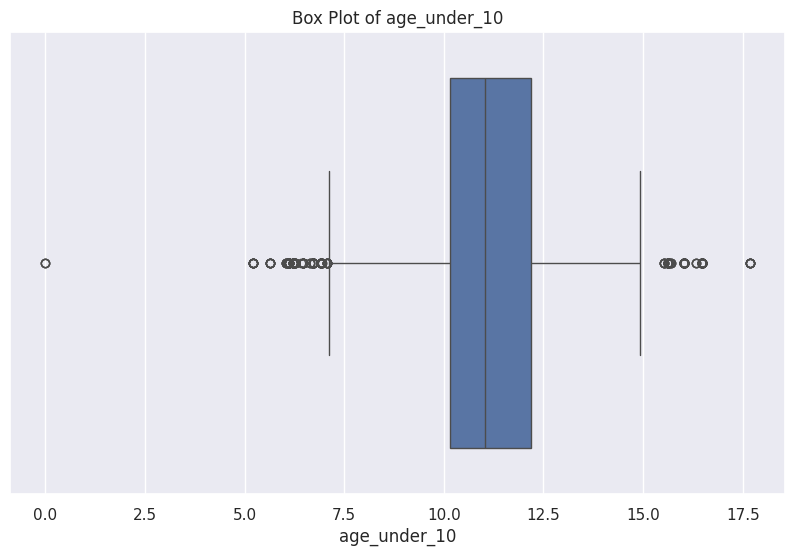

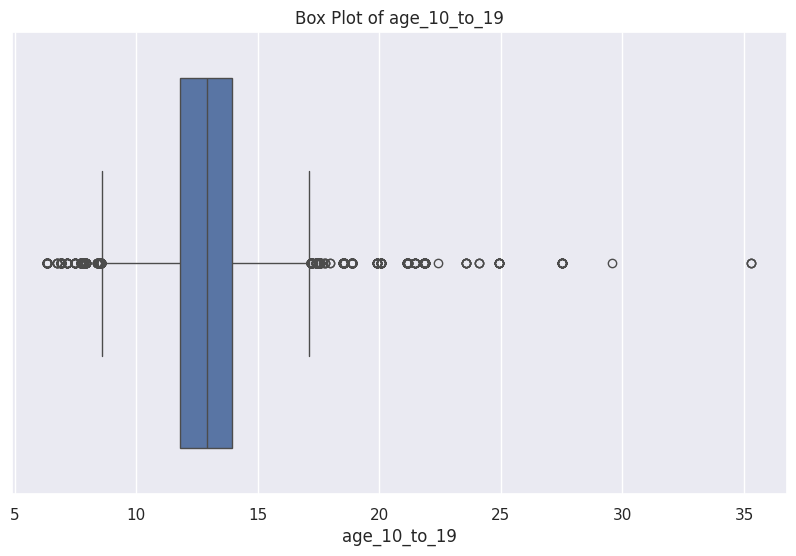

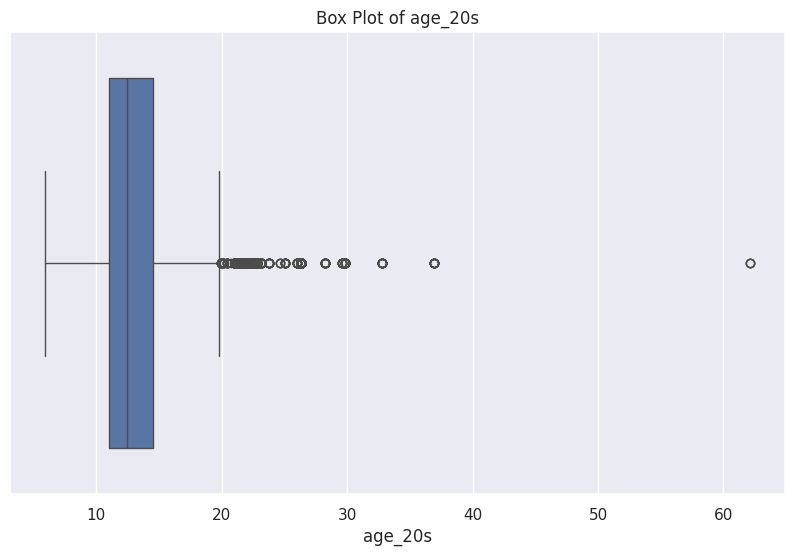

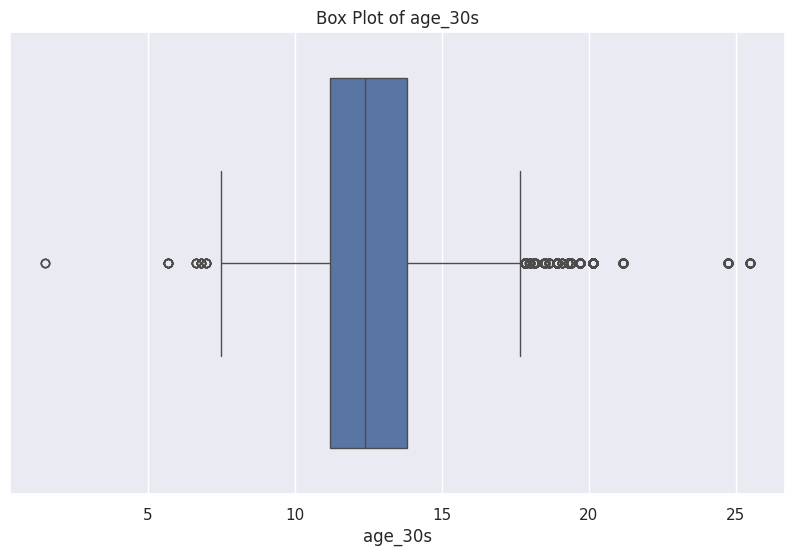

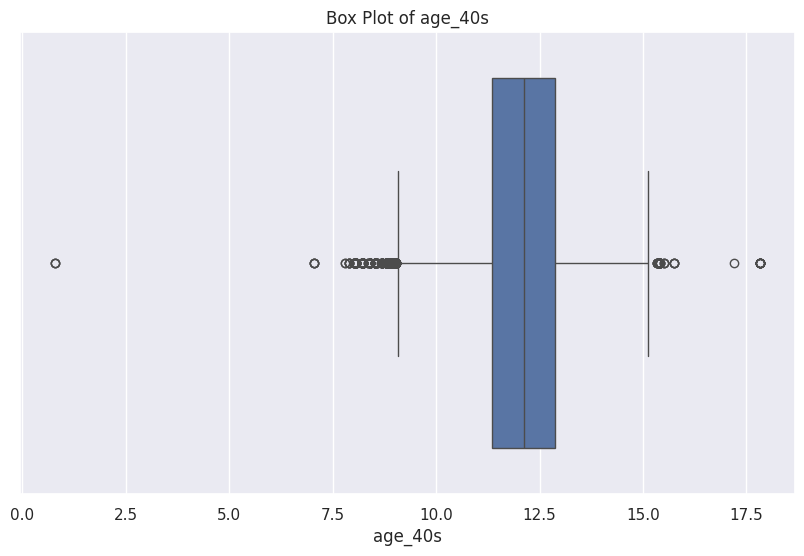

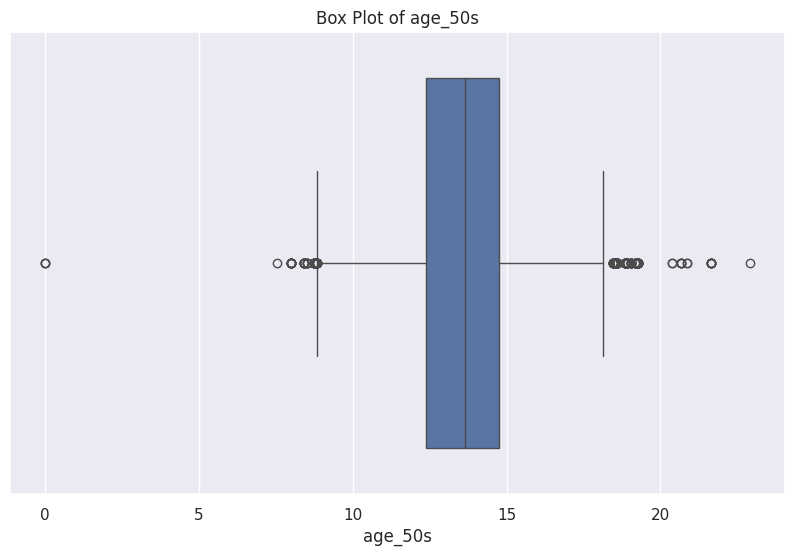

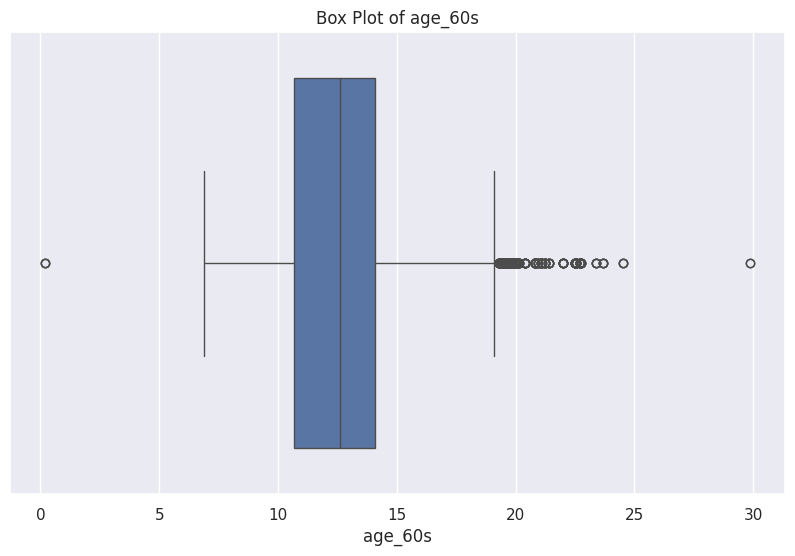

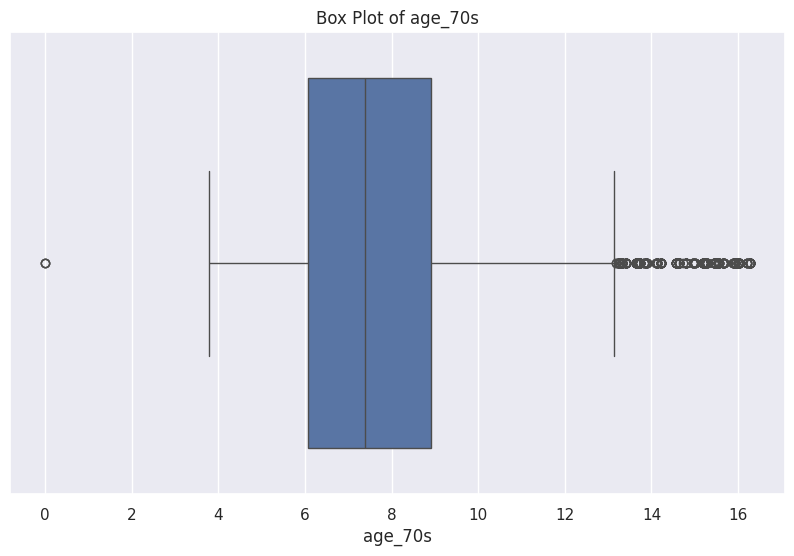

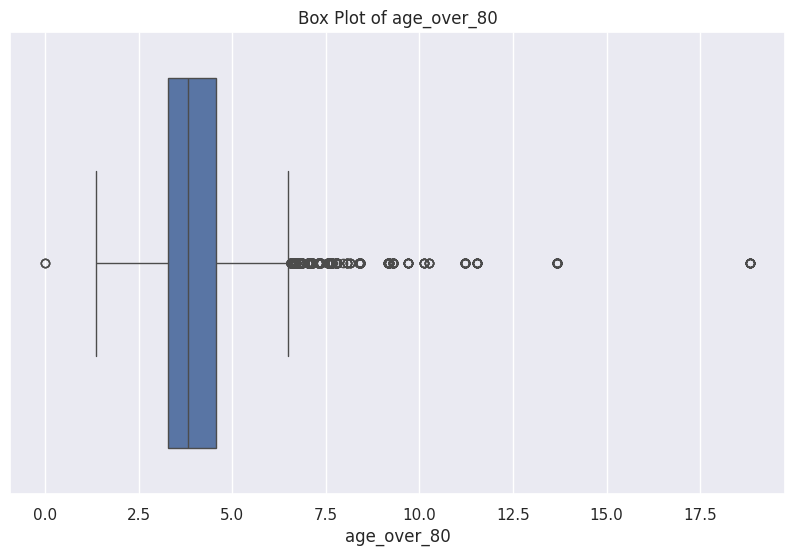

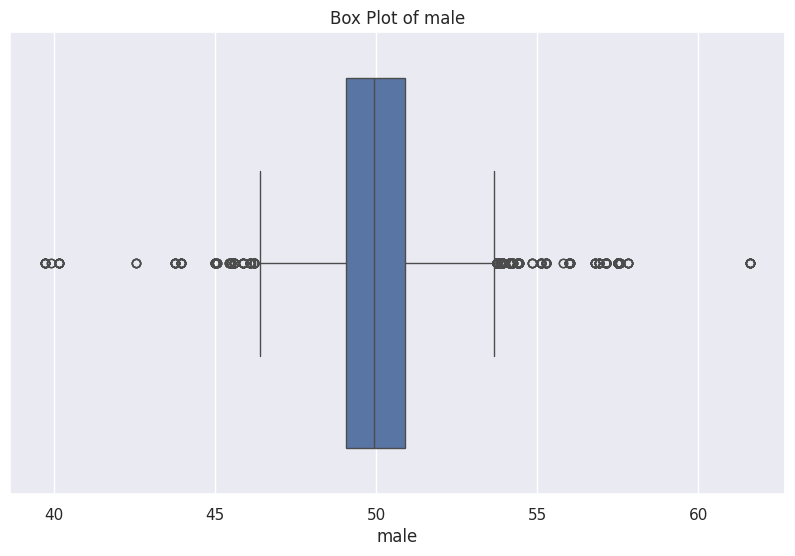

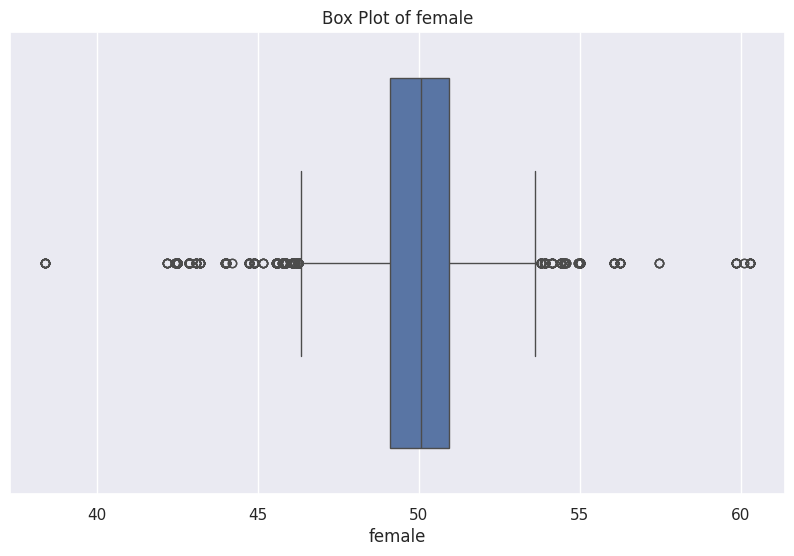

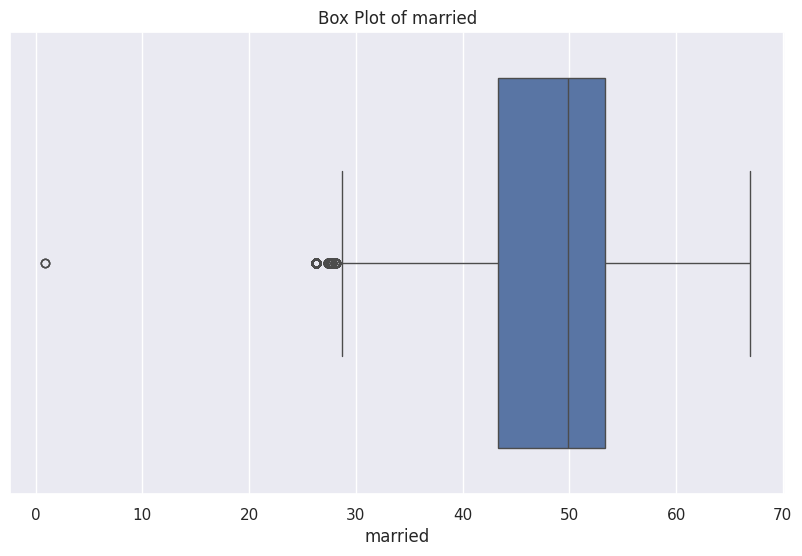

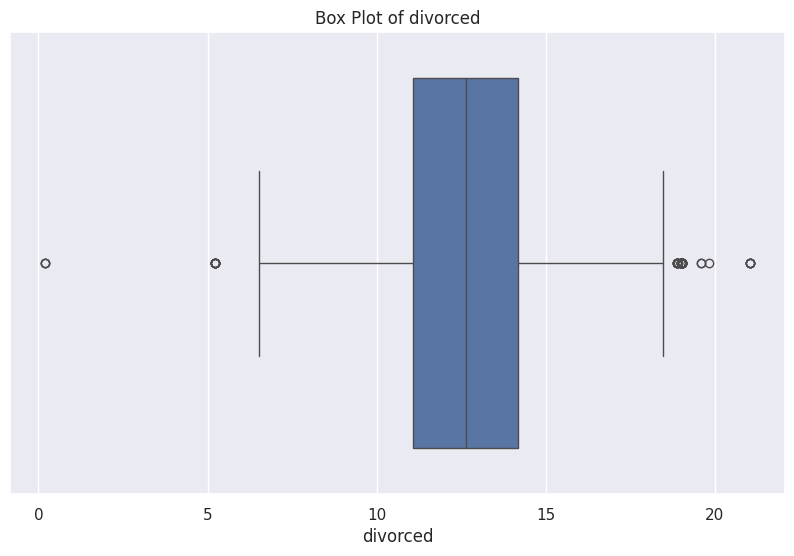

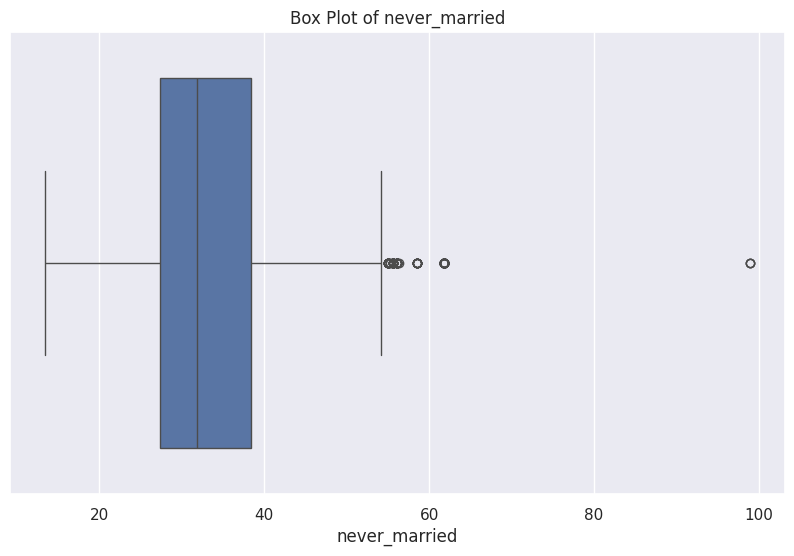

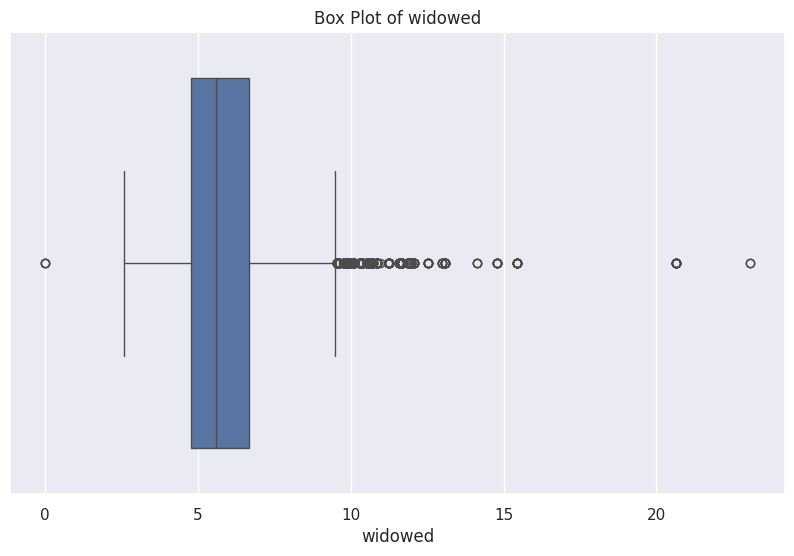

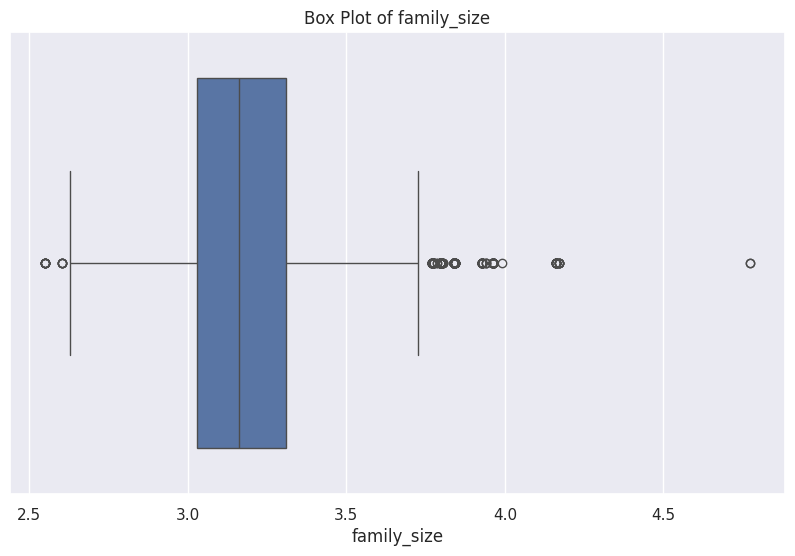

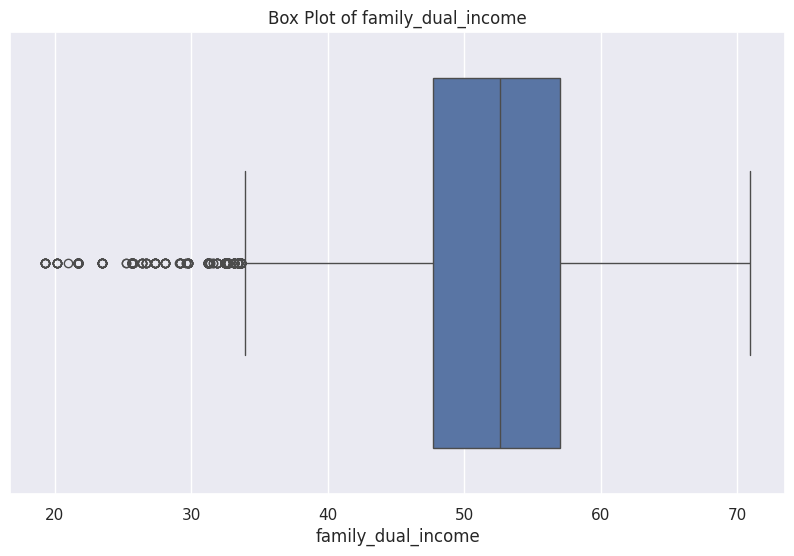

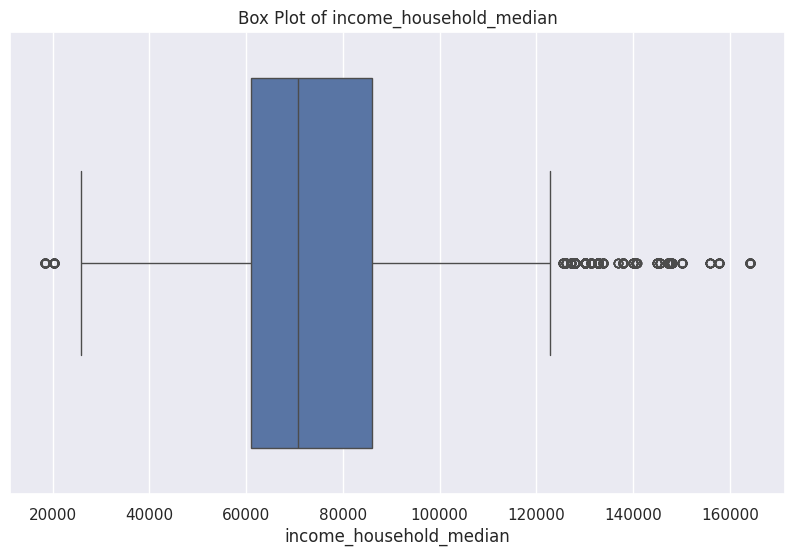

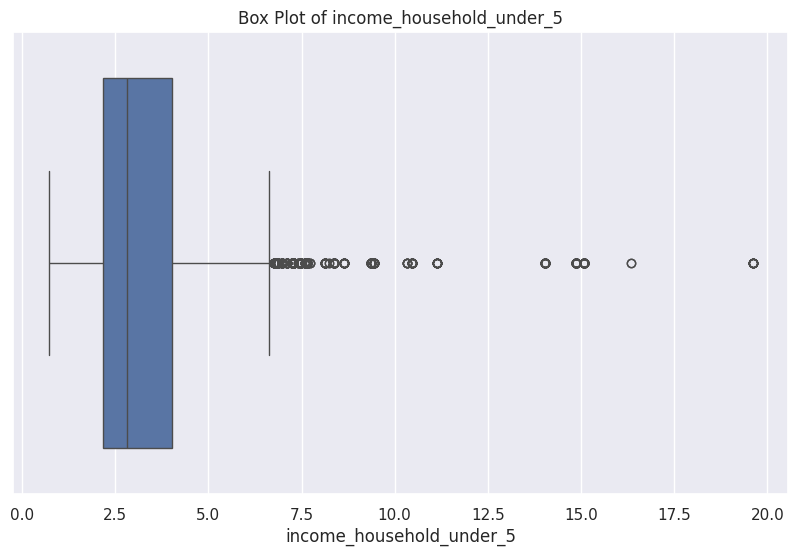

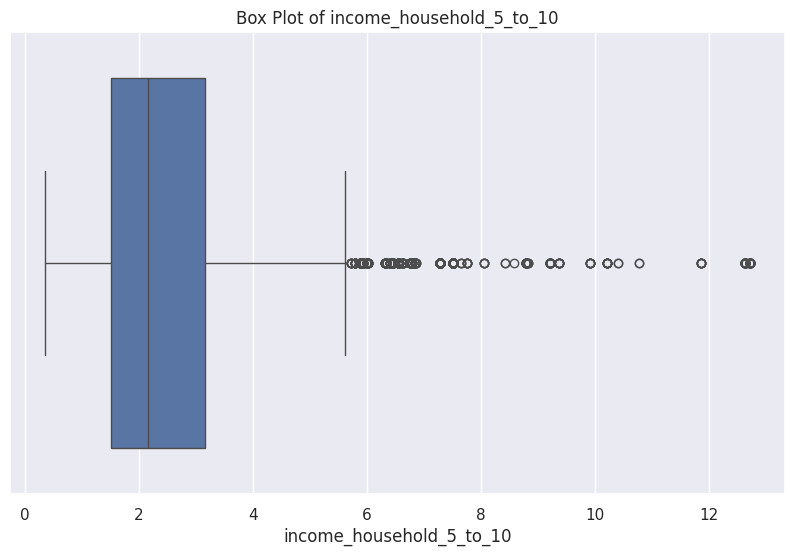

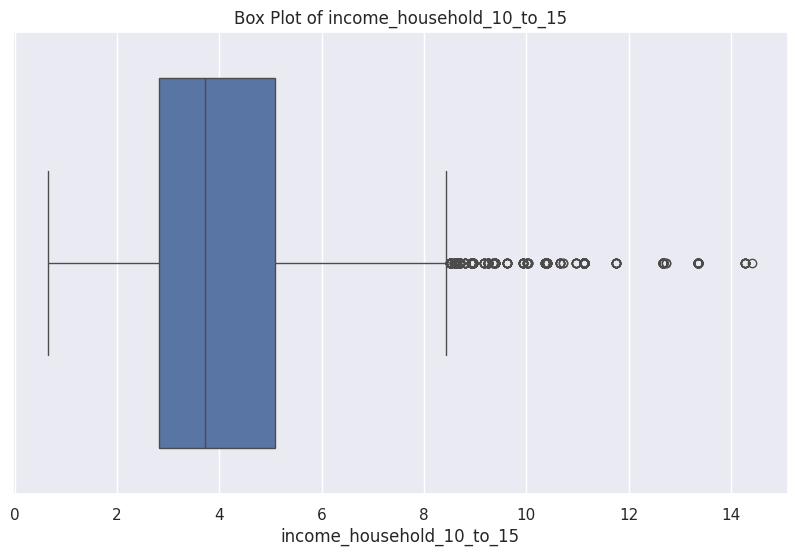

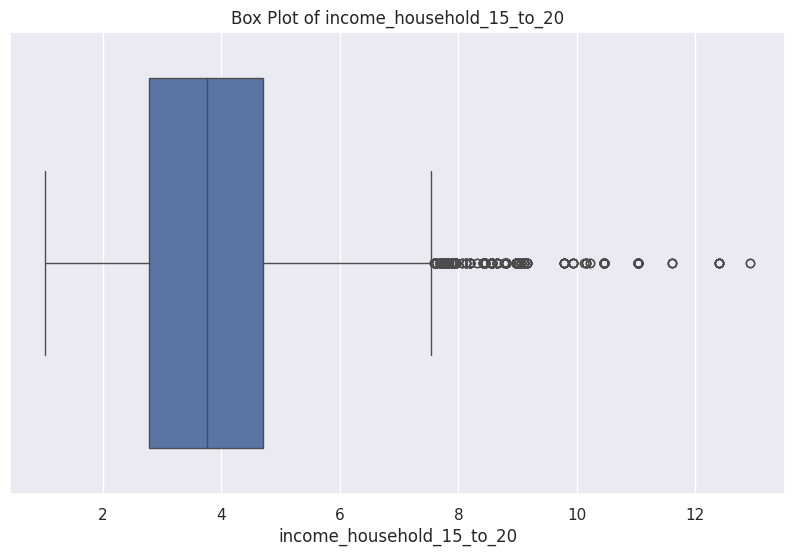

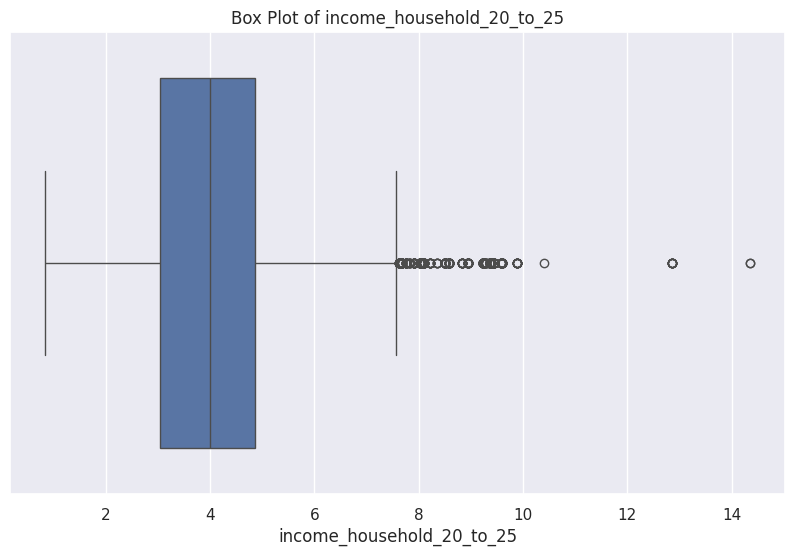

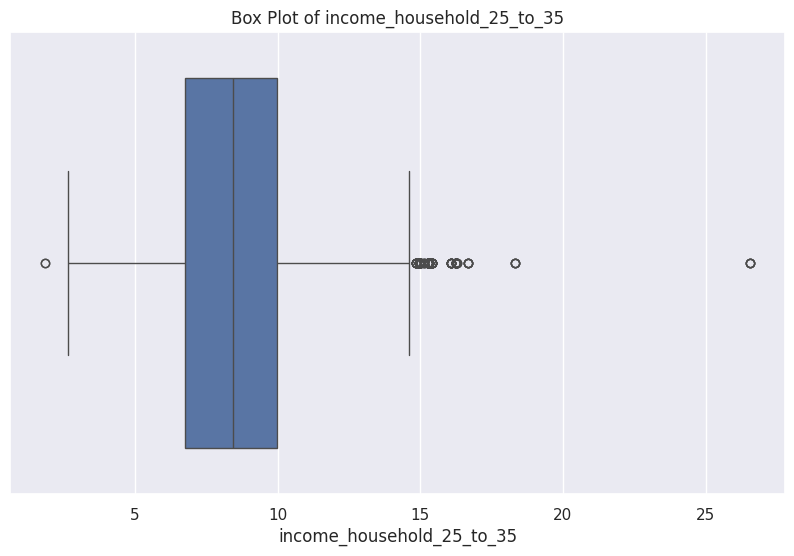

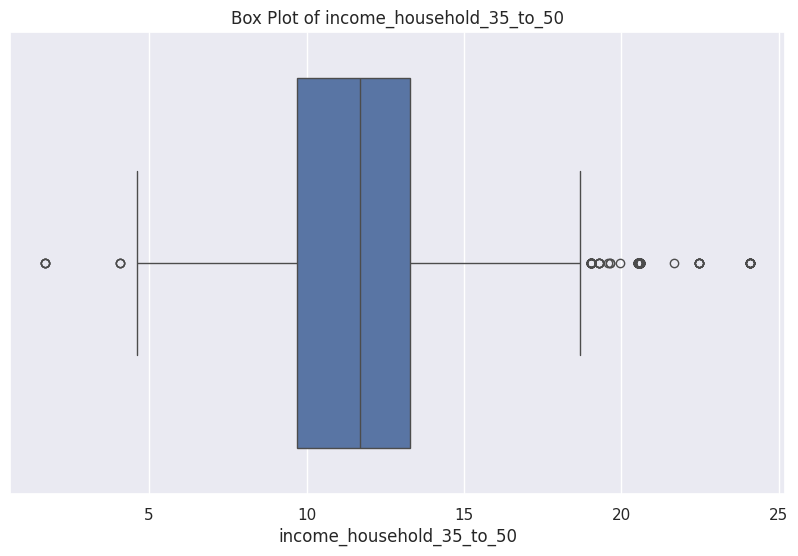

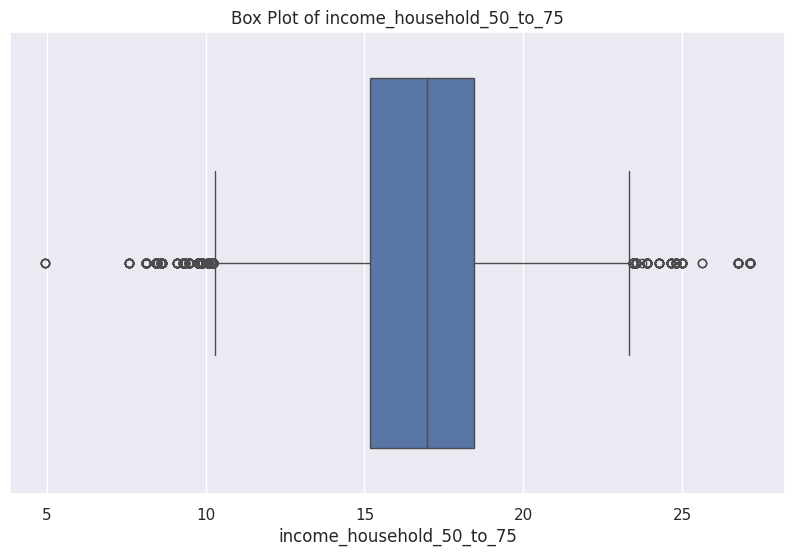

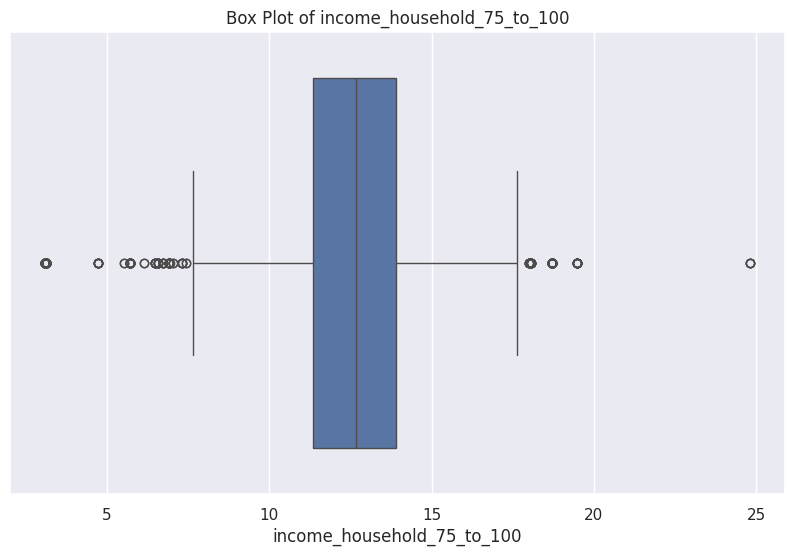

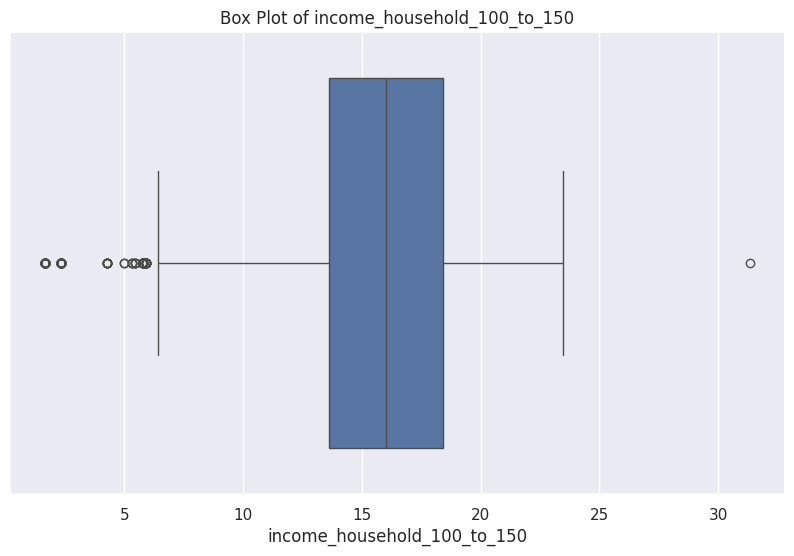

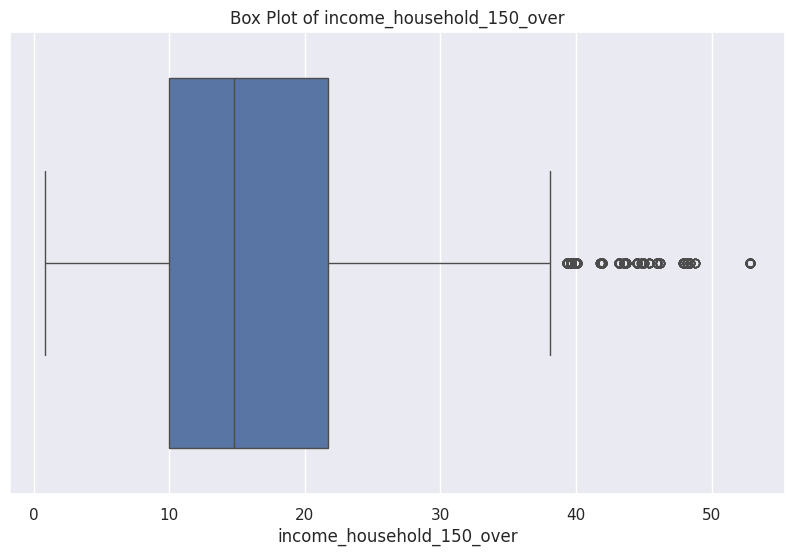

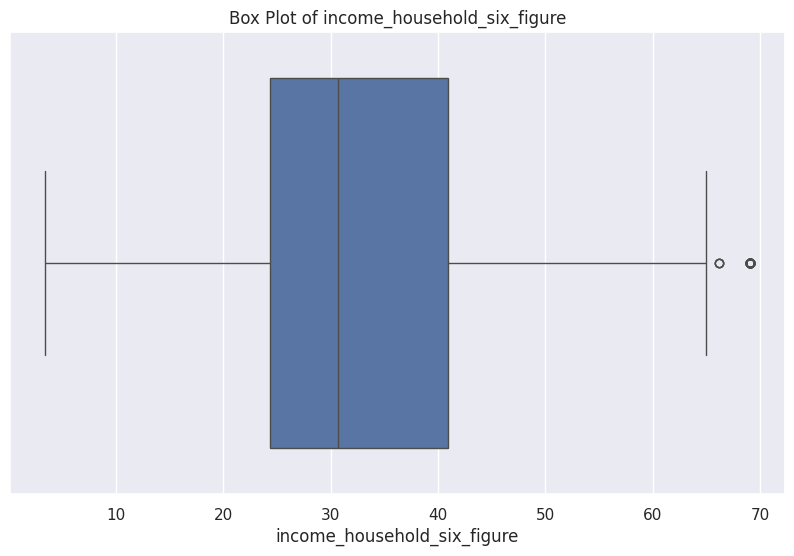

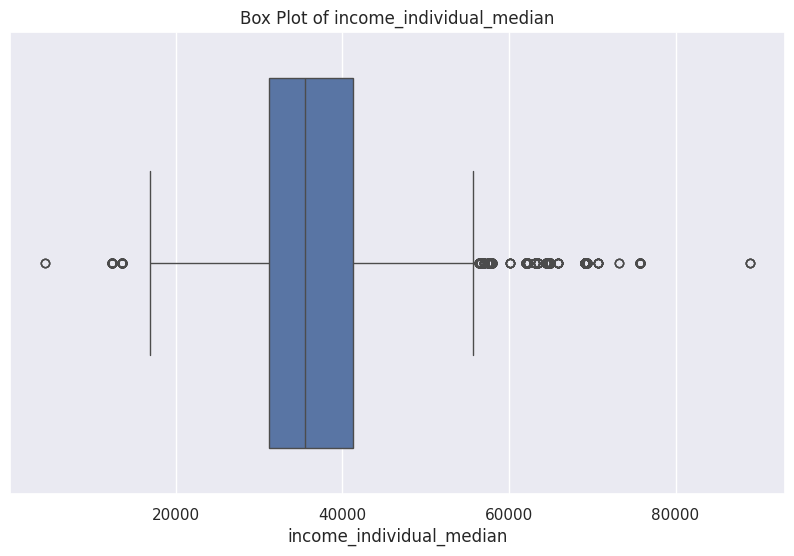

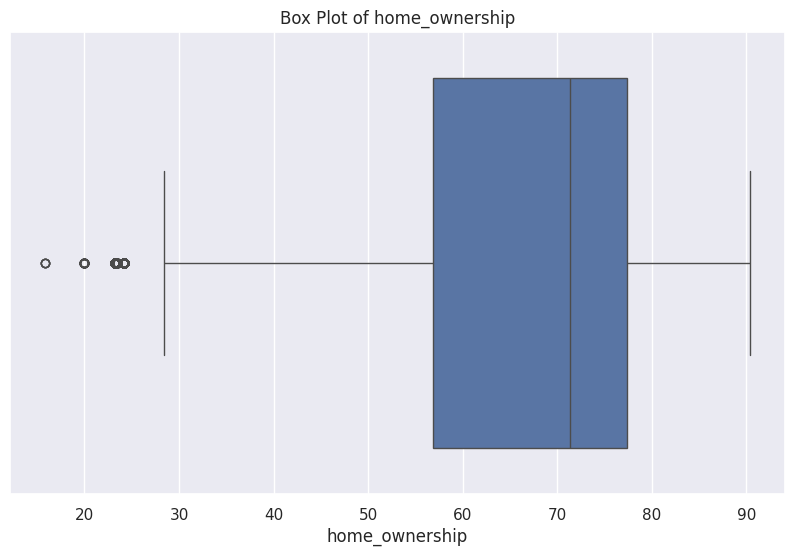

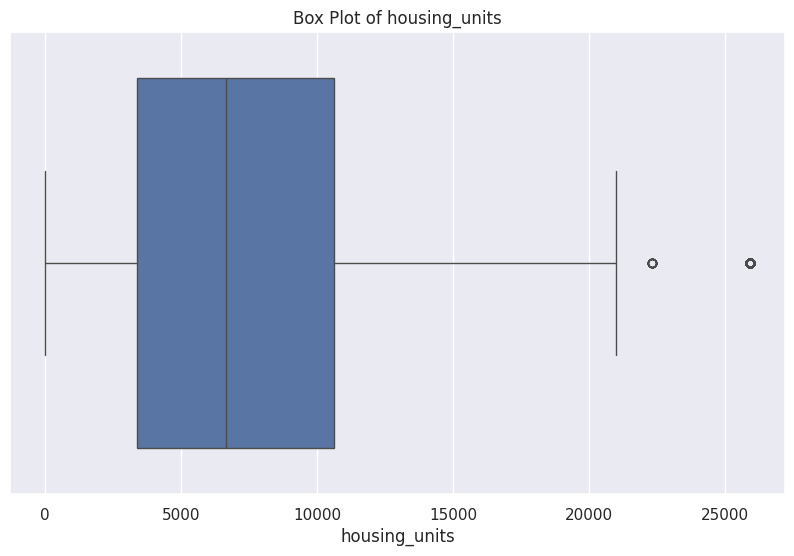

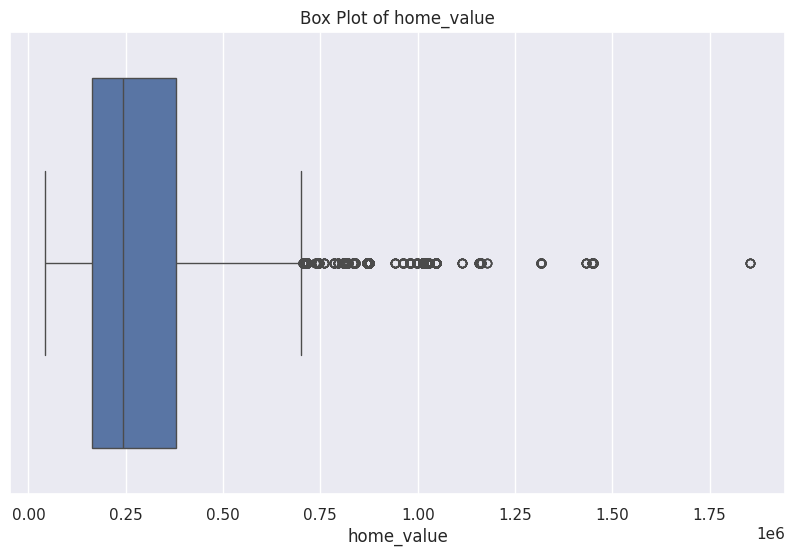

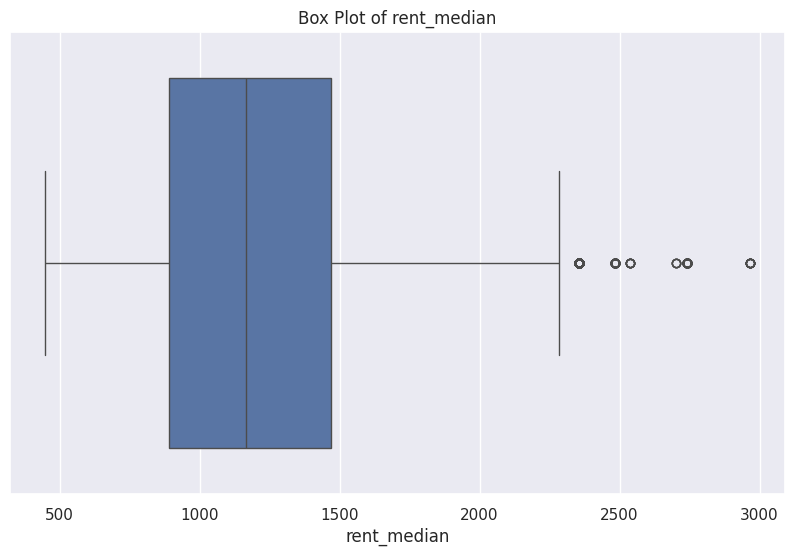

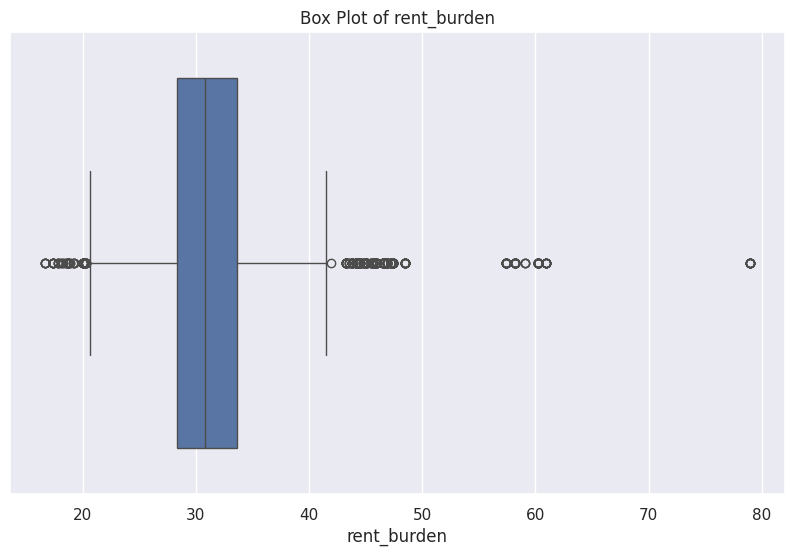

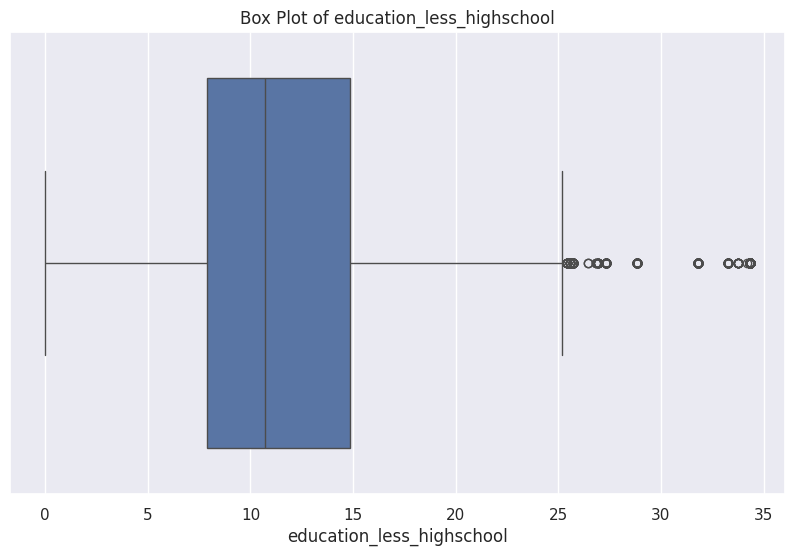

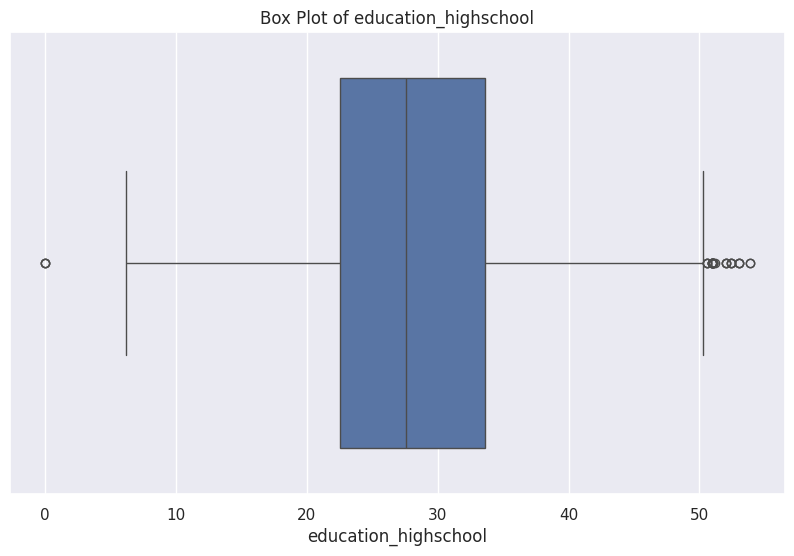

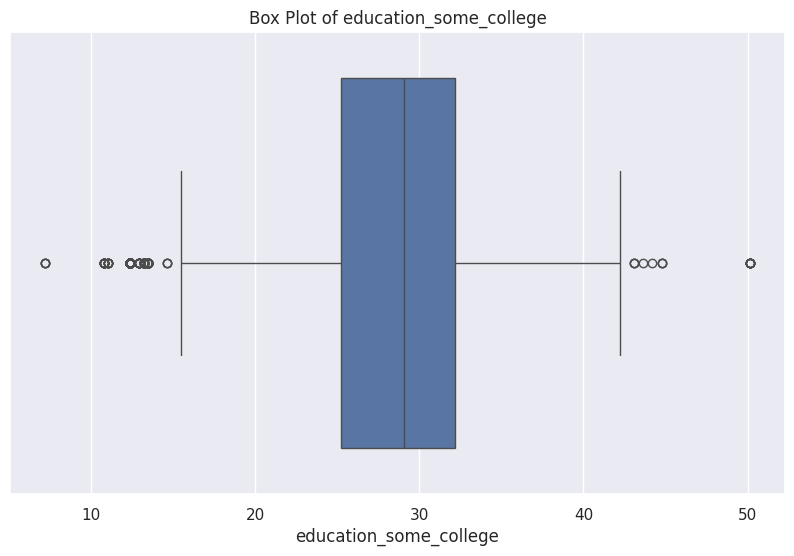

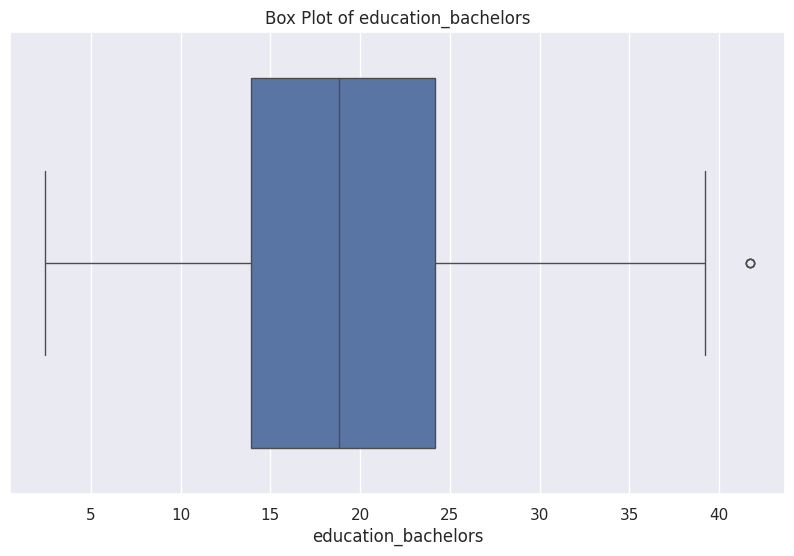

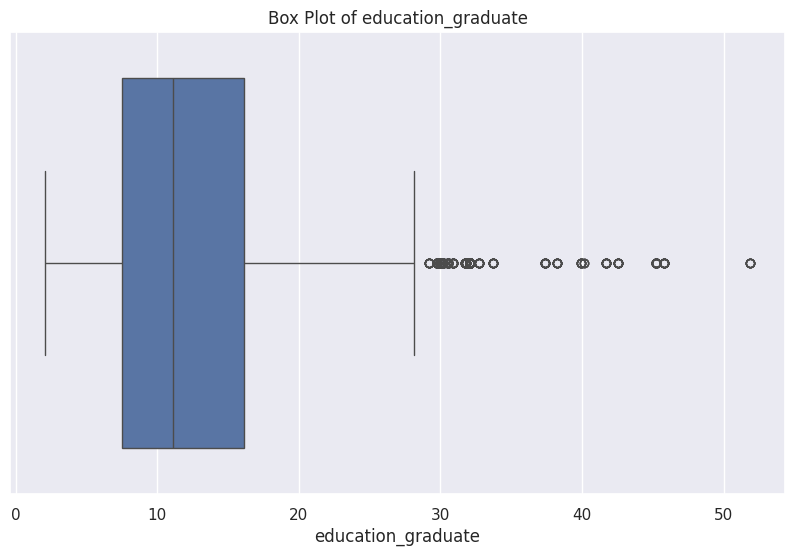

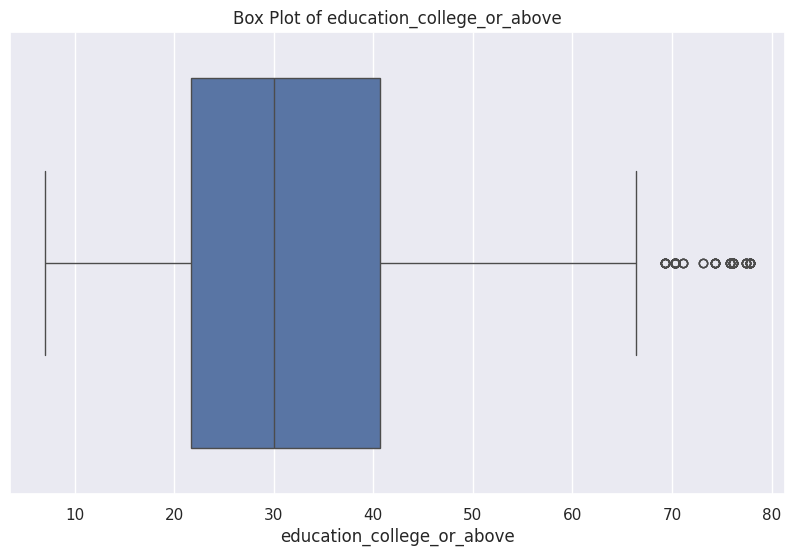

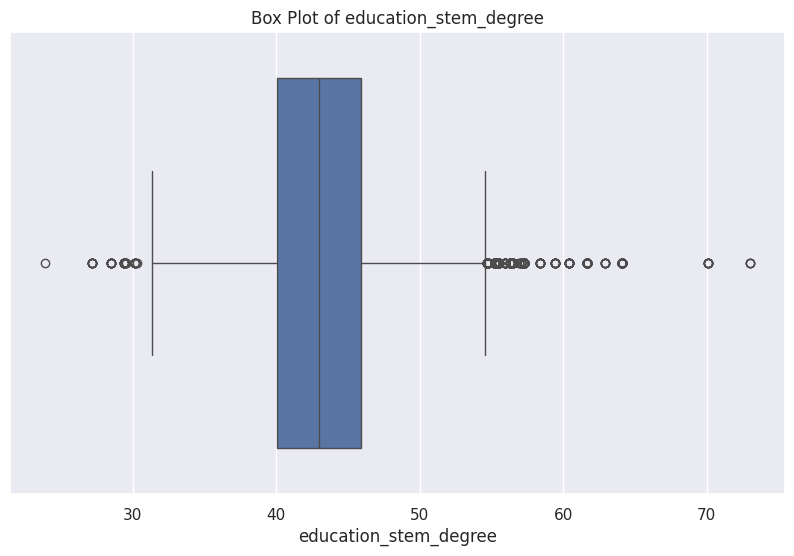

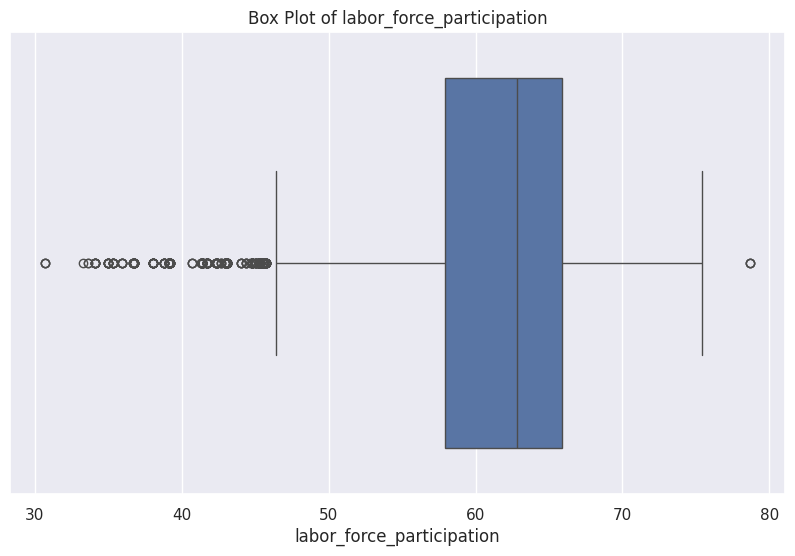

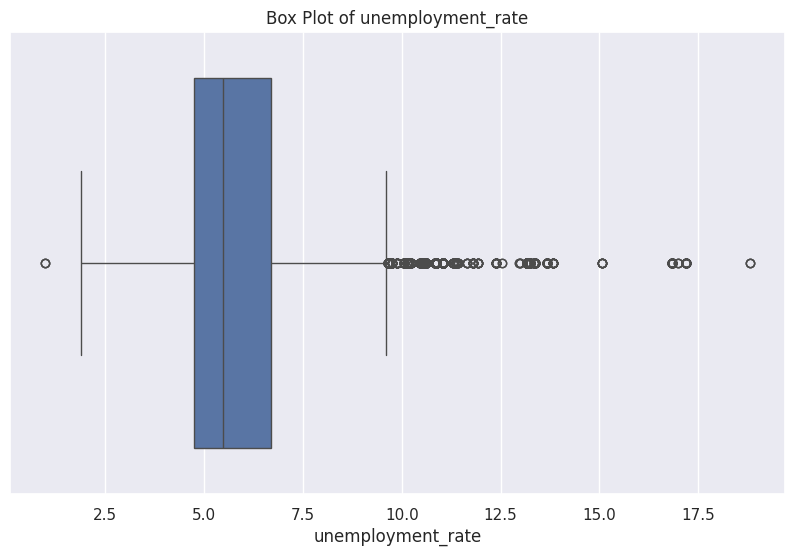

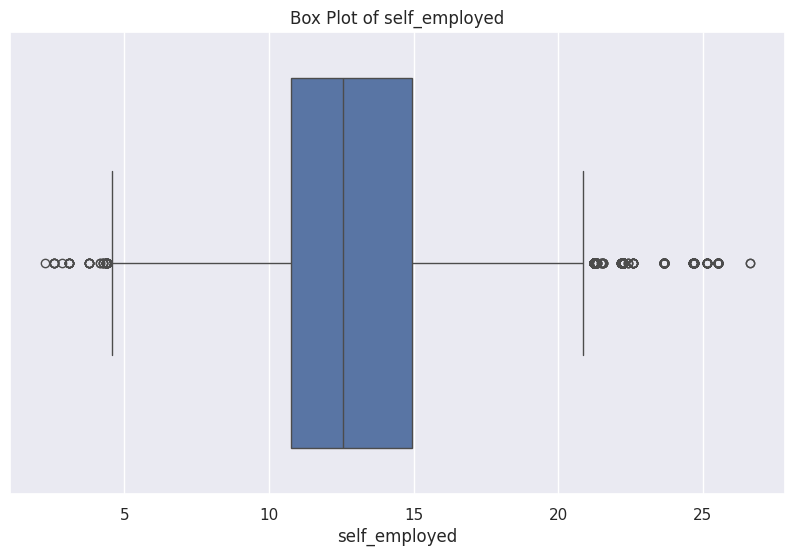

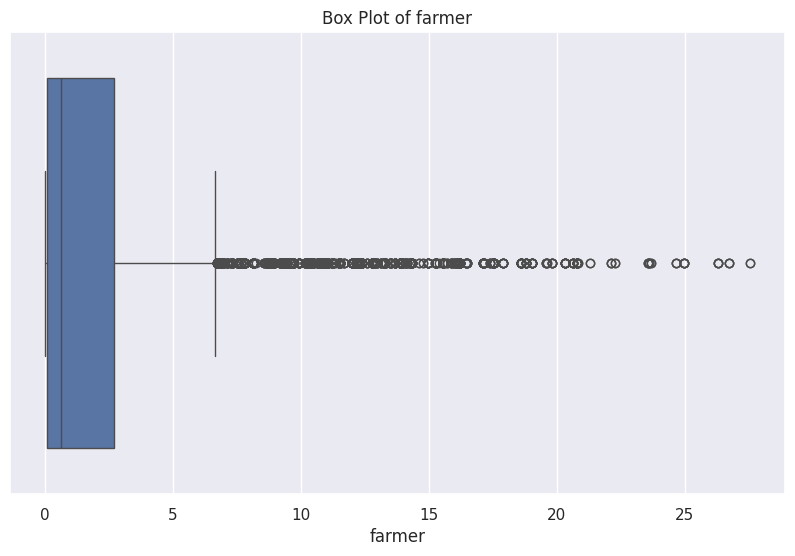

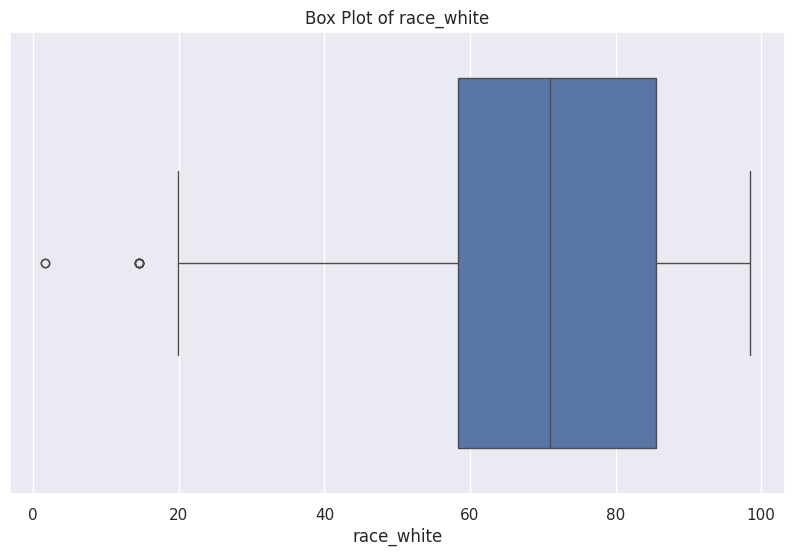

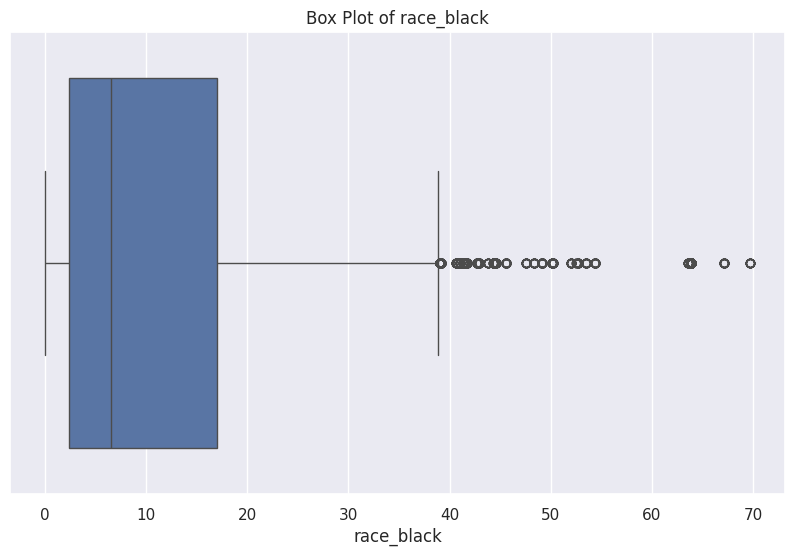

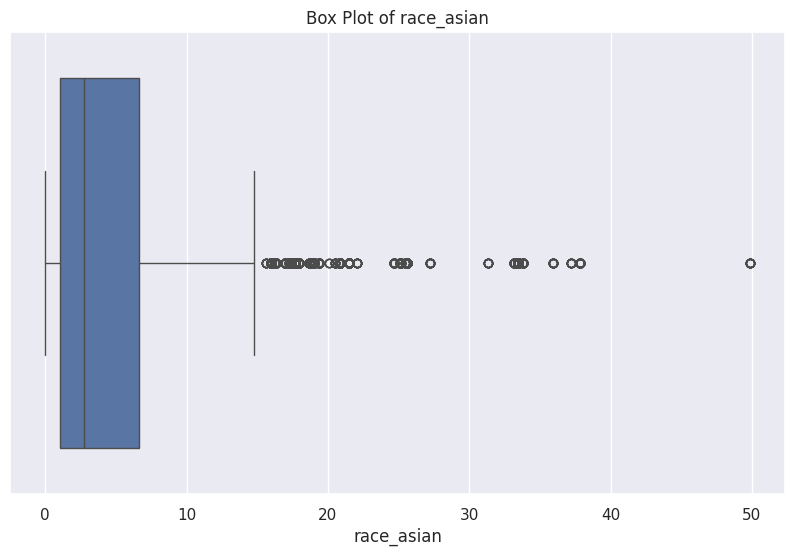

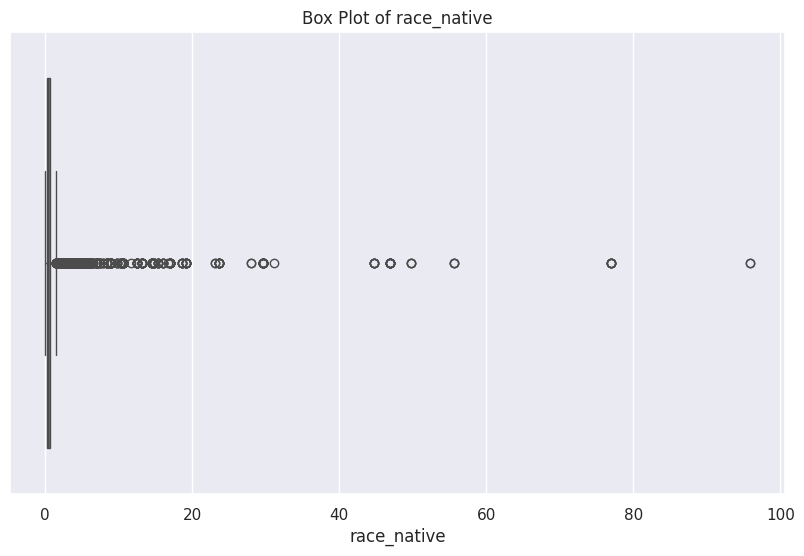

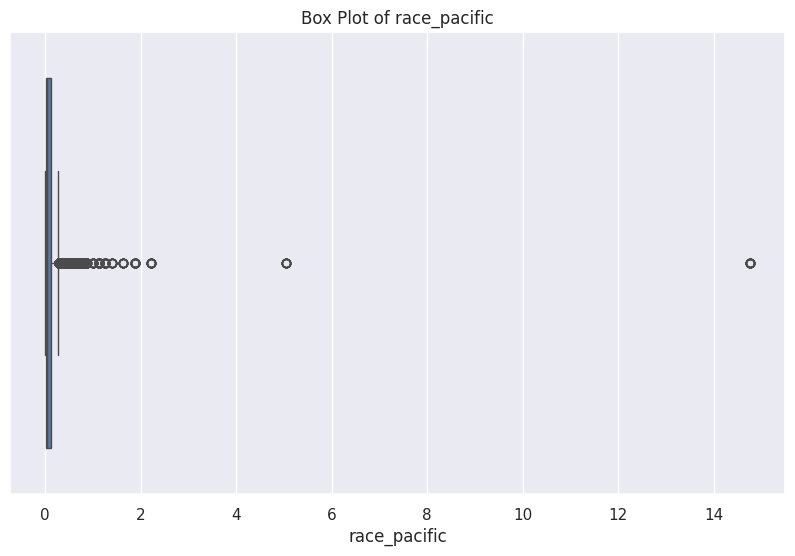

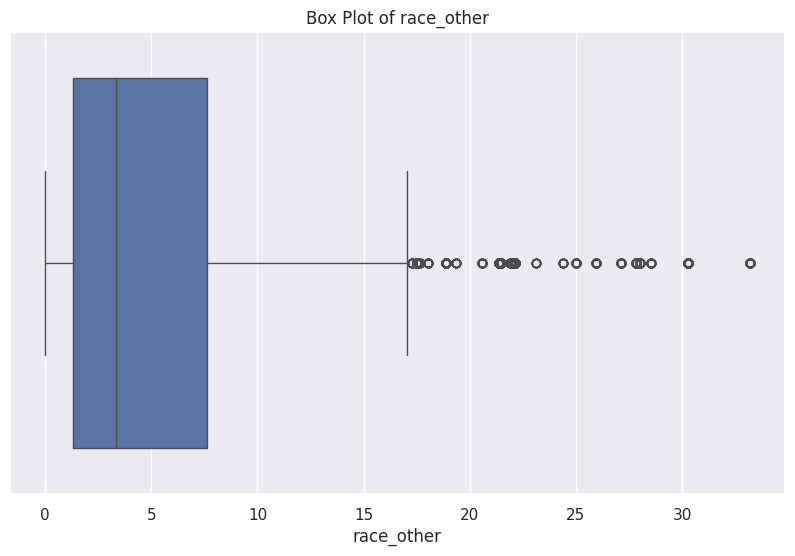

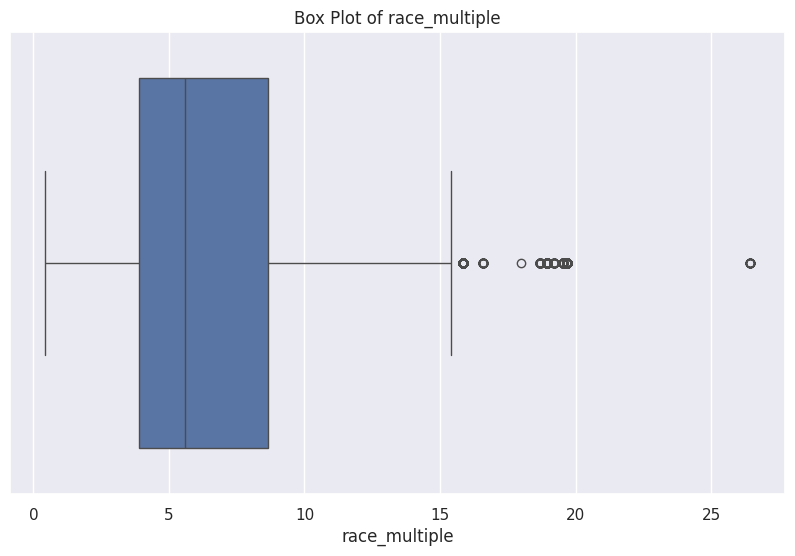

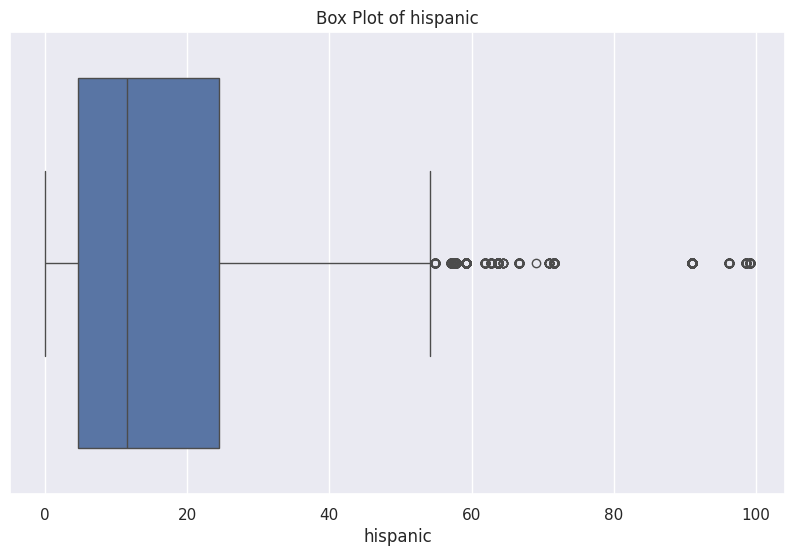

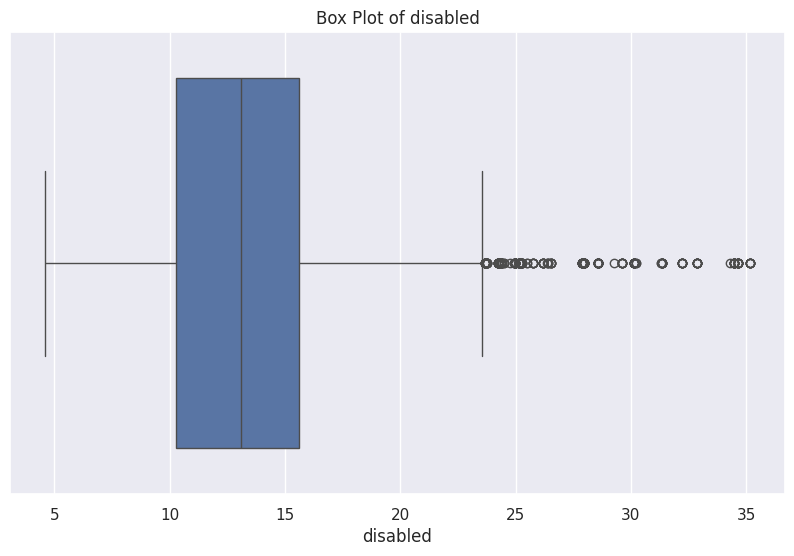

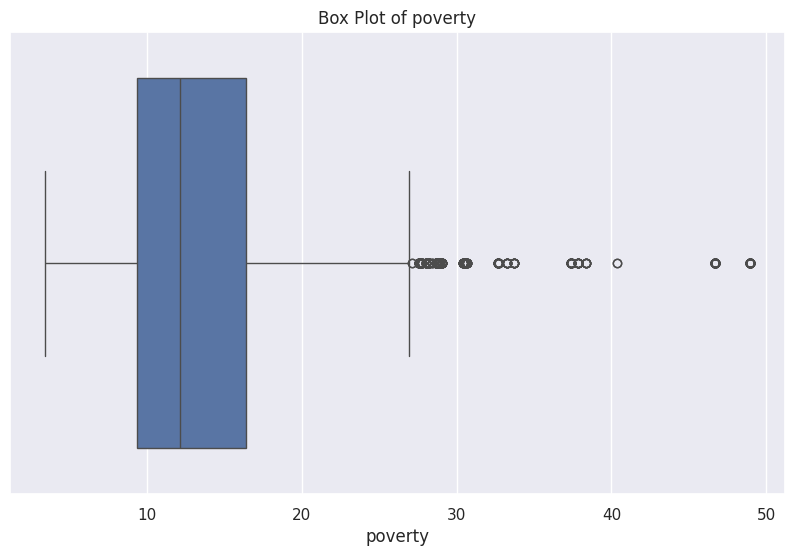

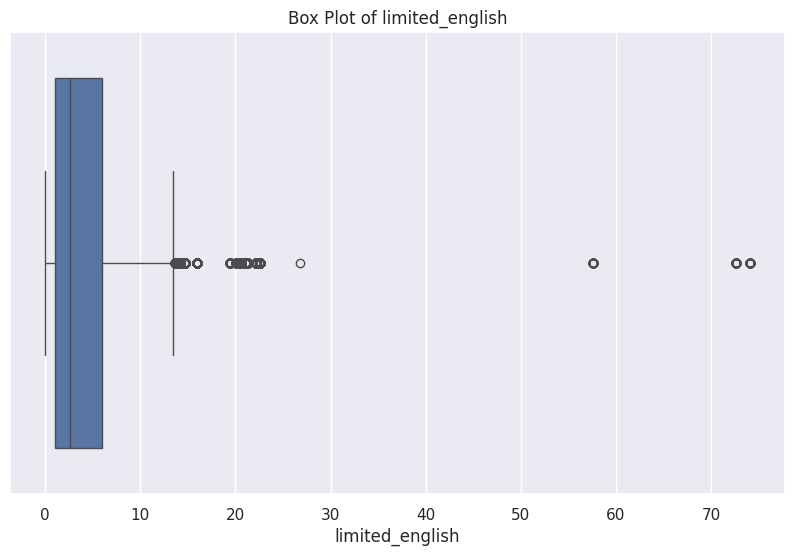

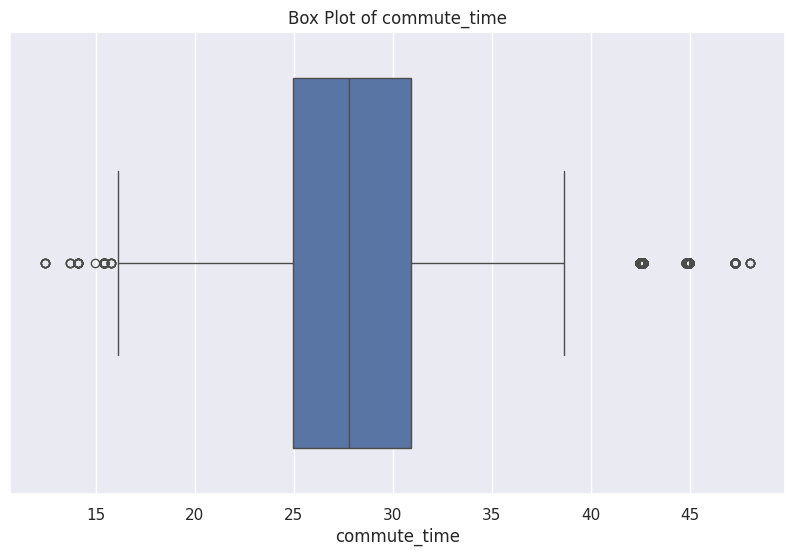

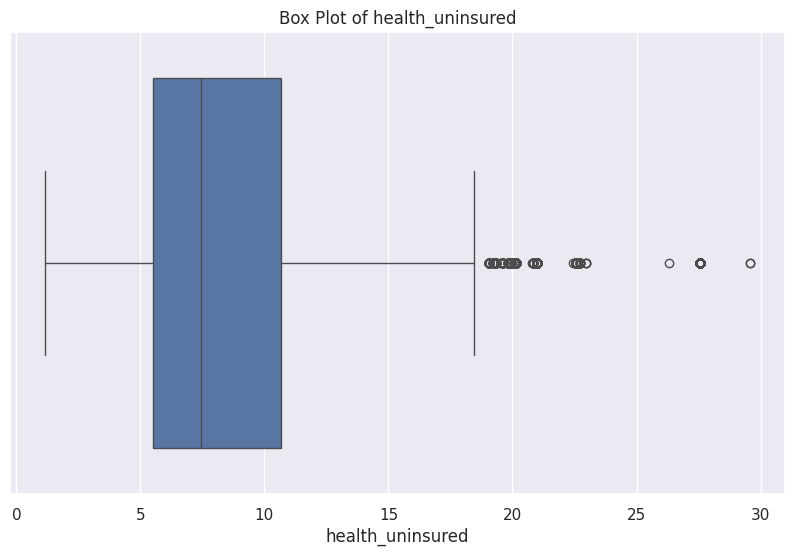

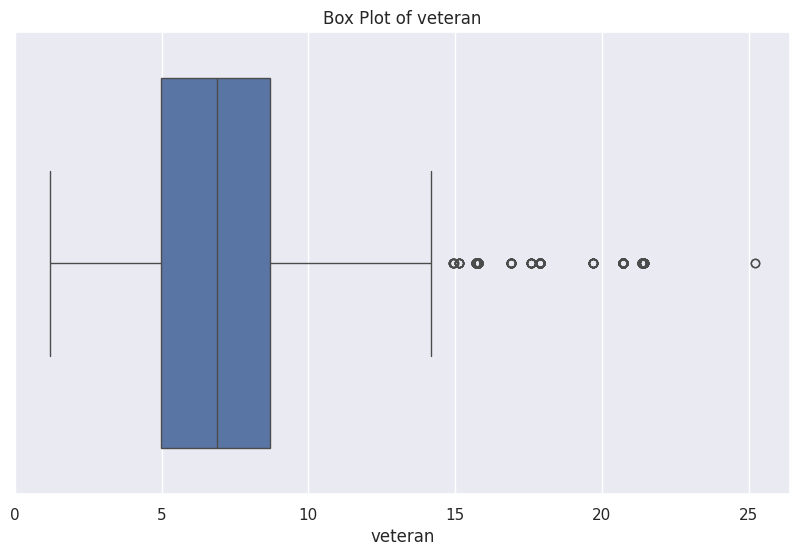

In [ ]:
quantitative_columns = [
    'patient_age', 'bmi', 'breast_cancer_diagnosis_year', 'population', 'density', 'age_median', 'age_under_10',
    'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male',
    'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income',
    'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15',
    'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50',
    'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over',
    'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value',
    'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college',
    'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree',
    'labor_force_participation', 'unemployment_rate', 'self_employed', 'farmer', 'race_white', 'race_black',
    'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled', 'poverty',
    'limited_english', 'commute_time', 'health_uninsured', 'veteran']

#By visualizing the columns, we get a better idea of the number of columns with outliers, in our case we have
for column in quantitative_columns: #using loops for efficiency

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=column)
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)
        plt.show()

# Processing

##Q10 - Handle missing values & redundant instances

In [ ]:
#We will drop columns with more than 50% missing values to maintain data integrity and analysis accuracy.

# Specify the columns to drop
columns_to_drop = ["metastatic_first_novel_treatment", "metastatic_first_novel_treatment_type", "patient_race", "bmi"]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Print the count of missing values for each column
print("Count of missing values per column:")
for column in df.columns:
    missing_values_count = df[column].isnull().sum()
    print(f"{column}: {missing_values_count}")

Count of missing values per column:
patient_id: 0
payer_type: 2836
patient_state: 79
patient_zip3: 0
patient_age: 0
patient_gender: 0
breast_cancer_diagnosis_code: 0
breast_cancer_diagnosis_desc: 0
breast_cancer_diagnosis_year: 0
metastatic_cancer_diagnosis_code: 0
metastatic_first_treatment: 0
metastatic_first_treatment_type: 11024
region: 223
division: 223
population: 0
density: 0
age_median: 0
age_under_10: 0
age_10_to_19: 0
age_20s: 0
age_30s: 0
age_40s: 0
age_50s: 0
age_60s: 0
age_70s: 0
age_over_80: 0
male: 0
female: 0
married: 0
divorced: 0
never_married: 0
widowed: 0
family_size: 3
family_dual_income: 3
income_household_median: 3
income_household_under_5: 3
income_household_5_to_10: 3
income_household_10_to_15: 3
income_household_15_to_20: 3
income_household_20_to_25: 3
income_household_25_to_35: 3
income_household_35_to_50: 3
income_household_50_to_75: 3
income_household_75_to_100: 3
income_household_100_to_150: 3
income_household_150_over: 3
income_household_six_figure: 3
inc

In [ ]:
# Print only the columns with missing values
print("Columns with missing values:")
for column in df.columns:
    missing_values_count = df[column].isnull().sum()
    if missing_values_count > 0:
        print(f"{column}: {missing_values_count:.2f}")

Columns with missing values:
payer_type: 2836.00
patient_state: 79.00
metastatic_first_treatment_type: 11024.00
region: 223.00
division: 223.00
family_size: 3.00
family_dual_income: 3.00
income_household_median: 3.00
income_household_under_5: 3.00
income_household_5_to_10: 3.00
income_household_10_to_15: 3.00
income_household_15_to_20: 3.00
income_household_20_to_25: 3.00
income_household_25_to_35: 3.00
income_household_35_to_50: 3.00
income_household_50_to_75: 3.00
income_household_75_to_100: 3.00
income_household_100_to_150: 3.00
income_household_150_over: 3.00
income_household_six_figure: 3.00
home_ownership: 3.00
home_value: 3.00
rent_median: 3.00
rent_burden: 3.00
self_employed: 2192.00
farmer: 2192.00
poverty: 3.00
limited_english: 3.00


In [ ]:
quantitative_attributes = df.select_dtypes(include=['int64', 'float64']).columns
qualitative_attributes = df.select_dtypes(include=['object']).columns


for col in quantitative_attributes:
    df[col].fillna(df[col].mean(), inplace=True)
for col in qualitative_attributes:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Display the updated DataFrame
for column in df.columns:
    missing_values_count = df[column].isnull().sum()
    print(f"{column}: {missing_values_count}")

patient_id: 0
payer_type: 0
patient_state: 0
patient_zip3: 0
patient_age: 0
patient_gender: 0
breast_cancer_diagnosis_code: 0
breast_cancer_diagnosis_desc: 0
breast_cancer_diagnosis_year: 0
metastatic_cancer_diagnosis_code: 0
metastatic_first_treatment: 0
metastatic_first_treatment_type: 0
region: 0
division: 0
population: 0
density: 0
age_median: 0
age_under_10: 0
age_10_to_19: 0
age_20s: 0
age_30s: 0
age_40s: 0
age_50s: 0
age_60s: 0
age_70s: 0
age_over_80: 0
male: 0
female: 0
married: 0
divorced: 0
never_married: 0
widowed: 0
family_size: 0
family_dual_income: 0
income_household_median: 0
income_household_under_5: 0
income_household_5_to_10: 0
income_household_10_to_15: 0
income_household_15_to_20: 0
income_household_20_to_25: 0
income_household_25_to_35: 0
income_household_35_to_50: 0
income_household_50_to_75: 0
income_household_75_to_100: 0
income_household_100_to_150: 0
income_household_150_over: 0
income_household_six_figure: 0
income_individual_median: 0
home_ownership: 0
housi

In [ ]:
# Print only the columns with missing values
print("Columns with missing values:")
count = 0
for column in df.columns:
    missing_values_count = df[column].isnull().sum()
    if missing_values_count > 0:
        count += 1
        print(f"{column}: {missing_values_count:.2f}")
print(count)

Columns with missing values:
0


##Q11 - Handle outliers

(27674, 79)


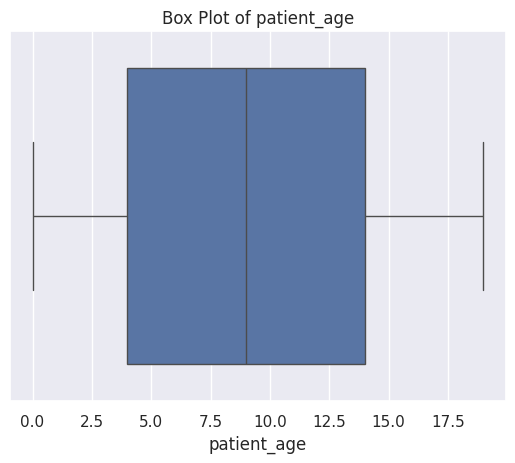

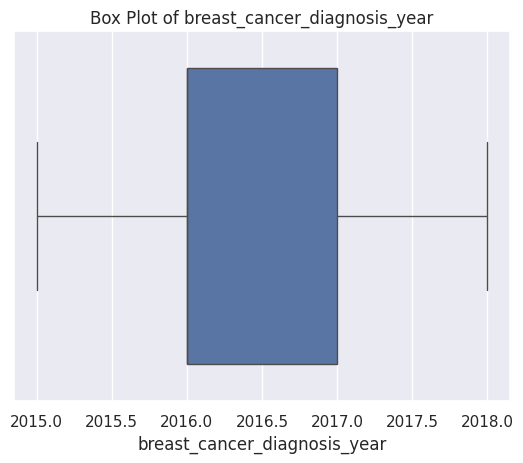

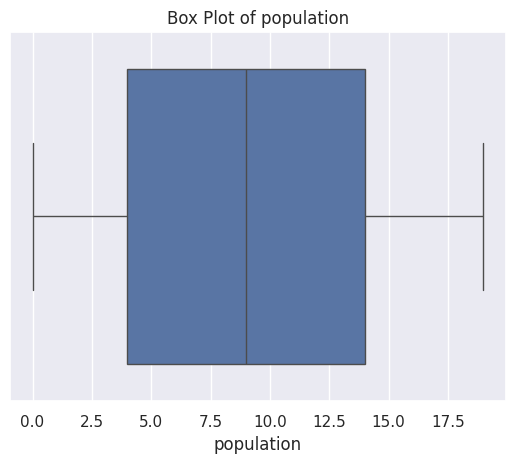

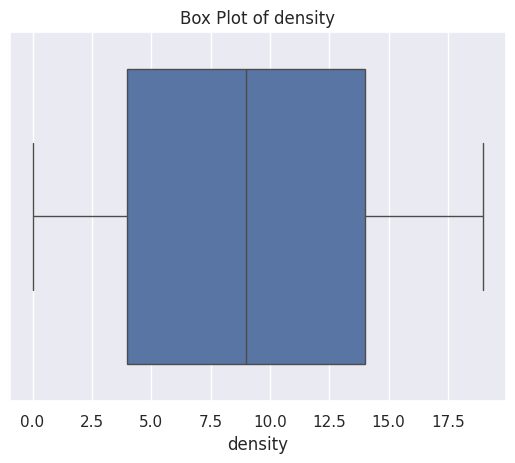

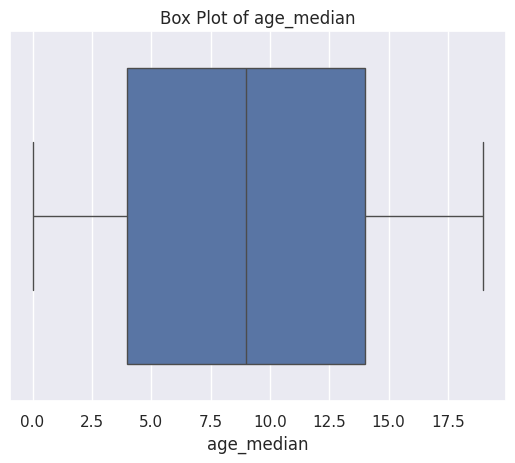

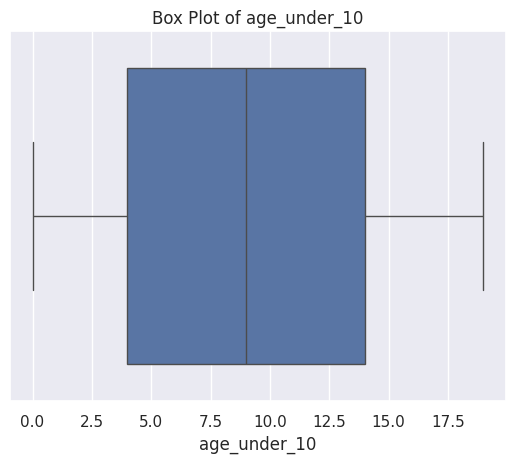

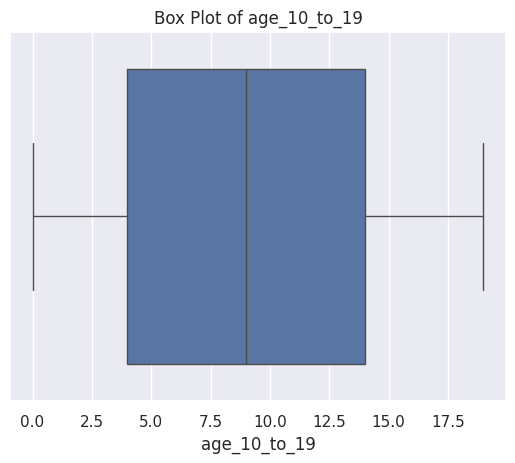

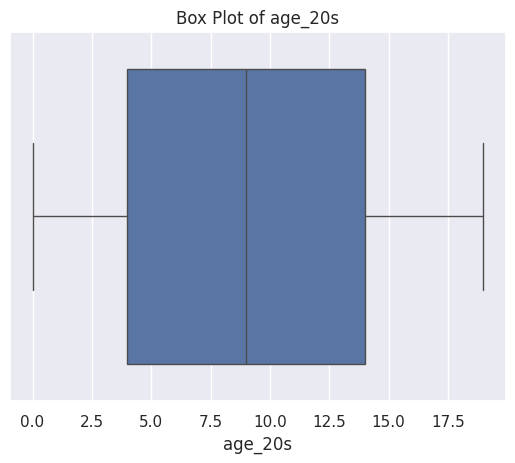

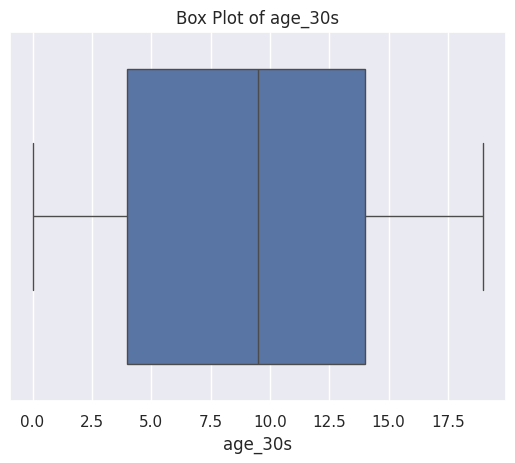

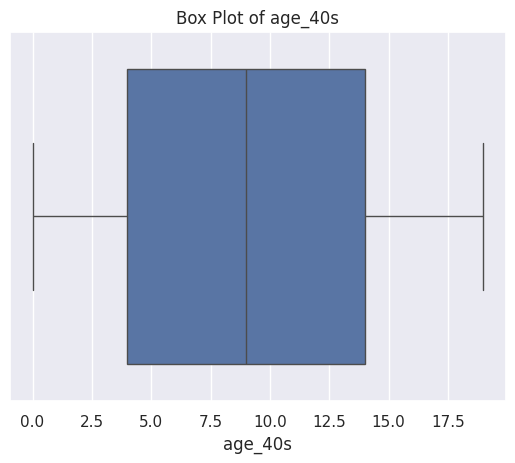

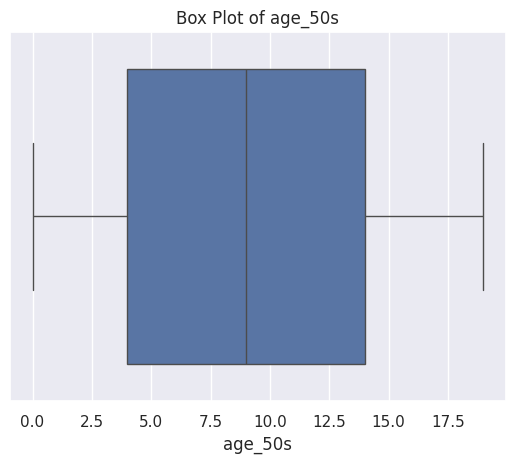

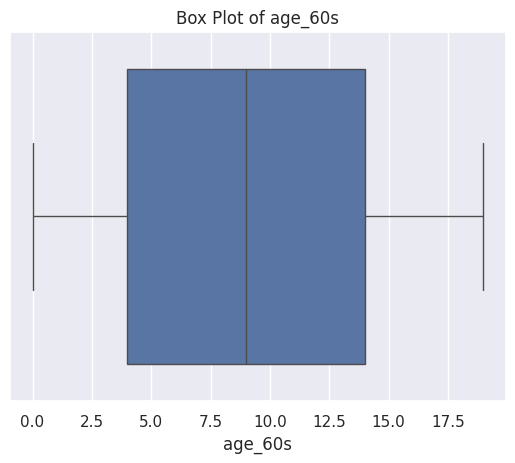

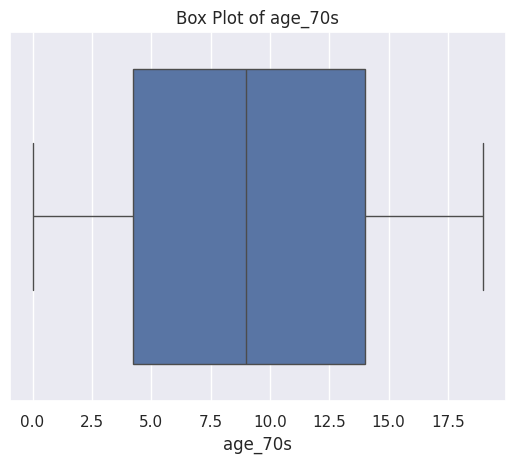

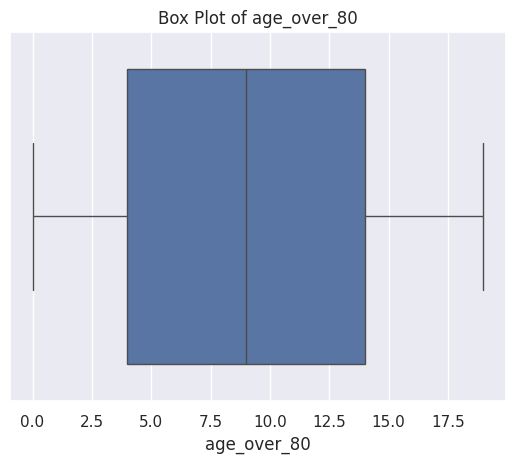

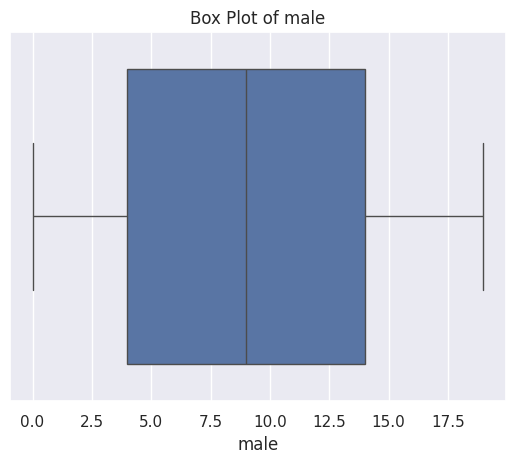

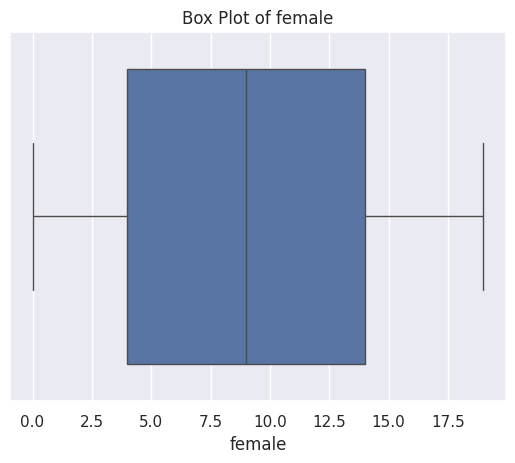

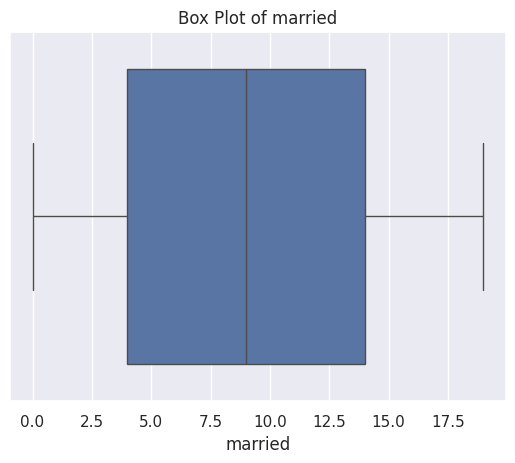

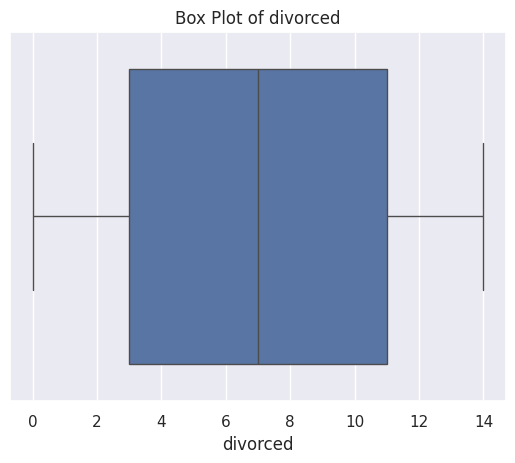

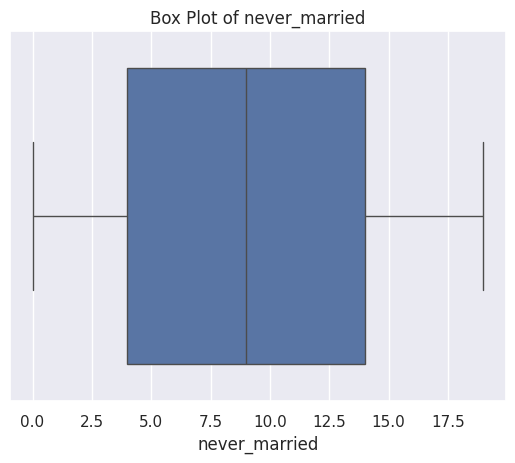

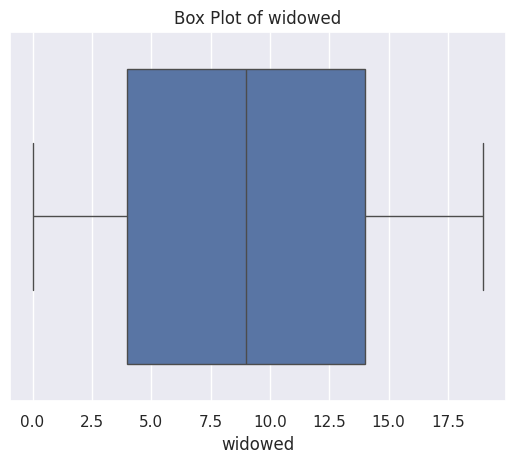

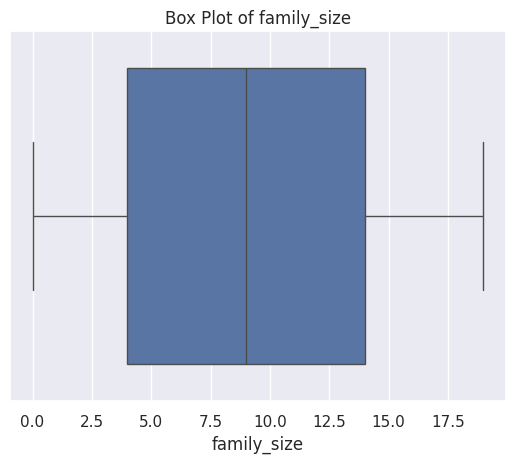

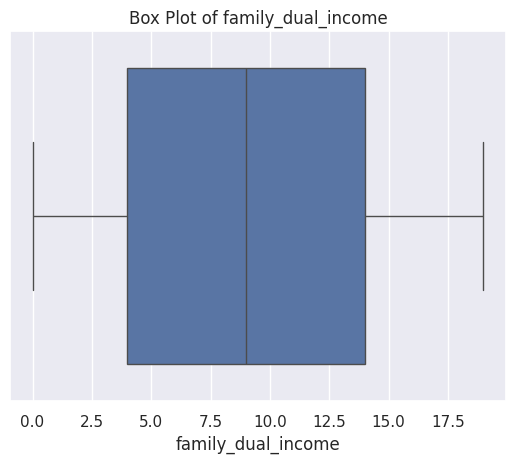

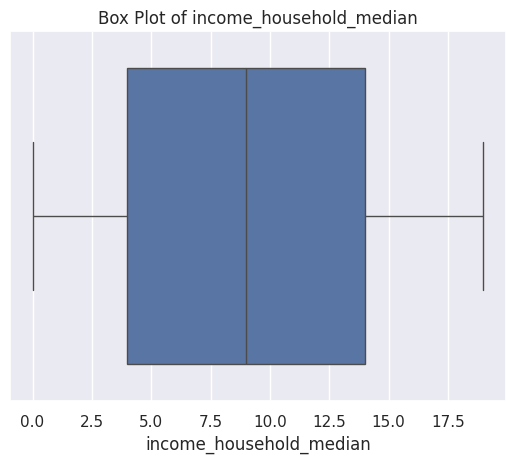

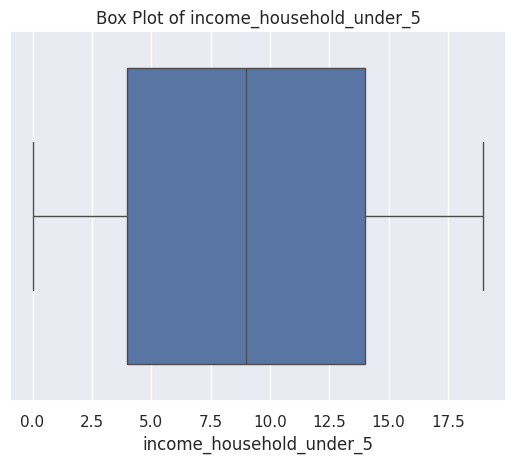

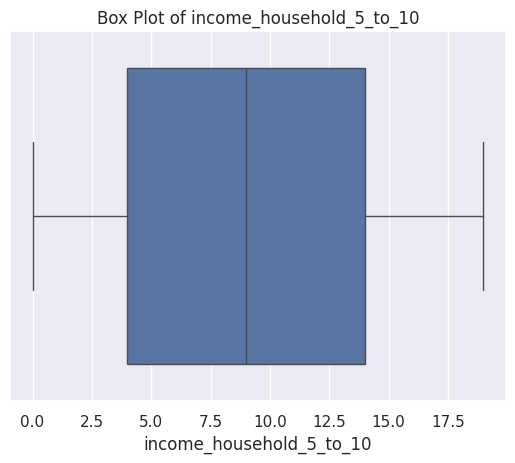

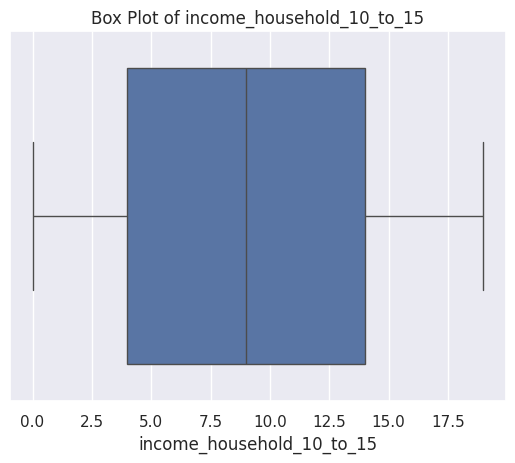

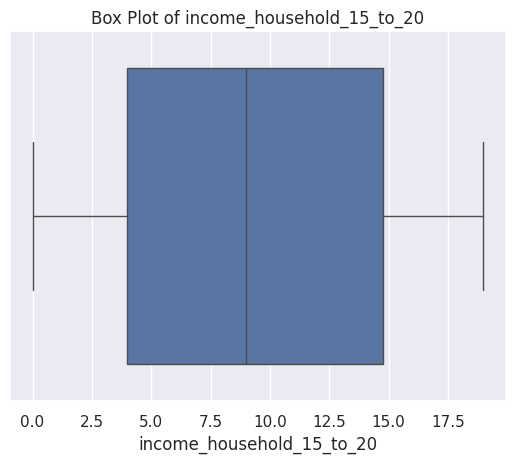

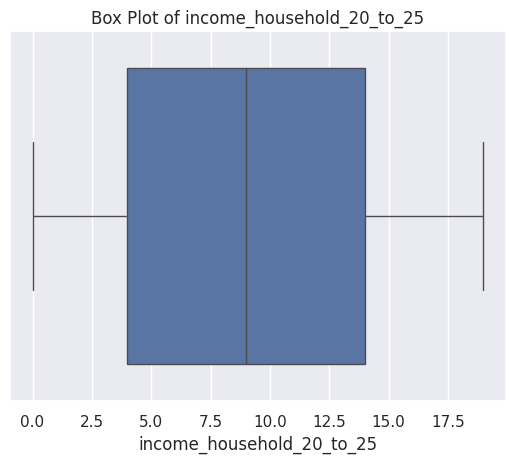

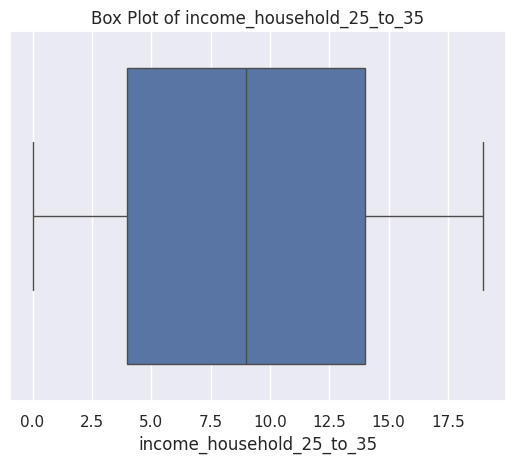

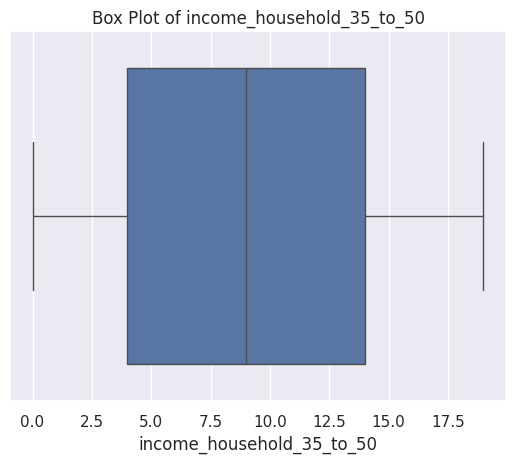

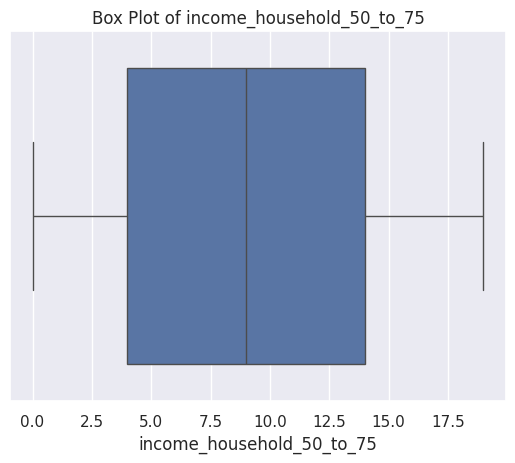

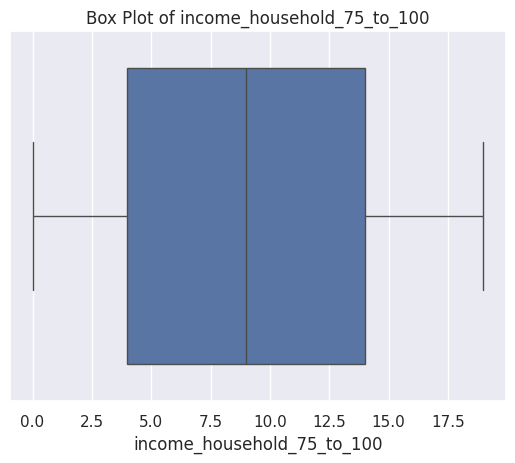

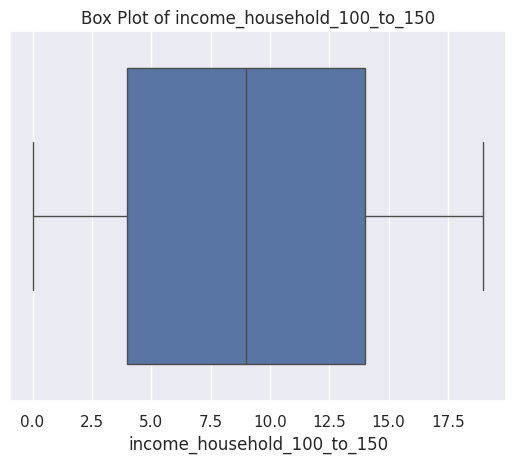

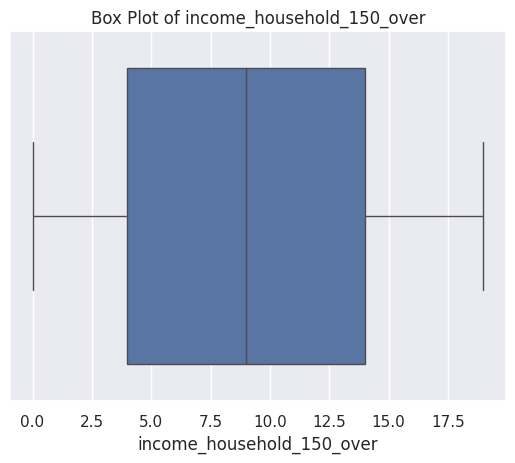

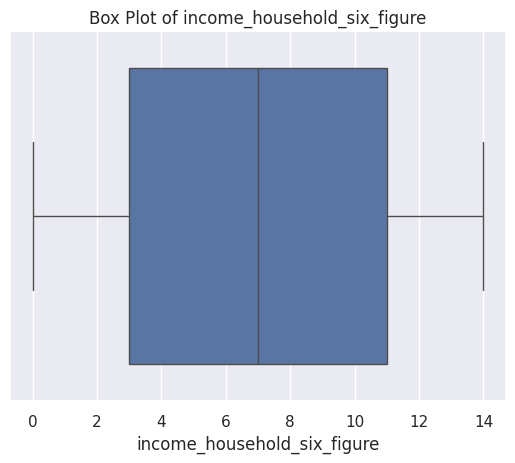

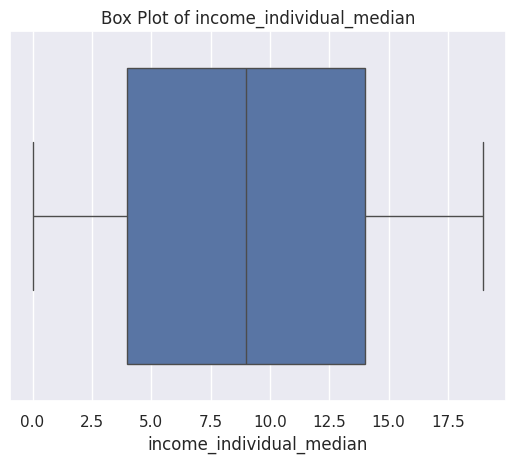

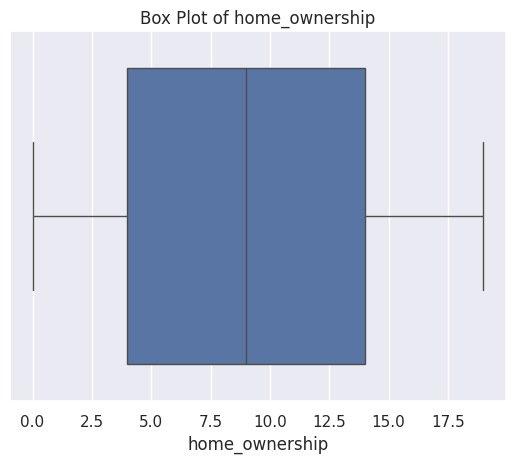

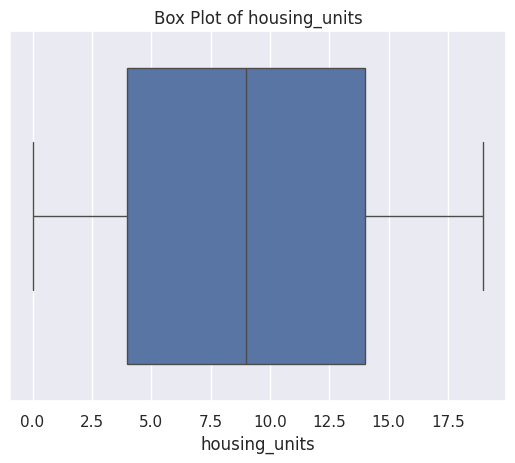

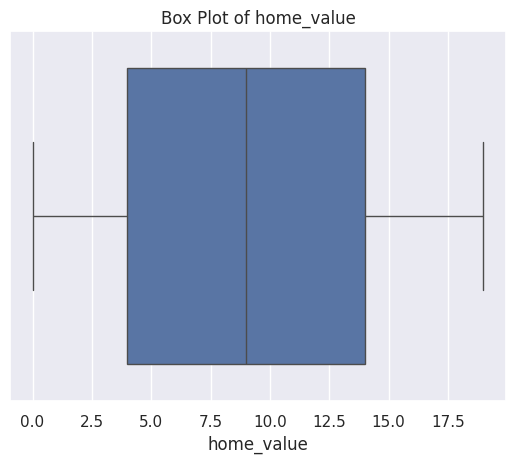

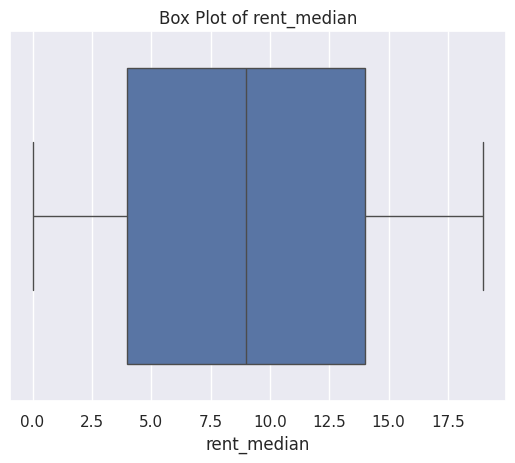

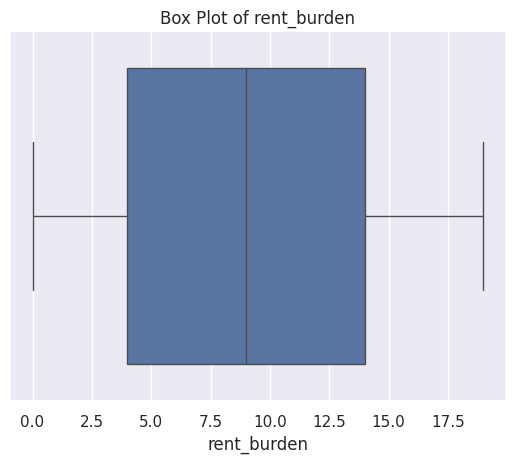

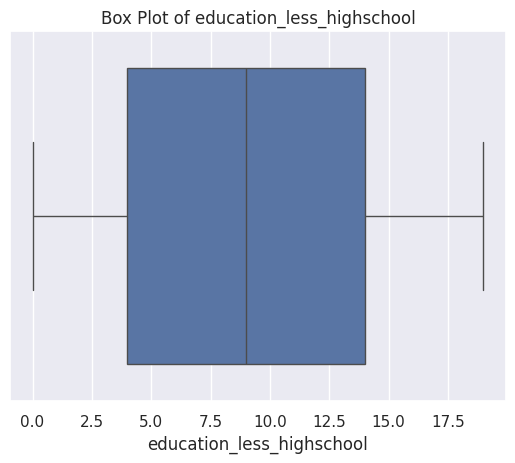

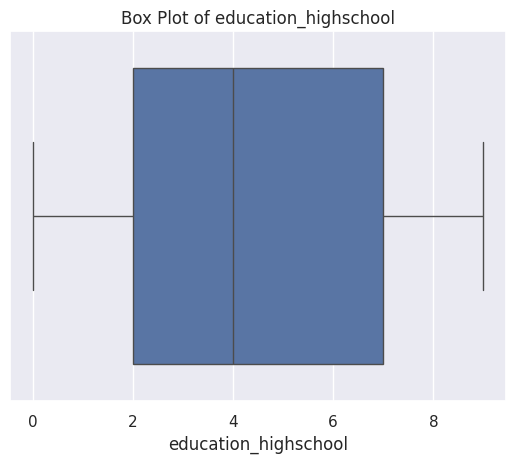

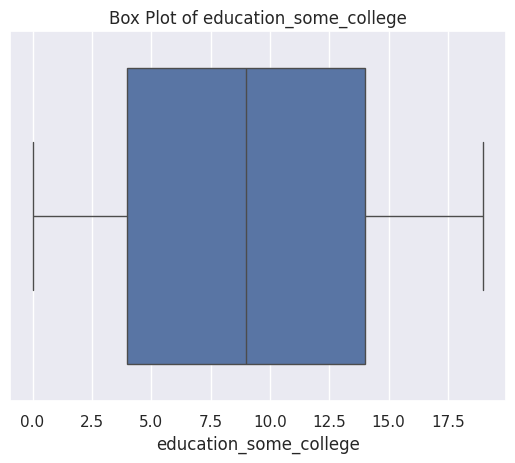

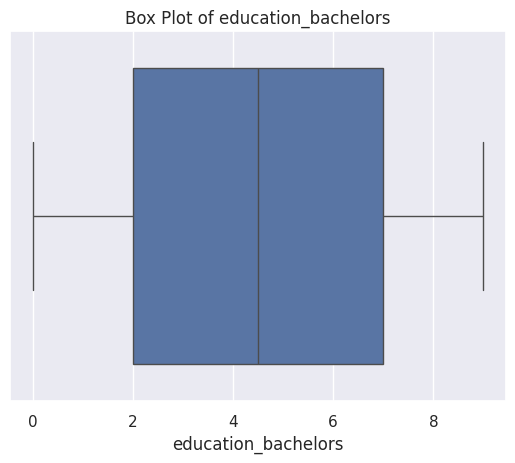

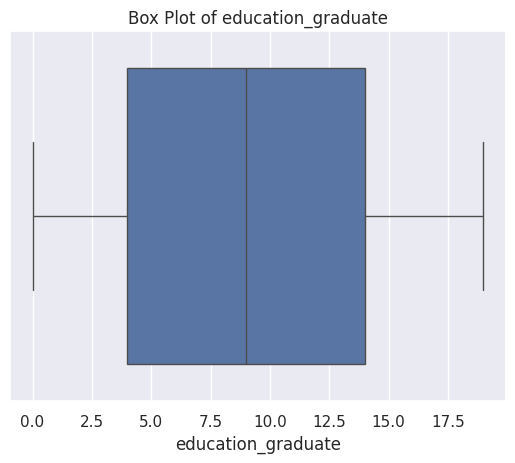

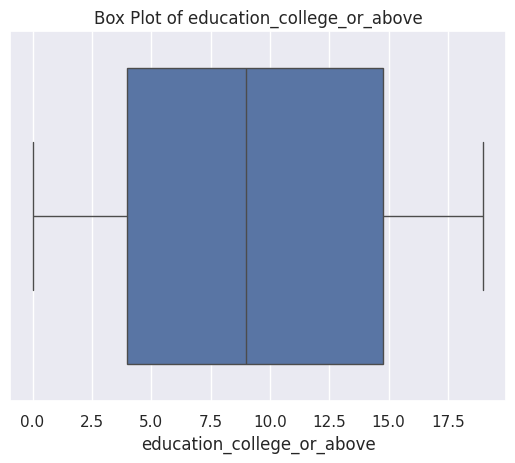

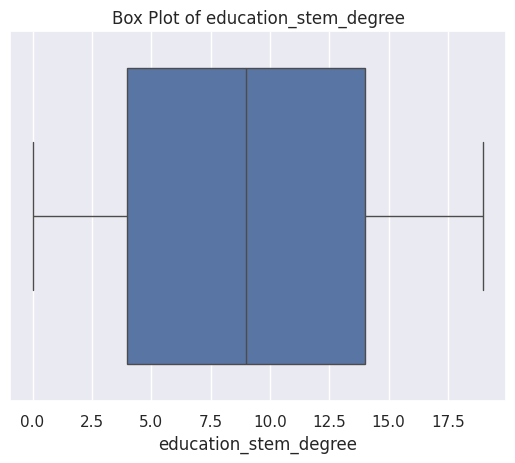

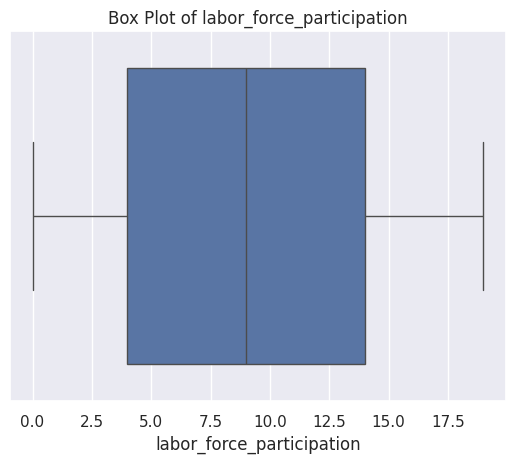

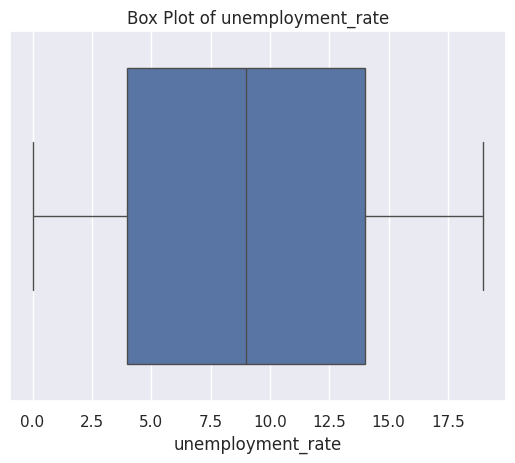

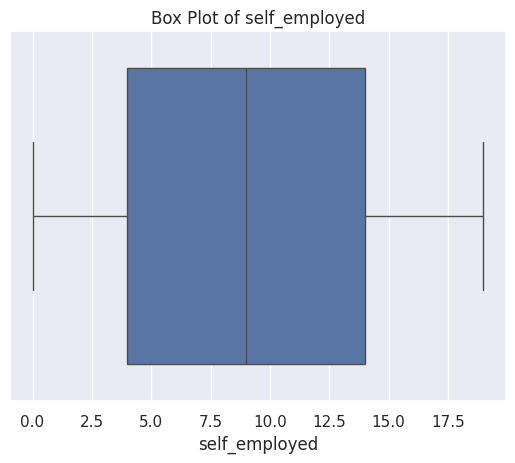

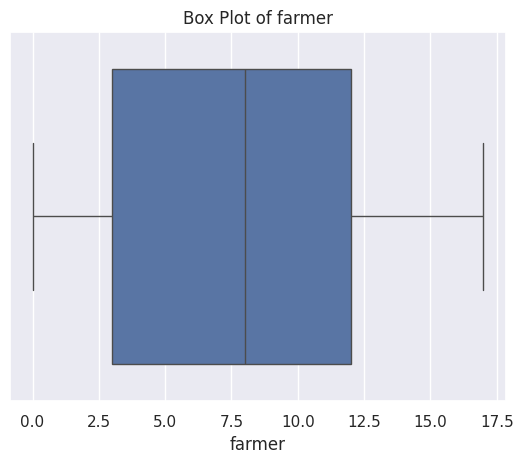

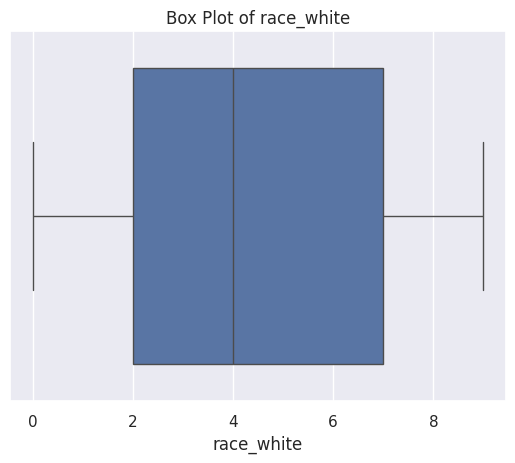

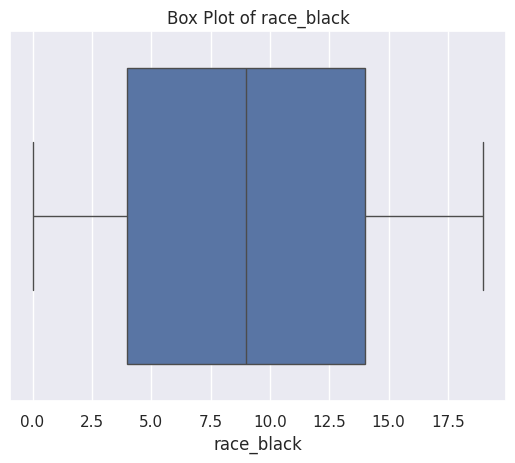

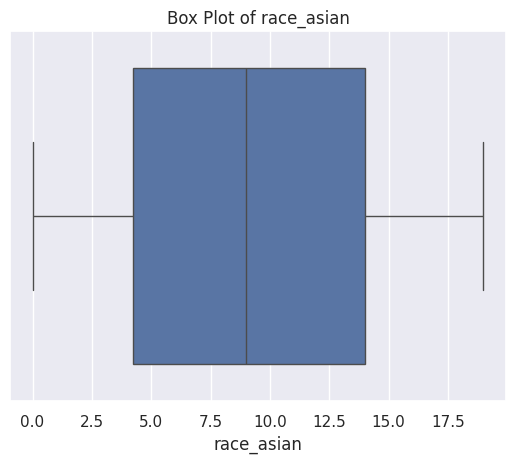

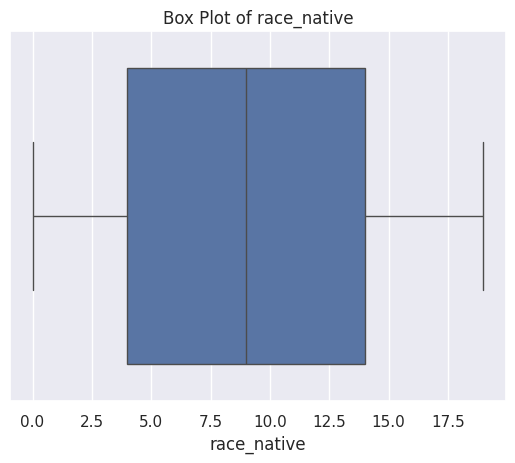

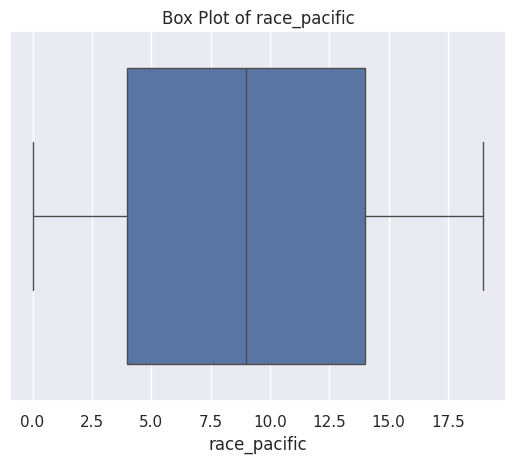

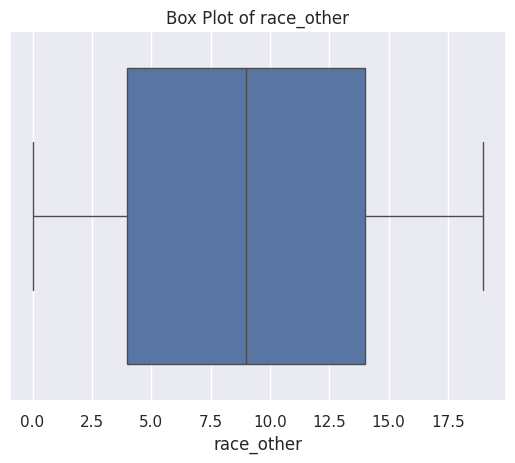

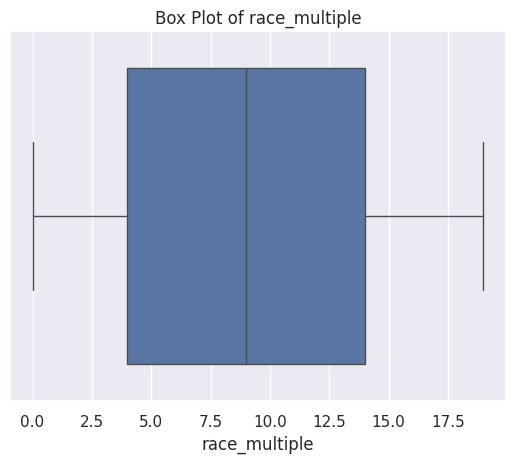

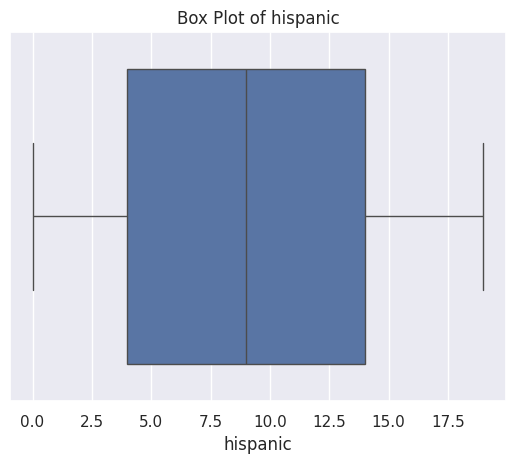

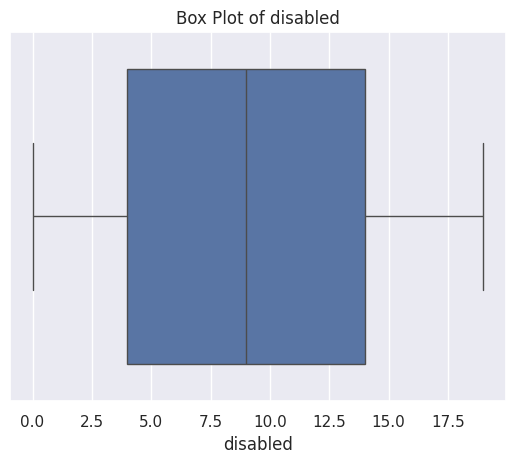

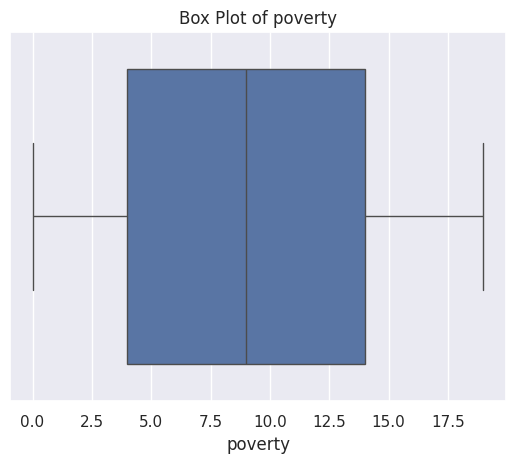

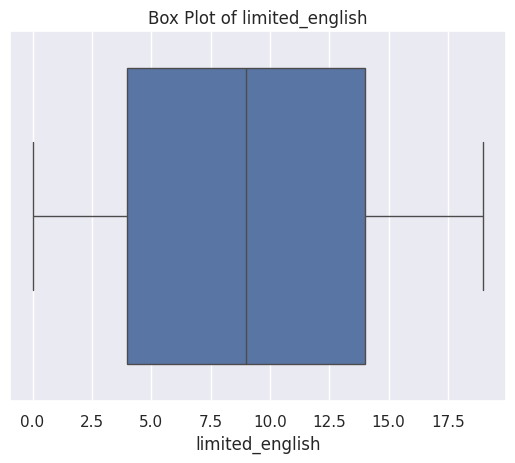

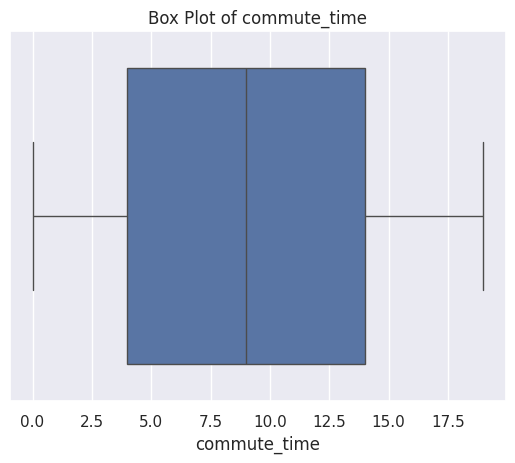

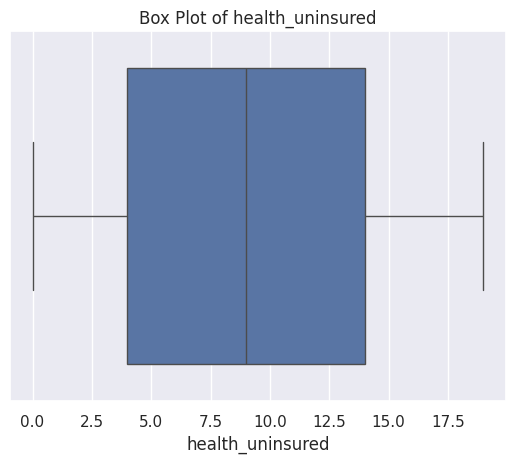

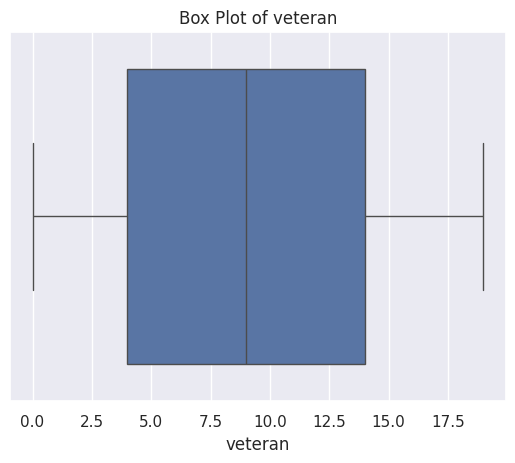

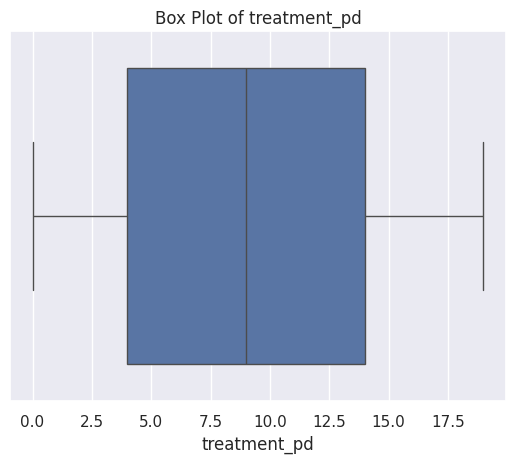

In [ ]:
quantitative_attributes = df.select_dtypes(include=['int64', 'float64']).columns
exclude_attributes=['patient_id', 'patient_zip3', 'treatment_pd']
quantitative_attributes = quantitative_attributes.drop(exclude_attributes)

# Storing the number of outliers for each column
outlier_counts = {}

# Identifying columns with outliers and store the number of outliers
outlier_columns = []

for column in quantitative_attributes:

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    #calculating the lower & upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # checking if any rows fall outside our bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Counts the number of outliers per column
    outlier_counts[column] = len(outliers)

    #Storing columns with outliers
    if len(outliers) > 0:
        outlier_columns.append(column)


# Loop through columns with outliers and bin based on outlier count
for column in outlier_columns:
    if outlier_counts[column] <= 30:
        num_bins = 10
    elif 30 < outlier_counts[column] <= 70:
        num_bins = 15
    else:
        num_bins = 20

    df[column] = pd.qcut(df[column], q=num_bins, labels=False, duplicates='drop')

# Plot boxplots for binned columns
for column in quantitative_attributes:
    sns.boxplot(data=df, x=column)
    plt.title('Box Plot of ' + column)
    plt.show()

##Q12 - Normalize inconsistent data

In [ ]:
#We will use the same binned columns and use min/max scaling to do so.
for column in quantitative_attributes:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

print(df)



       patient_id          payer_type patient_state  patient_zip3  \
0          994155          COMMERCIAL            CA           917   
1          154389  MEDICARE ADVANTAGE            OH           451   
2          387343          COMMERCIAL            TX           773   
3          921275            MEDICAID            CA           928   
4          803454          COMMERCIAL            NY           112   
...           ...                 ...           ...           ...   
27669      728161          COMMERCIAL            MO           653   
27670      203896          COMMERCIAL            IN           462   
27671      740115            MEDICAID            TX           769   
27672      122759          COMMERCIAL            AZ           853   
27673      849565          COMMERCIAL            CA           923   

       patient_age patient_gender breast_cancer_diagnosis_code  \
0         0.210526              F                       C50811   
1         0.789474              F      

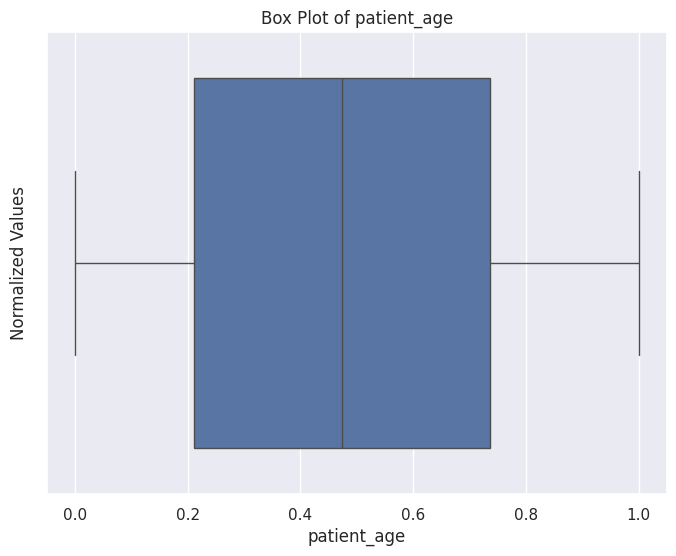

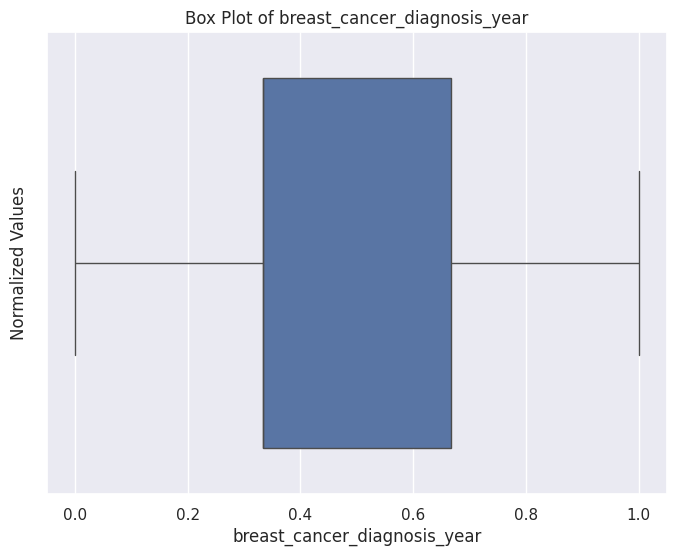

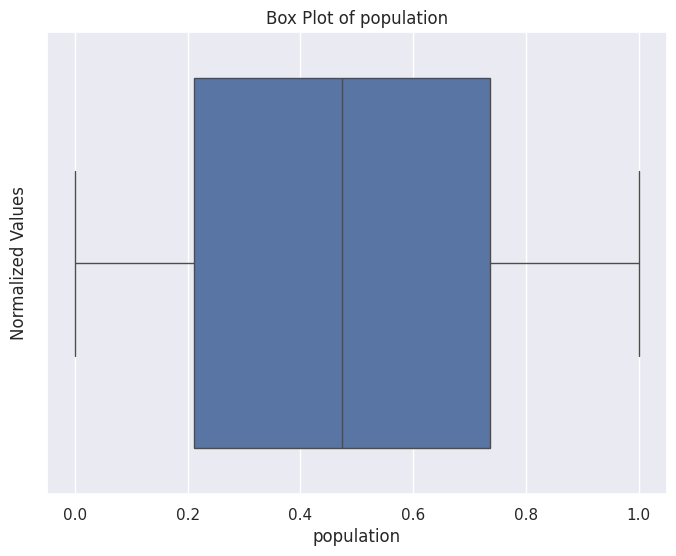

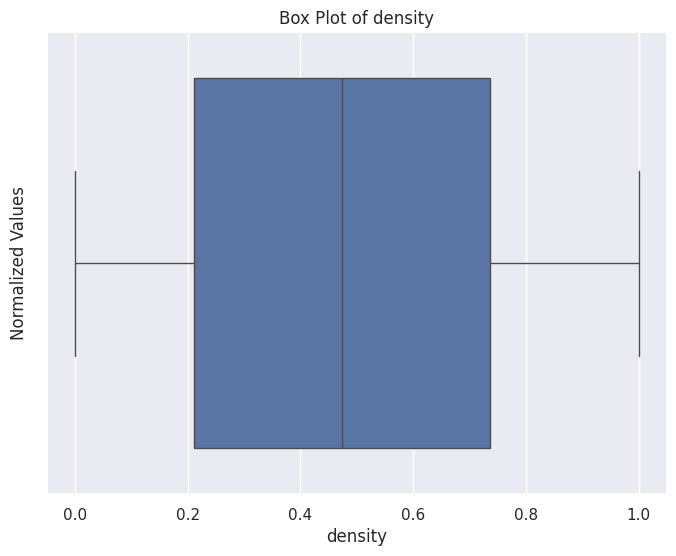

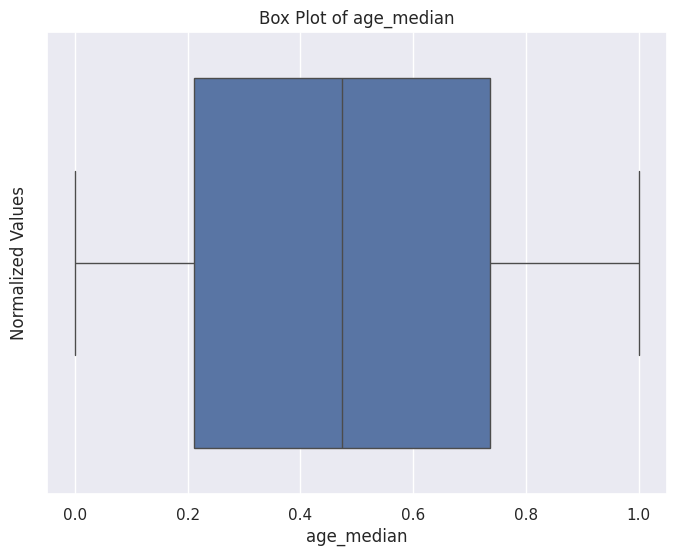

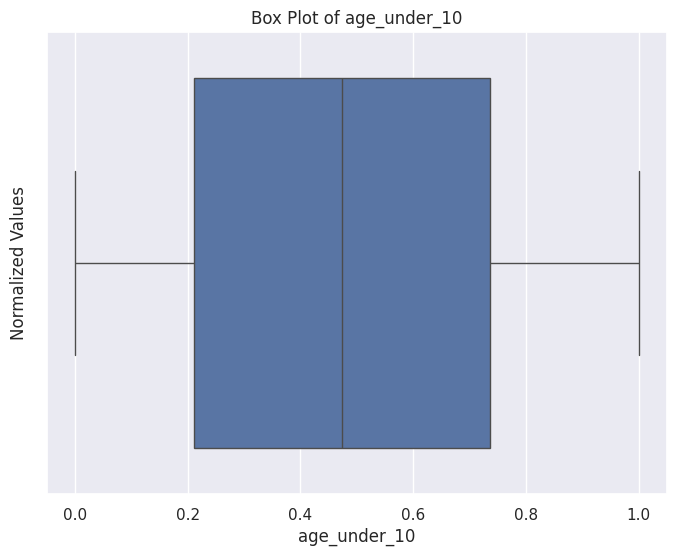

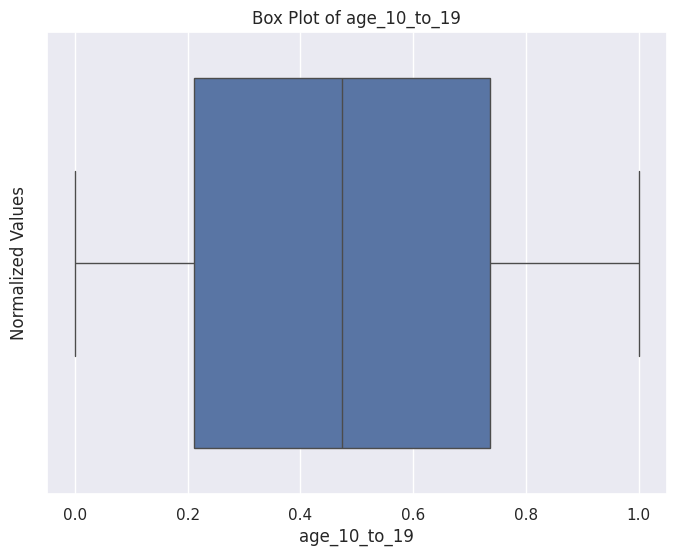

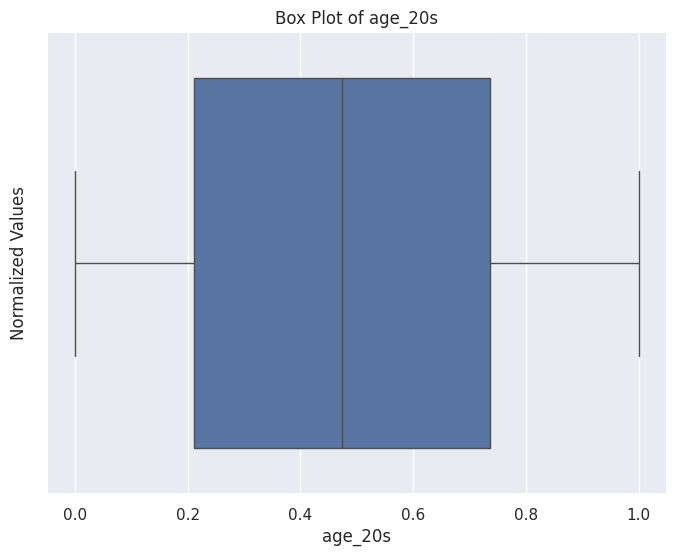

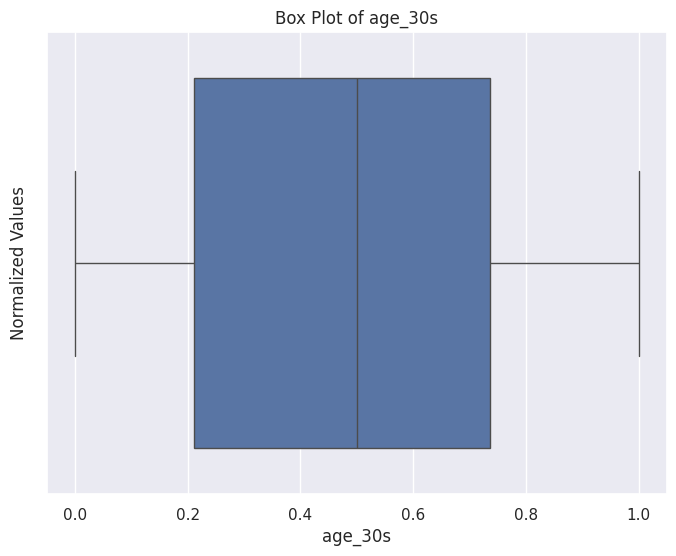

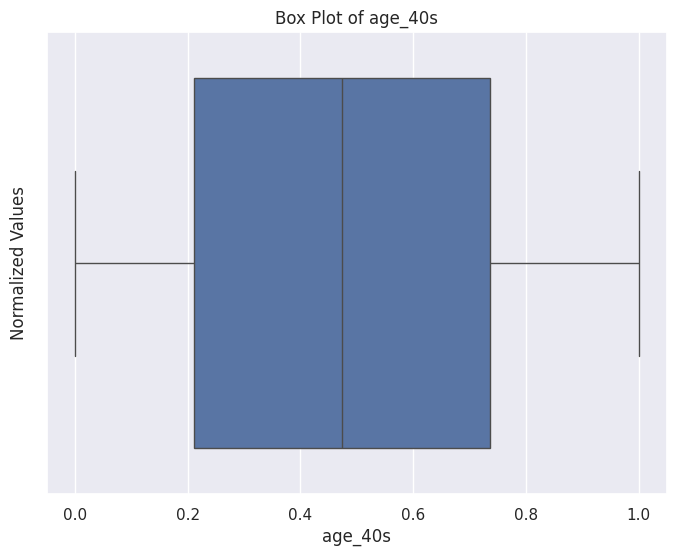

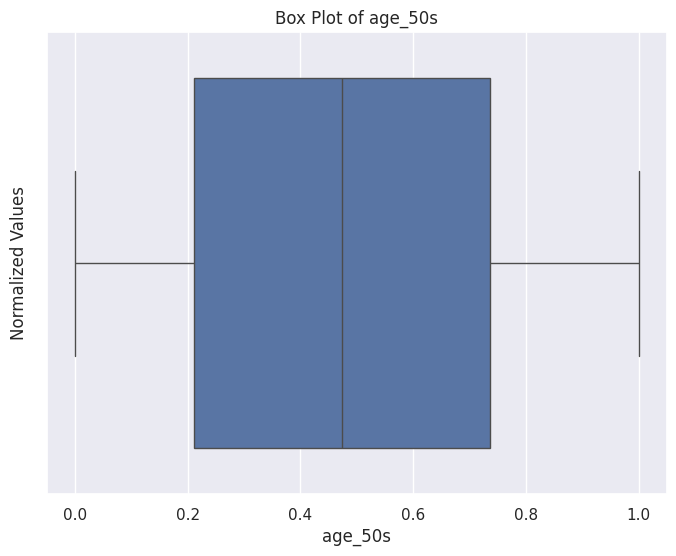

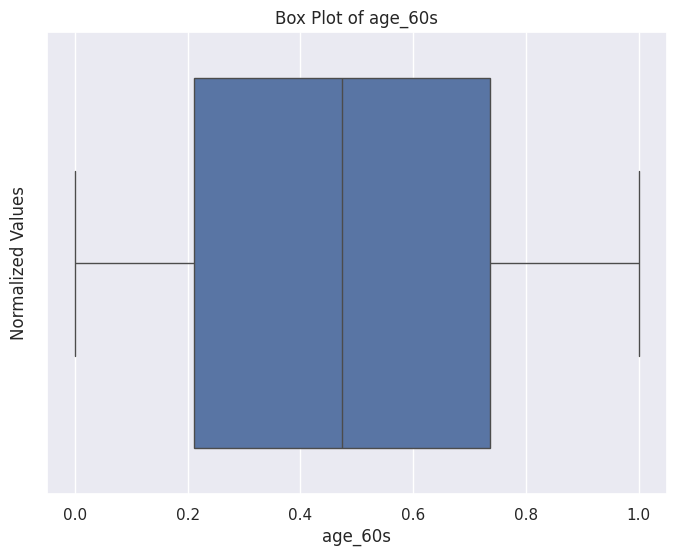

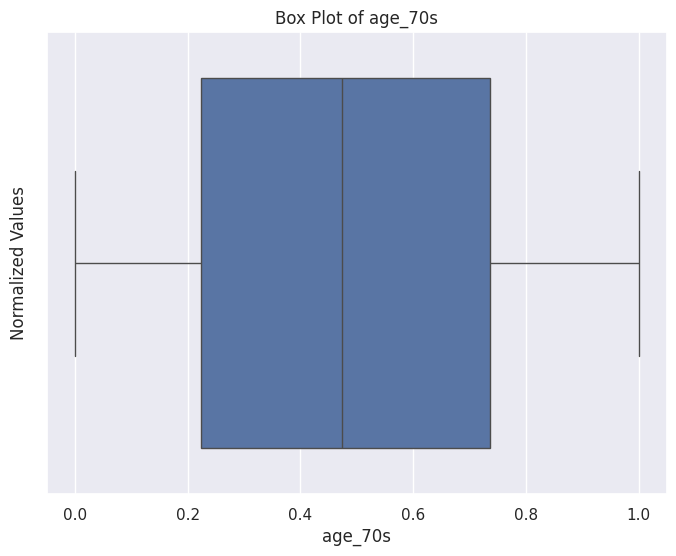

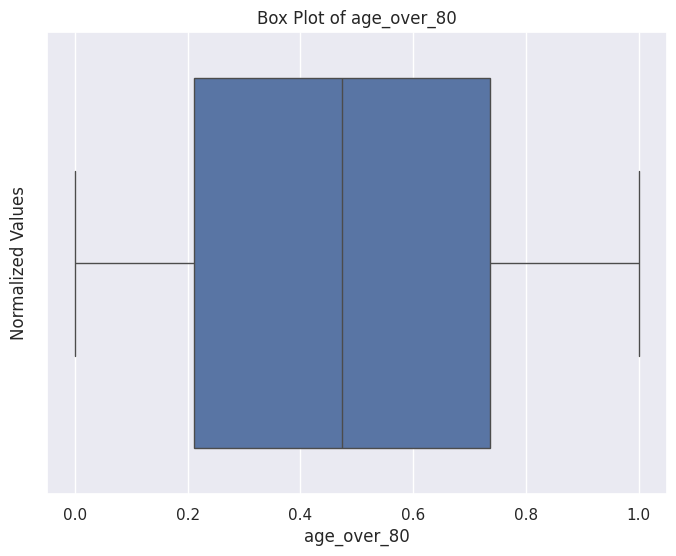

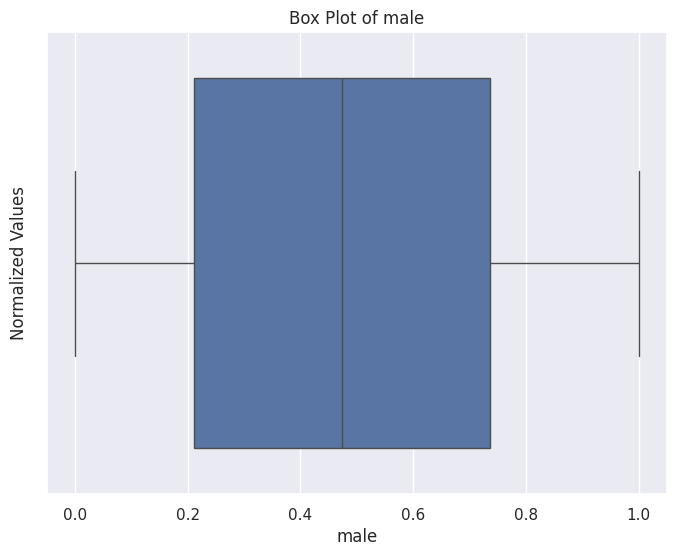

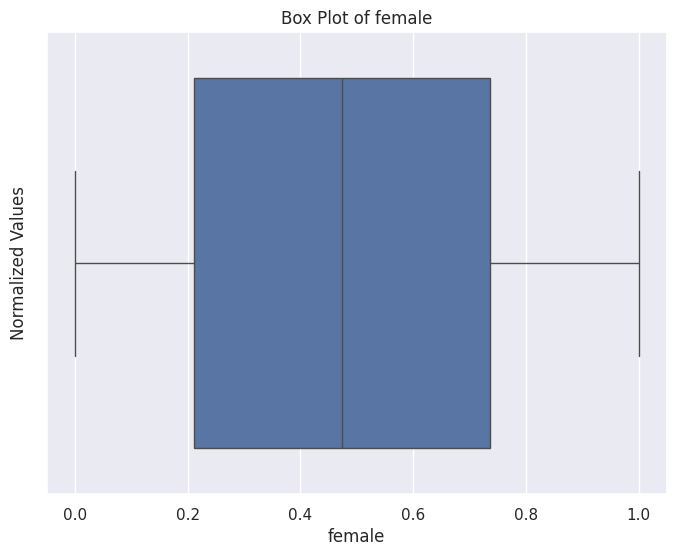

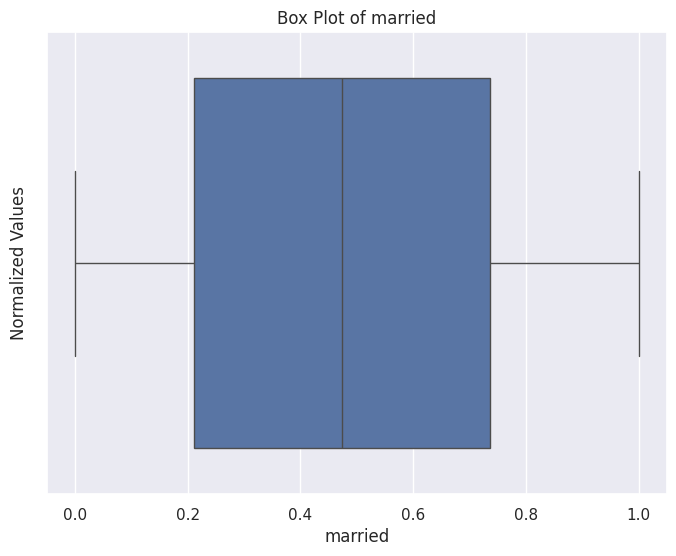

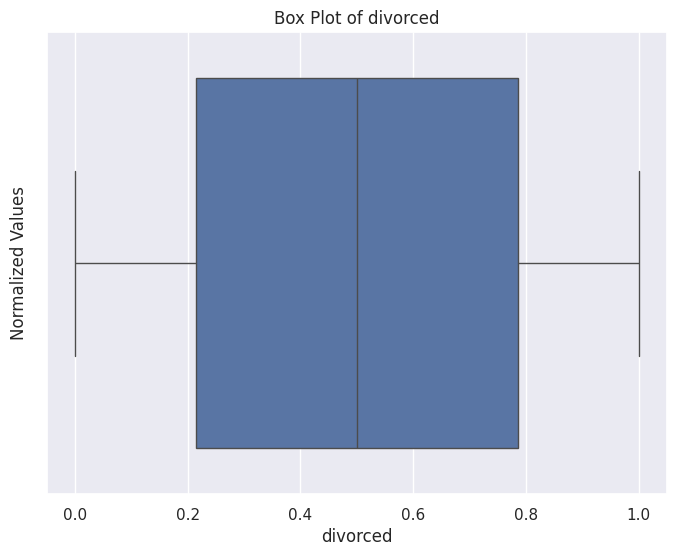

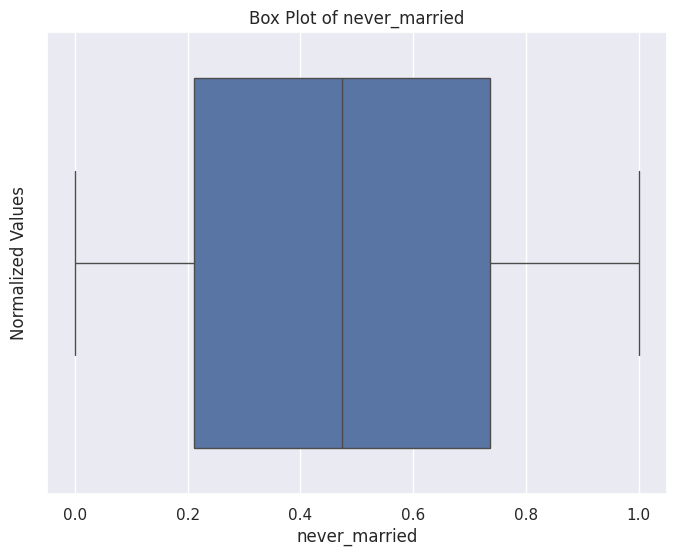

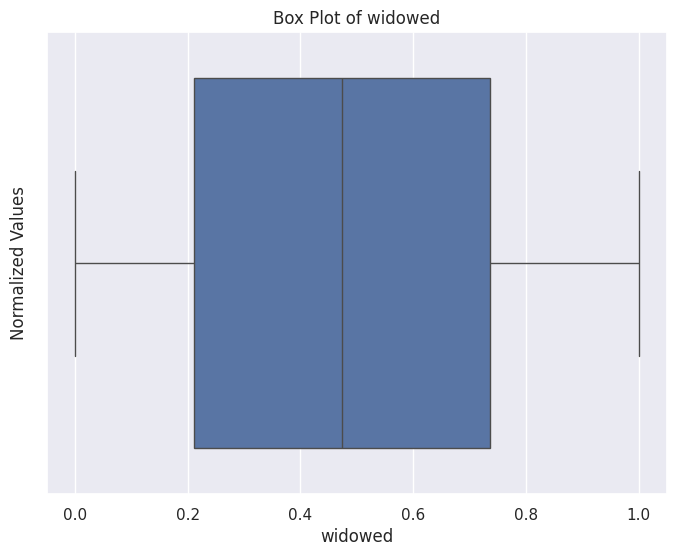

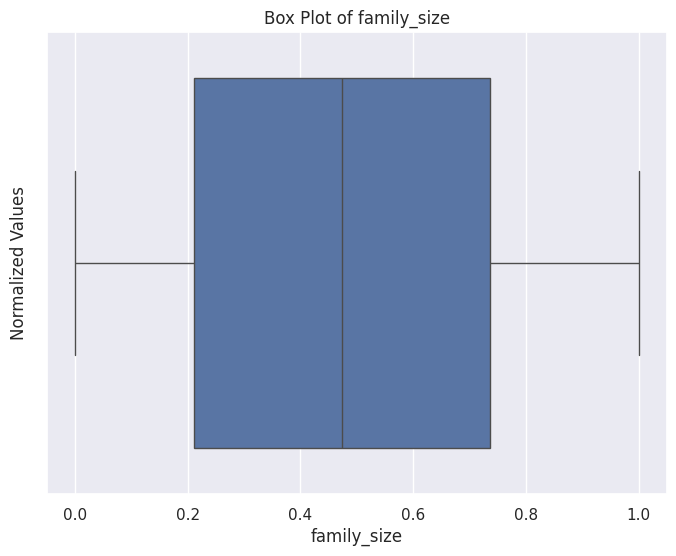

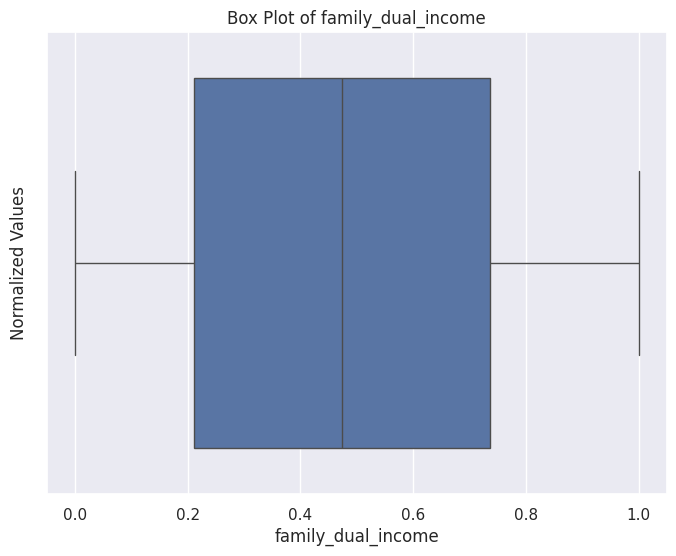

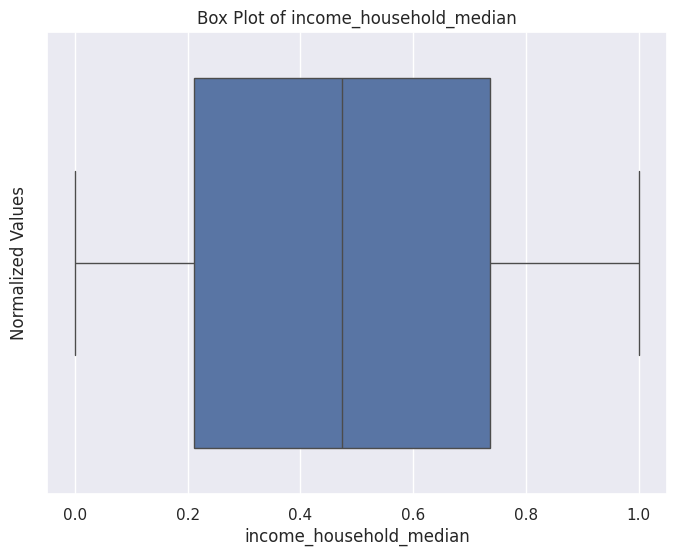

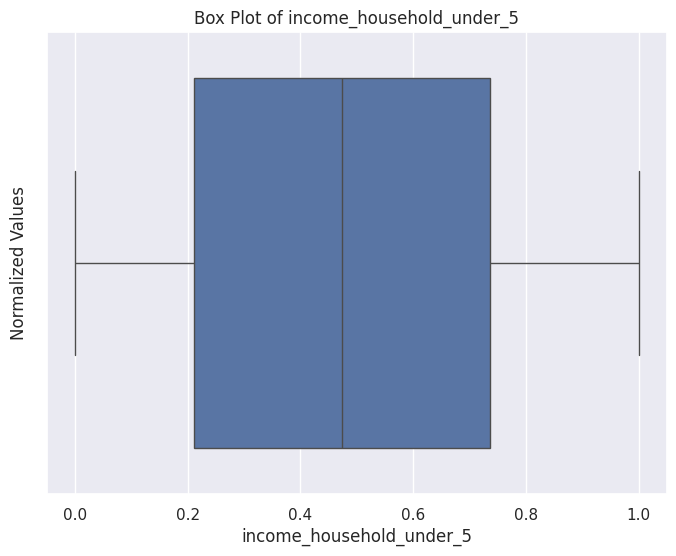

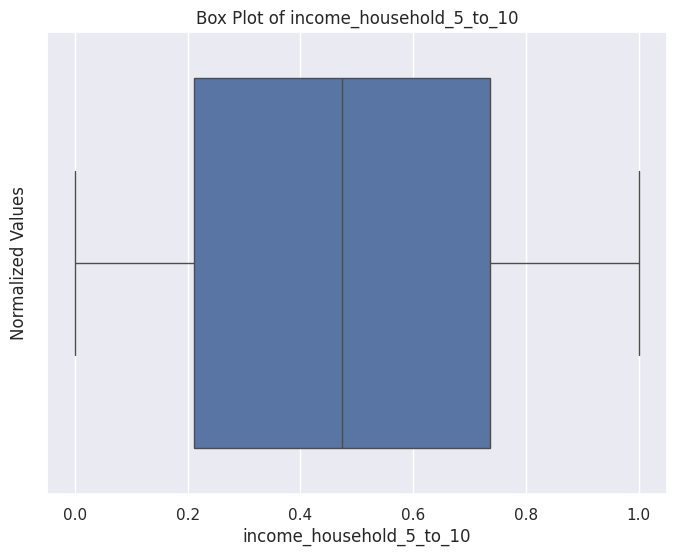

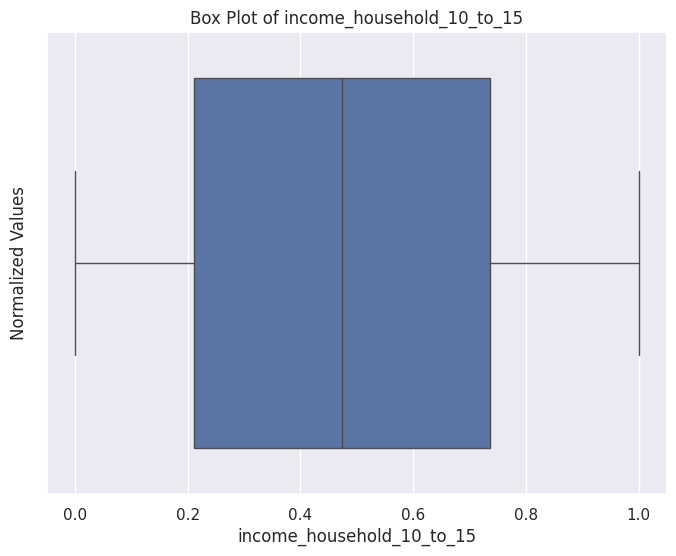

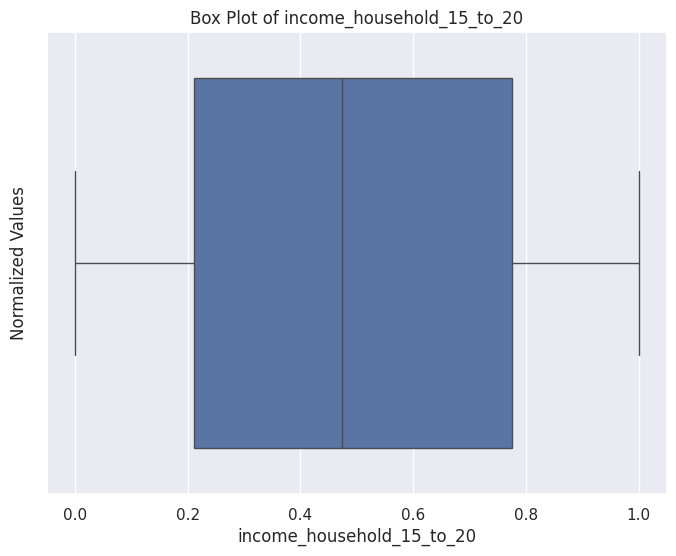

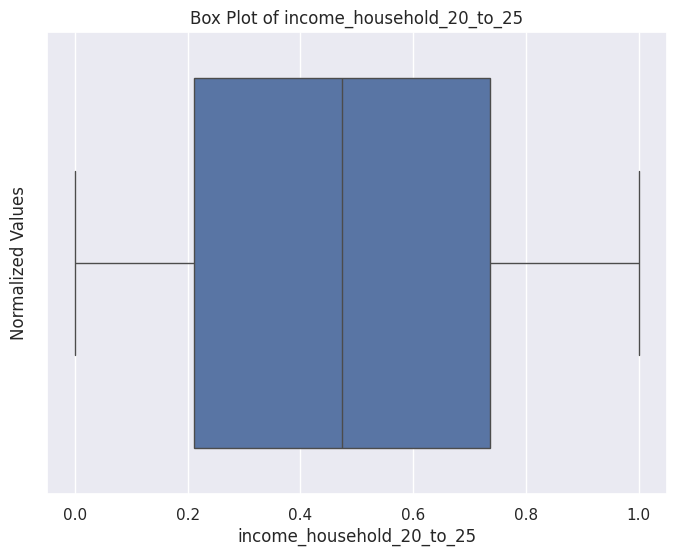

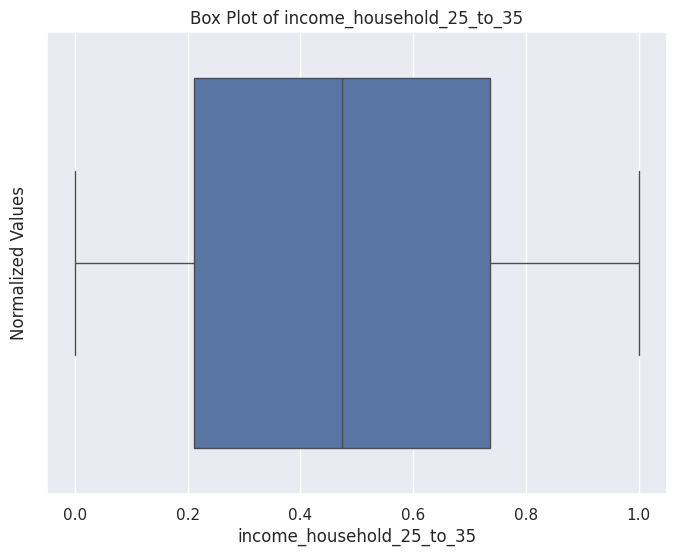

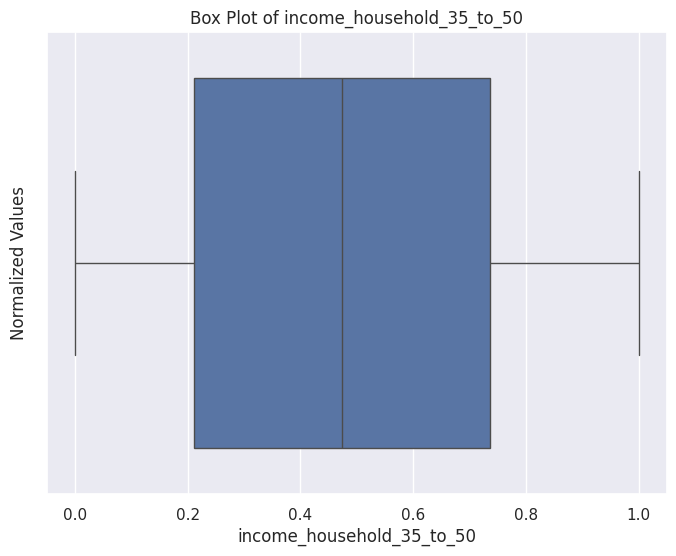

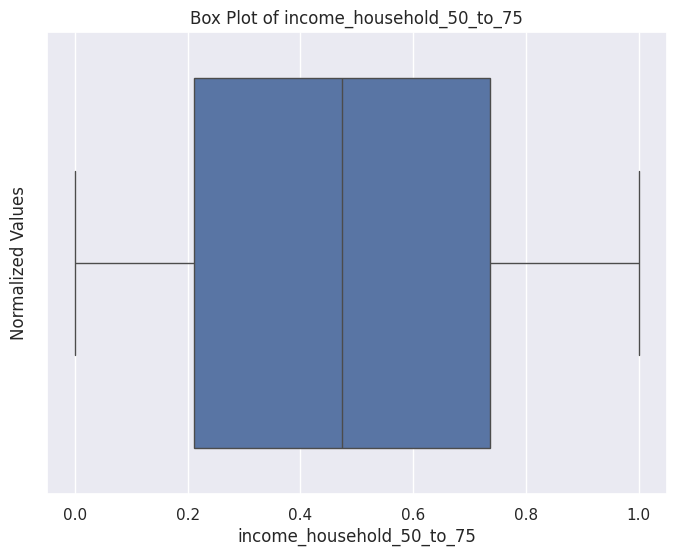

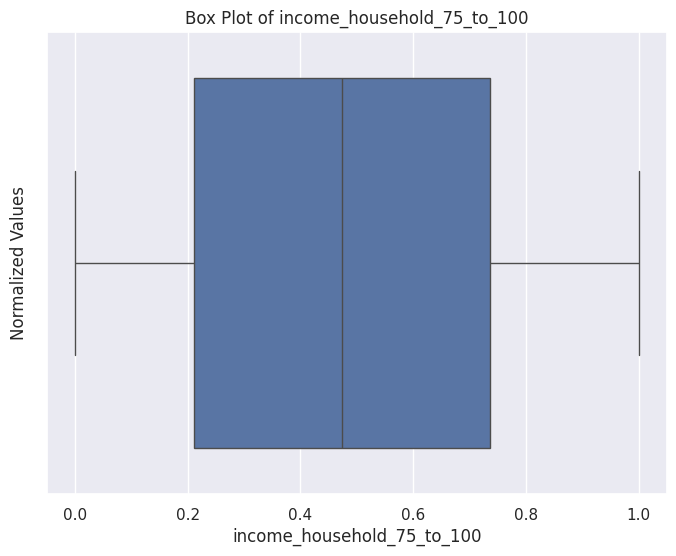

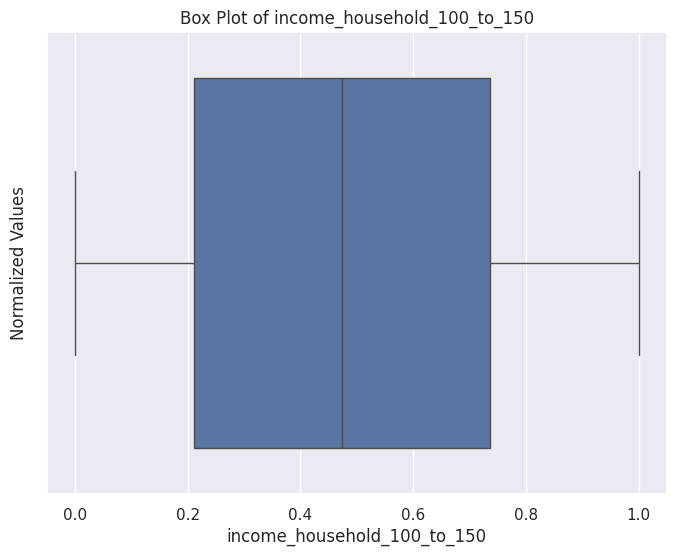

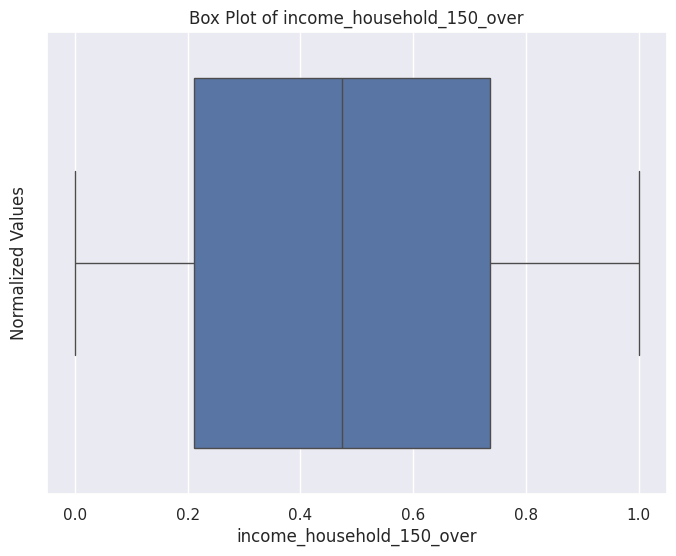

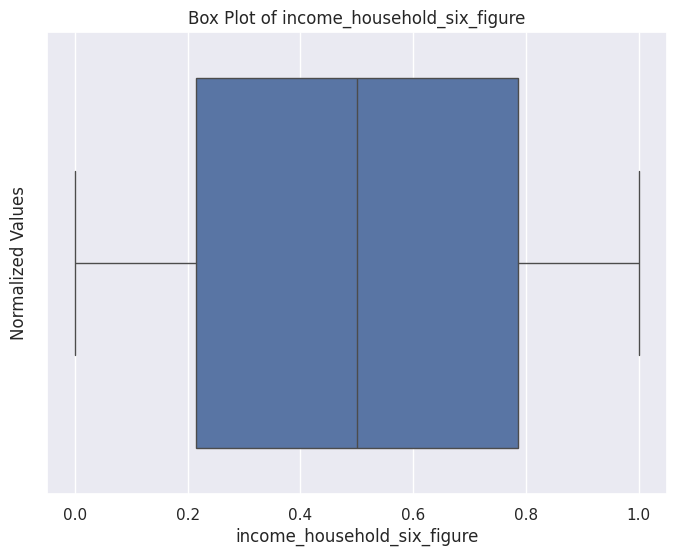

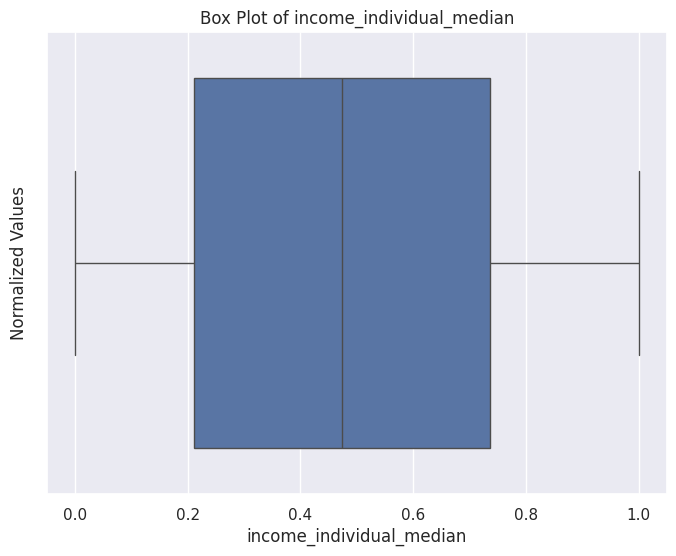

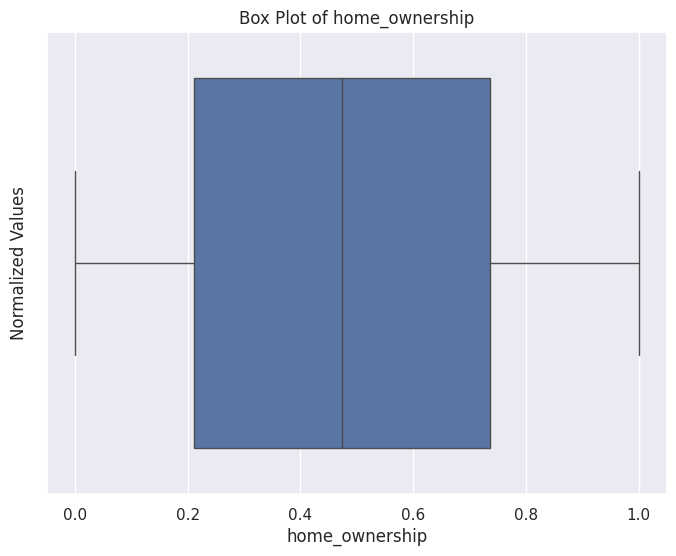

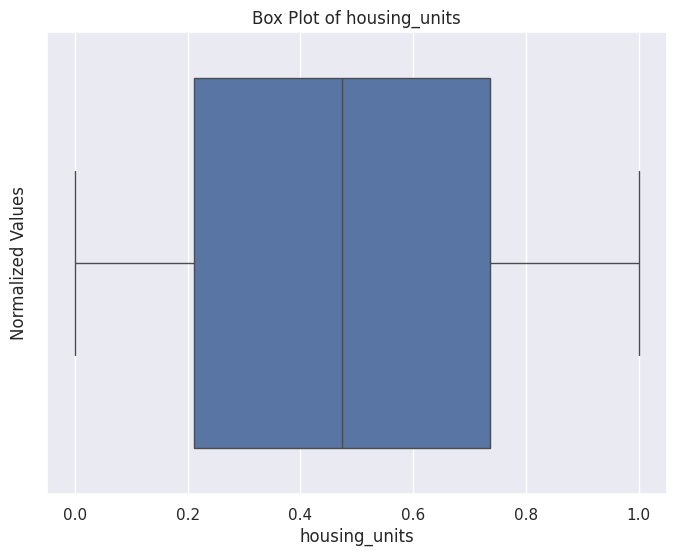

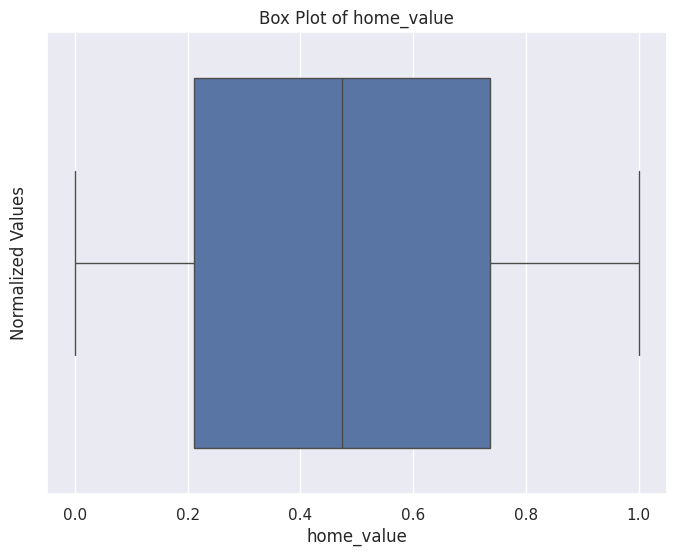

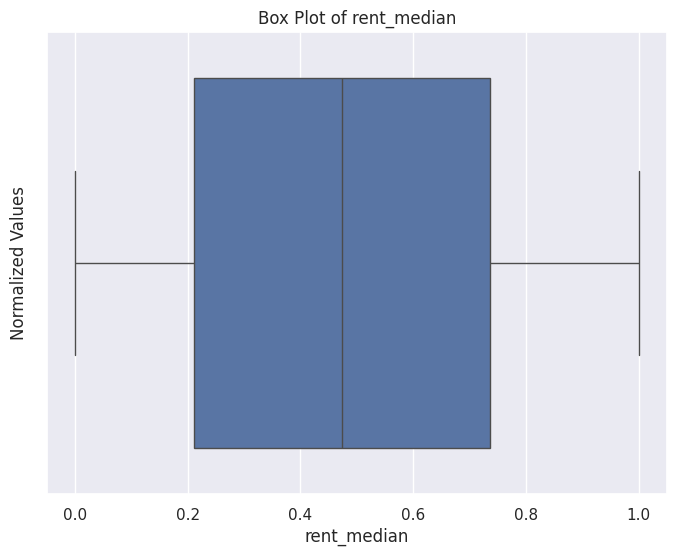

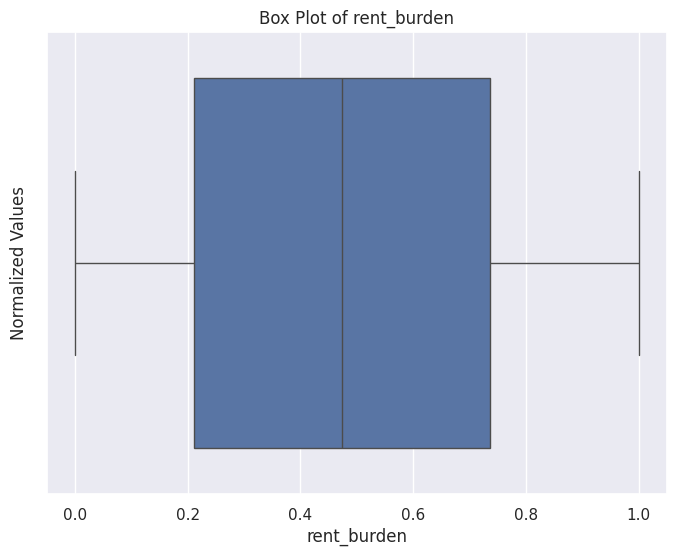

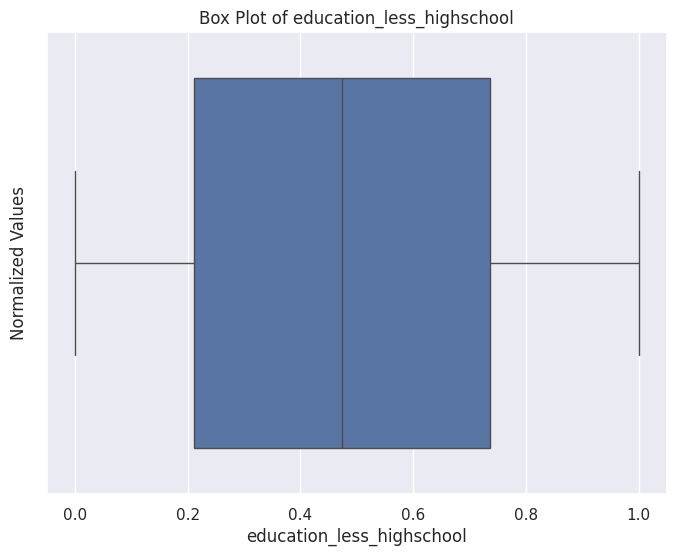

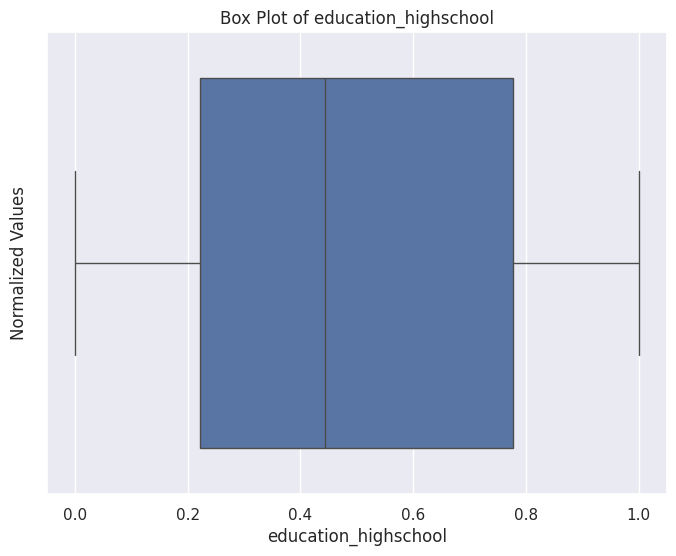

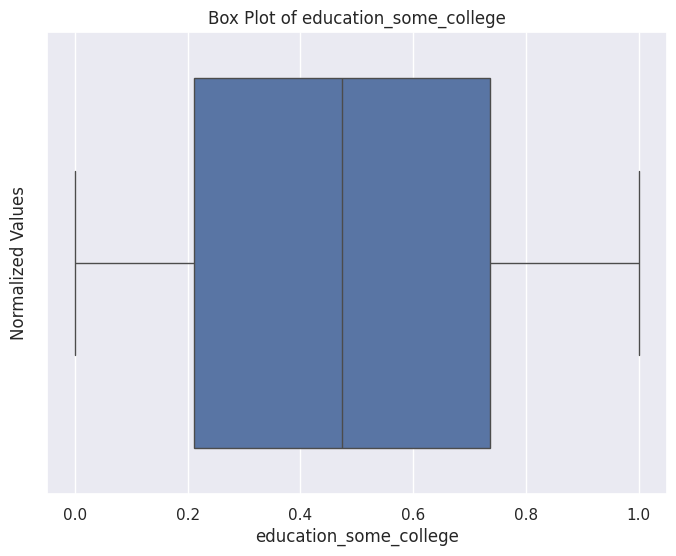

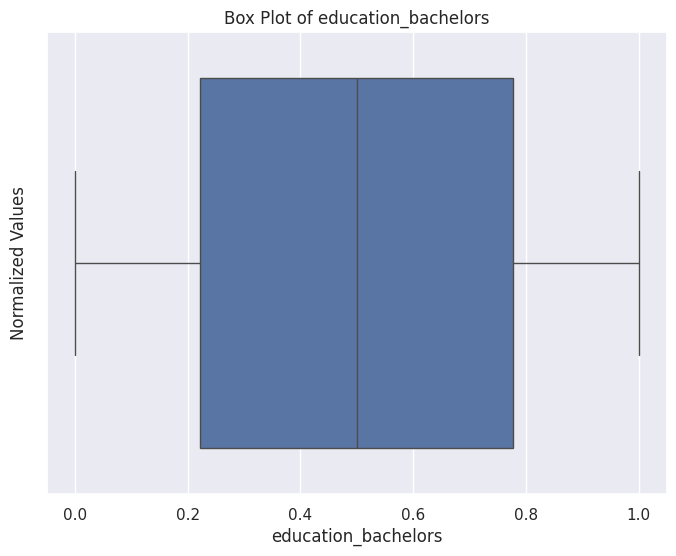

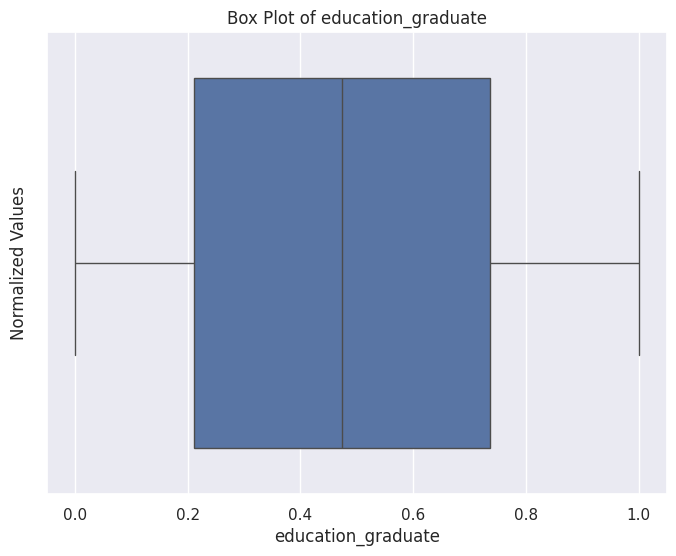

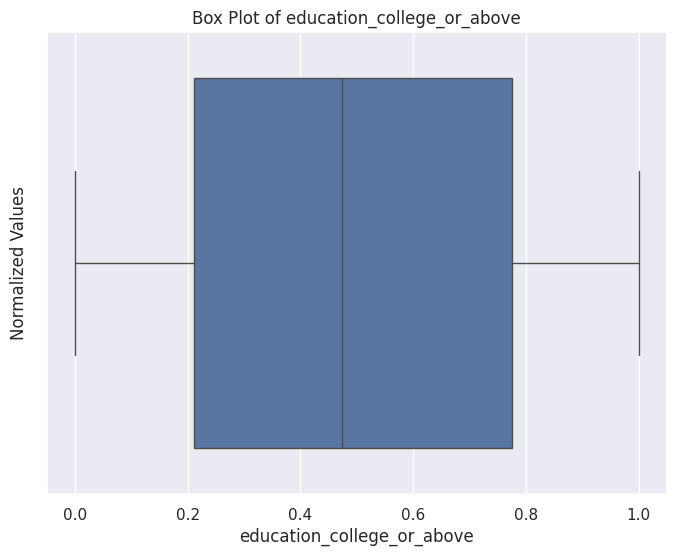

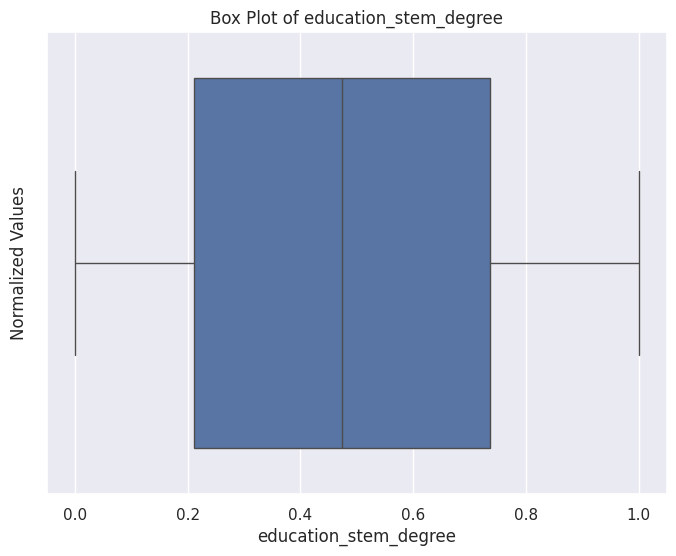

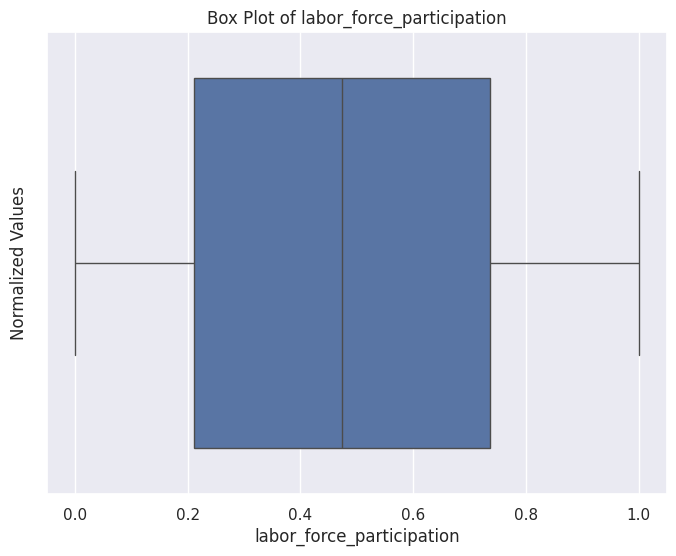

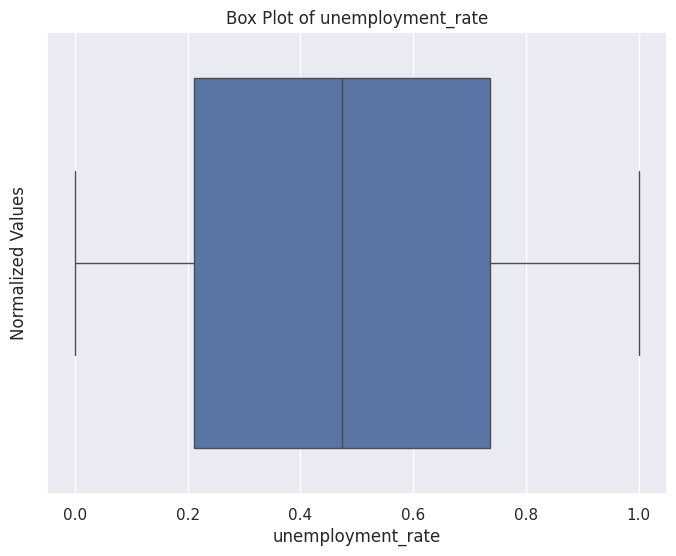

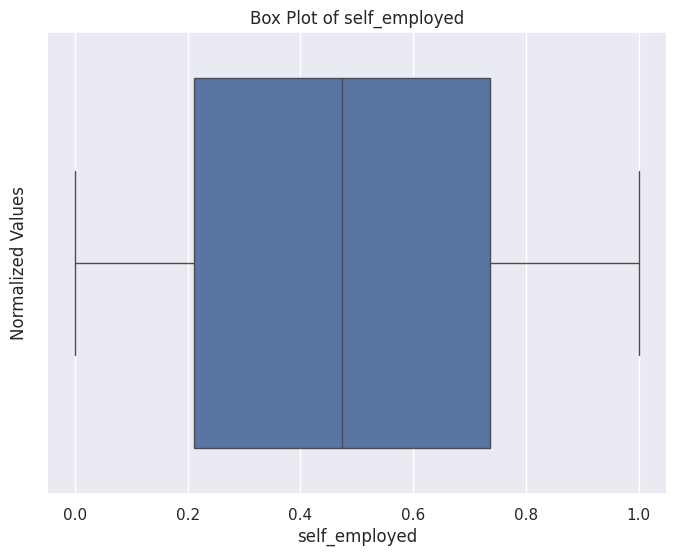

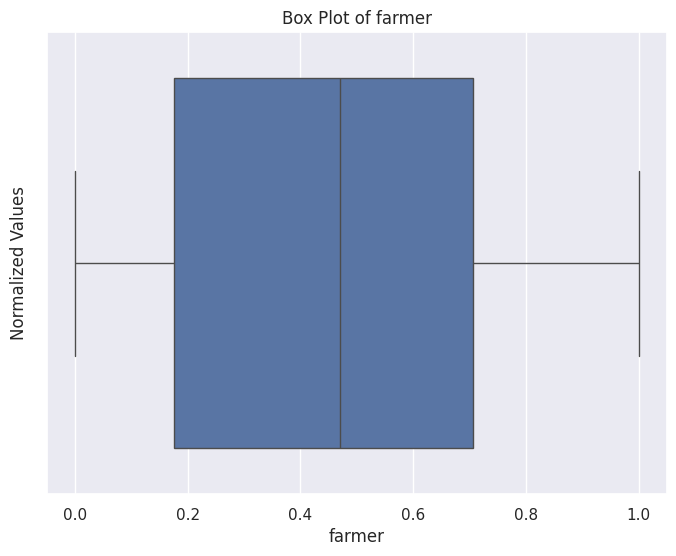

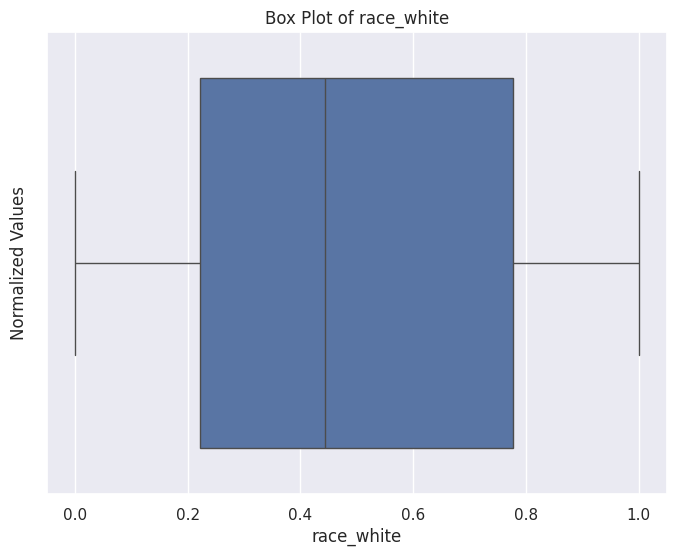

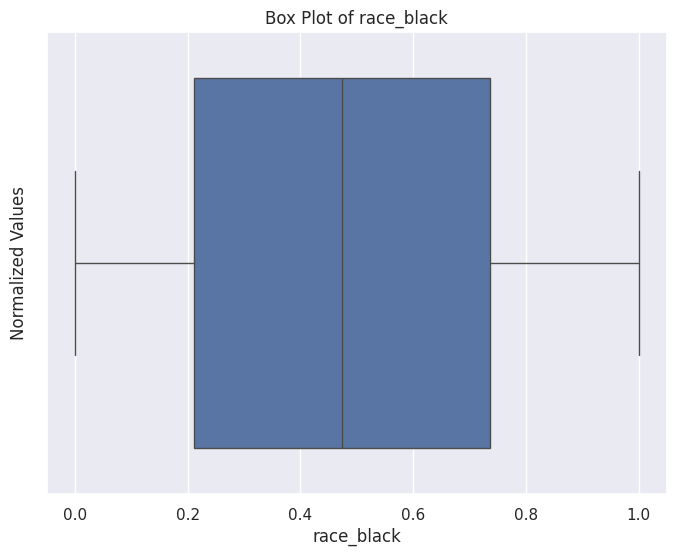

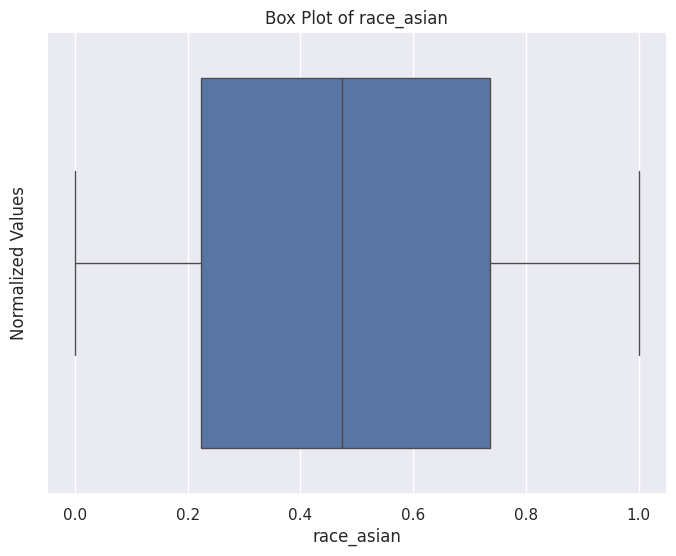

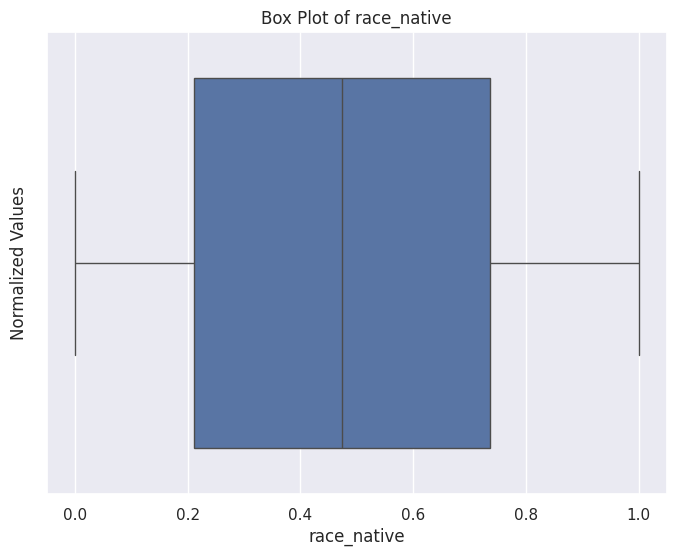

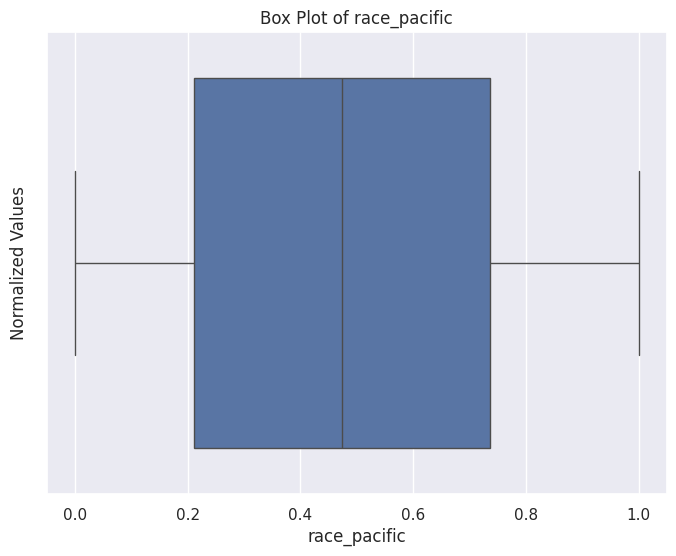

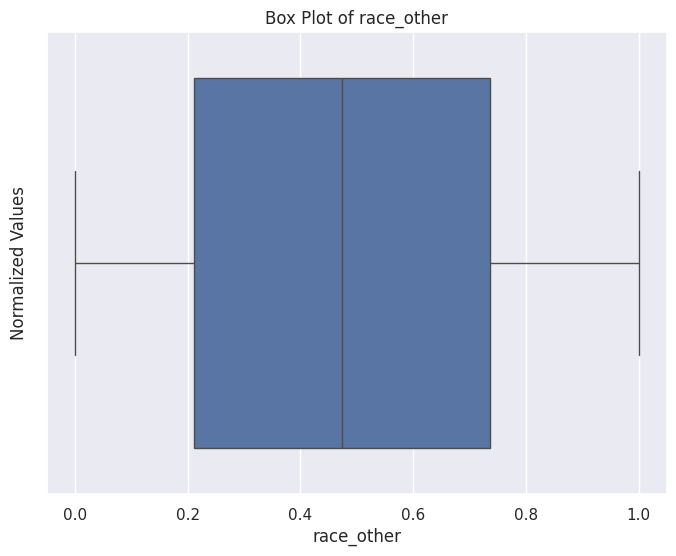

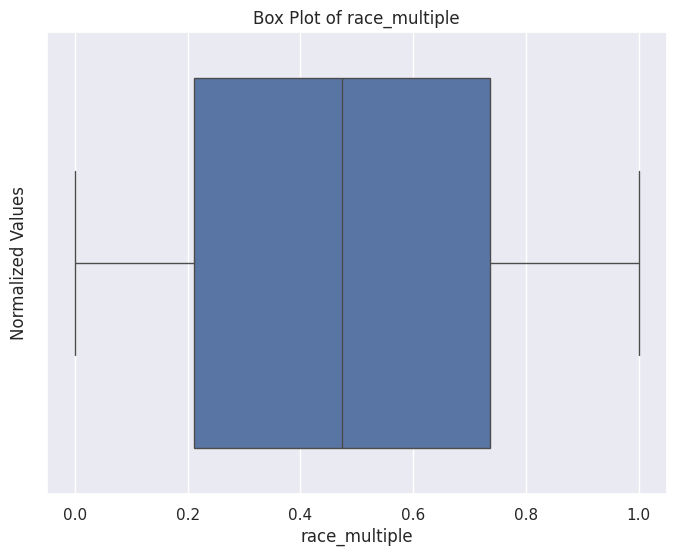

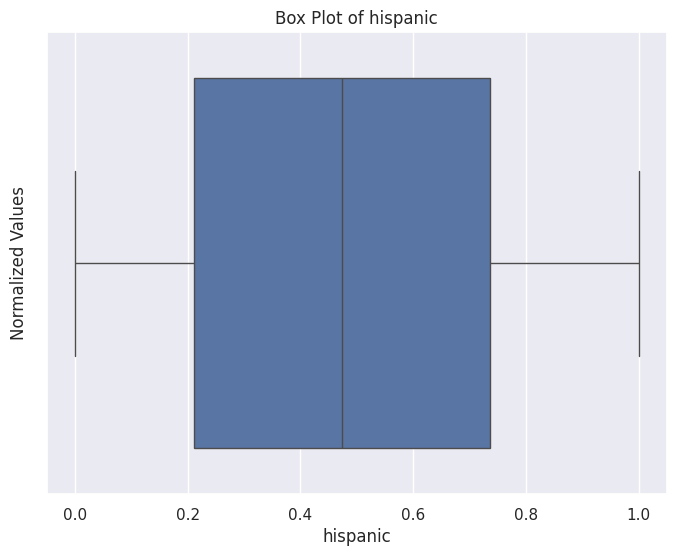

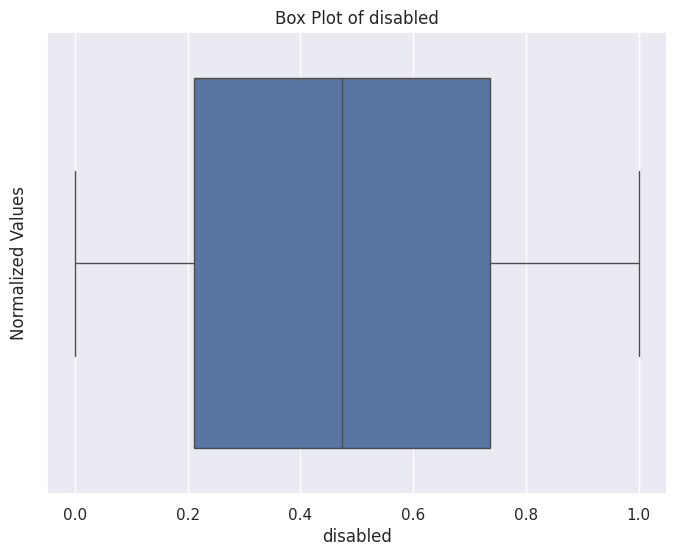

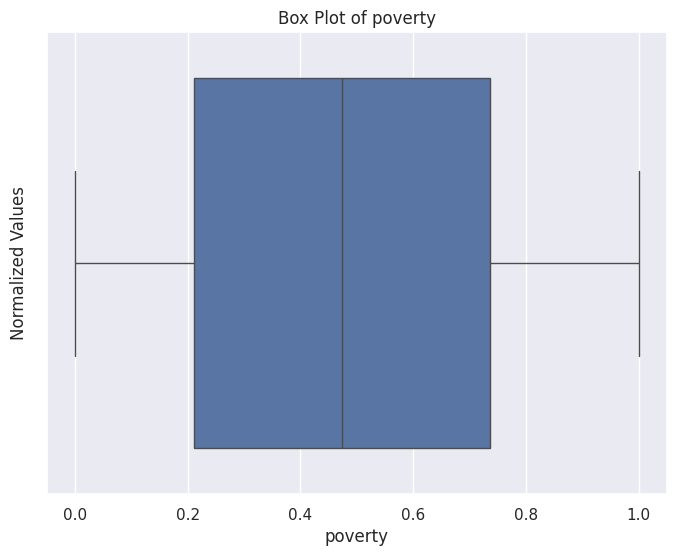

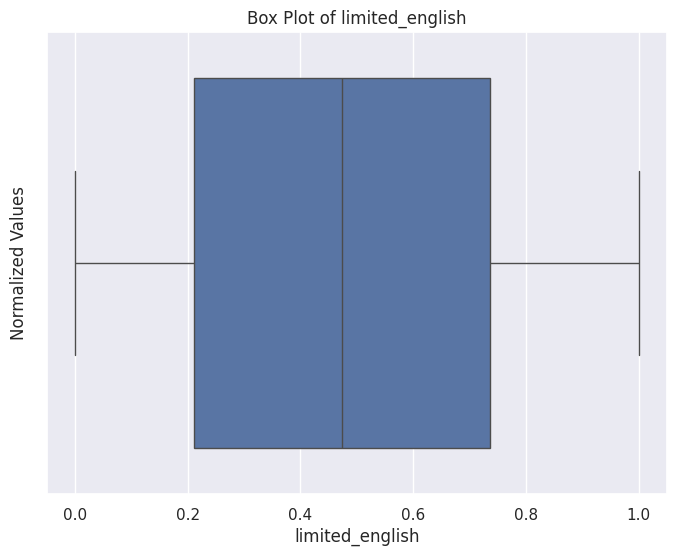

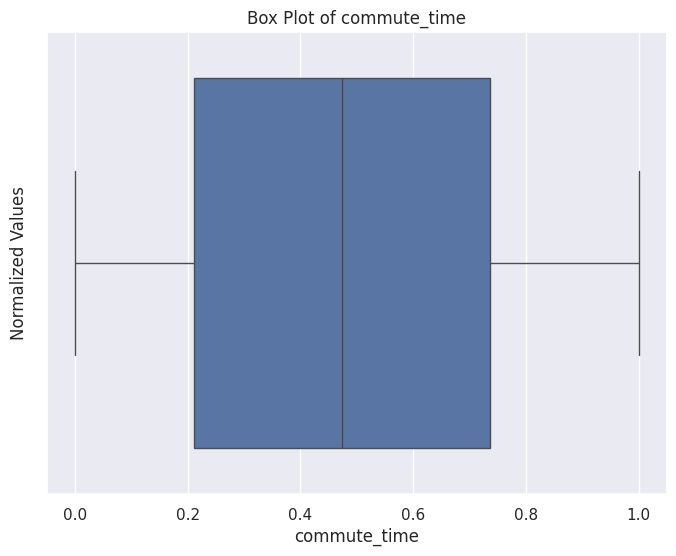

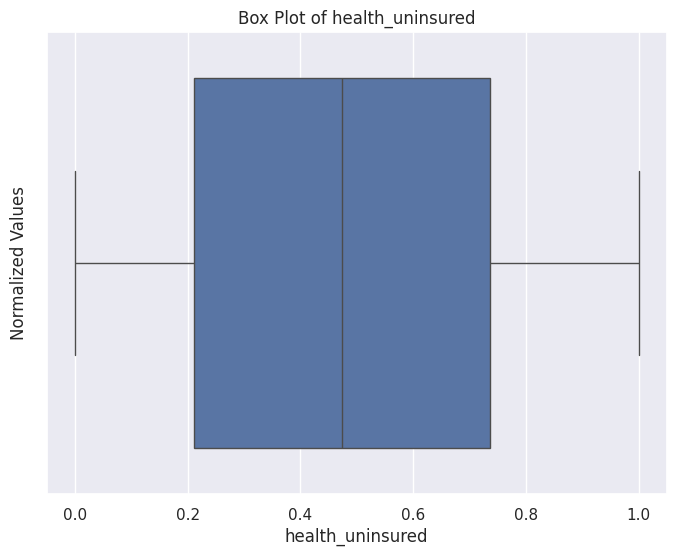

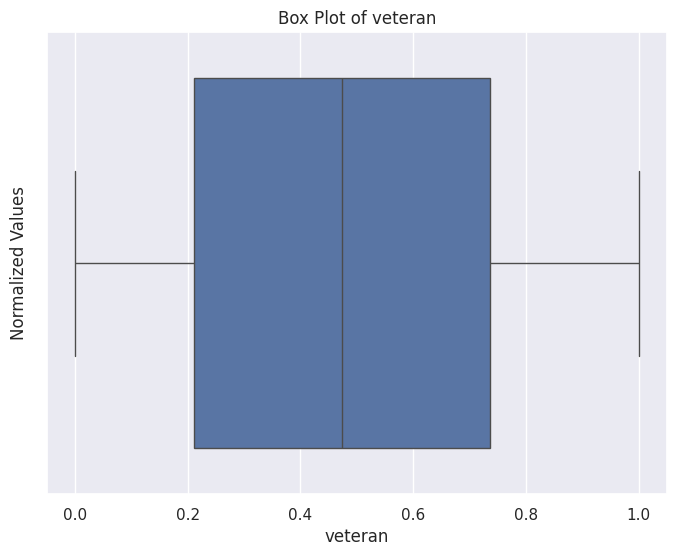

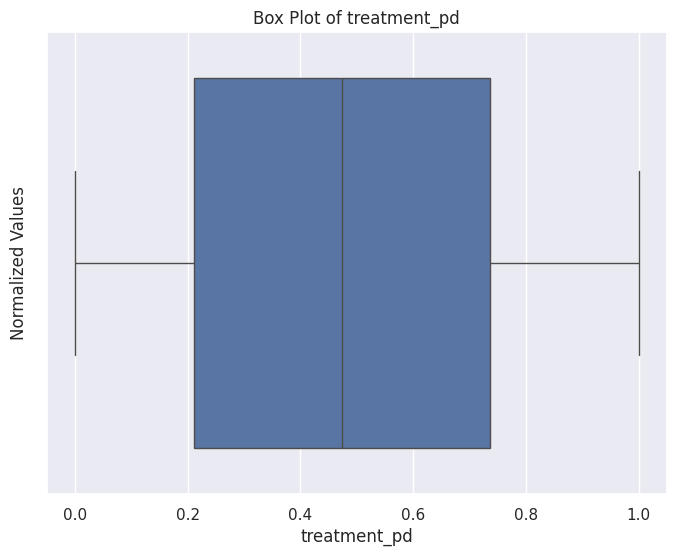

In [ ]:
#Box plots to visualize the changes
for column in quantitative_attributes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)
    plt.title('Box Plot of ' + column)
    plt.xlabel(column)
    plt.ylabel('Normalized Values')
    plt.show()